In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 



from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [89]:
fifa= pd.read_csv('fifa21_male2.csv')

In [3]:
fifa.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [4]:
fifa.shape

(17125, 107)

In [5]:
fifa.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [6]:
pd.unique(fifa['Gender'])

array(['Male'], dtype=object)

In [7]:
fifa_cols = fifa.columns.values.tolist()

In [8]:
fifa_cols

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [9]:
fifa.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

In [10]:
pd.unique(fifa['POT'])

array([69, 71, 82, 81, 70, 77, 78, 80, 74, 79, 90, 72, 73, 87, 75, 89, 84,
       68, 83, 66, 76, 58, 63, 88, 86, 64, 85, 65, 67, 61, 92, 56, 54, 91,
       60, 59, 48, 57, 62, 52, 93, 55, 50, 95, 53, 49, 47])

In [11]:
pd.unique(fifa['Skill'])

array([338, 369, 387, 255, 408, 276, 406, 402, 258, 393, 283, 419, 374,
       173, 113, 288, 334, 269,  78, 128,  83, 414, 351, 376, 257, 232,
       122, 231, 265, 237,  90, 206, 423, 417, 332, 239, 383,  89, 264,
       323, 106, 298,  75, 349, 103, 296, 319, 336, 340, 326, 318, 244,
       271, 378, 123, 337, 267, 293, 287, 397, 194, 399, 108, 325, 322,
       373, 201, 343, 299, 367, 320, 359, 396, 364, 240, 273, 411, 366,
       428, 403, 310, 333, 392, 345, 303, 416, 372, 379, 362, 348, 435,
       268, 262, 263, 286, 301,  91, 120, 312, 360, 248, 280, 285, 235,
       281, 220, 306, 328, 102, 197, 229,  81, 242, 227, 370, 200, 409,
       400, 407, 386, 294, 418, 236, 375, 224, 368, 307, 371, 344, 249,
       430, 295, 385, 277, 169, 388, 401, 327, 284, 354, 316, 339, 341,
       356, 324,  87, 395, 413, 199, 377, 259, 193, 254, 225, 347, 228,
       297, 107,  99, 292, 300,  82, 311, 176, 101,  92, 329,  85, 260,
        93, 202, 331, 314,  94, 274, 230, 272, 313, 243, 100, 12

In [12]:
fifa.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000     33.000000      6.000000      3.000000   
25%        0.000000    232.000000     41.000000     33.000000   
50%        4.000000    271.000000     56.000000     52.000000   
75%        9.000000    306.000000     65.000000     64.000000   
max       26.000000    437.000000     94.000000     95.000000   

       Heading Accuracy  Short Passing       Volleys         Skill  \
count      17125.000000   17125.000000  17067.000000  17125.000000   
mean          53.598832      60.507620     45.005742    266.607591   
std           16.947164      13.960635     17.729483     76.809344   
min            5.000000       7.000000      4.000000     43.000000   
25%           46.000000      56.000000     32.000000    232.000000   
50%           57.000000      63.000000     46.000000    279.000000   
75%           65.000000      69.000000     59.000000    319.000000   
max           93.000000      94.000000     90.000000    470.000000   

          Dribbling         Curve   FK Accuracy  Long Passing  Ball Control  \
count  17125.000000  17067.000000  17125.000000  17125.000000  17125.000000   
mean      57.846423     49.574676     44.387270     54.324321     60.642803   
std       18.047250     18.188344     17.504128     14.856911     15.873647   
min        5.000000      4.000000      5.000000      9.000000      5.000000   
25%       53.000000     37.000000     32.000000     45.000000     57.000000   
50%       63.000000     51.000000     43.000000     57.000000     64.000000   
75%       70.000000     64.000000     58.000000     65.000000     70.000000   
max       96.000000     94.000000     94.000000     93.000000     96.000000   

           Movement  Acceleration  Sprint Speed       Agility     Reactions  \
count  17125.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean     322.693664     65.445898     65.443036     64.602273     62.924847   
std       54.933593     14.657889     14.437377     14.372443      9.037279   
min      113.000000     12.000000     11.000000     14.000000     24.000000   
25%      294.000000     58.000000     59.000000     57.000000     57.000000   
50%      331.000000     68.000000     68.000000     67.000000     63.000000   
75%      360.000000     75.000000     75.000000     75.000000     69.000000   
max      464.000000     97.000000     96.000000     96.000000     96.000000   

            Balance         Power    Shot Power       Jumping       Stamina  \
count  17067.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean      64.715591    302.414774     59.711416     65.170212     63.309606   
std       14.031563     49.380576     13.417931     11.918063     15.313272   
min       17.000000    128.000000     12.000000     22.000000     11.000000   
25%       57.000000    272.000000     50.000000     58.000000     56.000000   
50%       67.000000    308.000000     61.000000     66.000000     66.000000   
75%       75.000000    339.000000     70.000000     73.000000     73.000000   
max       97.000000    4

In [13]:
fifa.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

## Keeping the columns I want

In [14]:
#fifa_clean = fifa.drop(['Gender', 'GK', 'RB', 'RCB','CB', 'LCB', 'LB', 'RWB', 'RDM', 'CDM','LDM', 'LWB', 'RM', 'RCM', 'CM', 'LCM', 'LM', 'RAM', 'LAM', 'RW','RF','CF', 'LF','LW','RS','ST', 'LS','D/W', 'A/W', 'W/F', 'Base Stats', 'Total Stats', 'GK Reflexes', 'GK Positioning', 'GK Kicking', 'GK Handling', 'GK Diving', 'Goalkeeping', 'Marking', 'Defending', 'Composure', 'Penalties', 'Vision', 'Positioning', 'Interceptions', 'Aggression', 'Mentality', 'Long Shots', 'Long Shots', 'Strength', 'Stamina', 'Jumping', 'Shot Power' , 'Power', 'Balance'], axis=1)
#fifa_clean.head()

In [15]:
fifa1=fifa[['Name', 'Age', 'OVA', 'Nationality','Club', 'BOV', 'BP', 'Position',  'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Skill', 'Dribbling', 'Volleys','Curve', 'FK Accuracy', 'Ball Control', 'Long Passing', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Total Stats', 'Base Stats', 'DEF', 'PAS', 'DRI', 'PHY', 'Hits', 'Value', 'Wage', 'Release Clause']].copy()
fifa1.head()

Name  Age  OVA            Nationality           Club  BOV   BP  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position  POT  Attacking  Crossing  Finishing  Heading Accuracy  \
0            LM   69        313        75         50                59   
1    CM CAM CDM   71        337        68         64                61   
2  CAM RM RW LM   71        337        80         64                41   
3           NaN   82        264        54         70                60   
4        CM CAM   81        367        75         69                54   

   Short Passing  Skill  Dribbling  Volleys  Curve  FK Accuracy  Ball Control  \
0             71    338         73     58.0   65.0           60            71   
1             76    369         69     68.0   79.0           79            71   
2             77    387         79     75.0   84.0           77            78   
3             80    255         68      NaN    NaN           46            77   
4             90    408         85     79.0   80.0           70            90   

   Long Passing  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            69       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            69       295            48            42     71.0         59   
3            64       176            59            62      NaN         55   
4            83       346            61            56     79.0         75   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        320          72           69.0         63.0    66.0         50   
1        362          71           71.0         72.0    73.0         75   
2        317          69           39.0         69.0    74.0         66   
3        271          59           70.0         72.0     NaN         70   
4        370          58           70.0         78.0    93.0         71   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0        NaN        208       70               69            69.0   
1       79.0        153       70               43            40.0   
2        NaN         99       35               34            30.0   
3        NaN         75       34               41             NaN   
4       89.0        181       68               57            56.0   

   Total Stats  Base Stats  DEF  PAS  DRI  PHY Hits  Value  Wage  \
0         1929         408   68   70   71   69    4  €625K   €7K   
1         1906         385   58   73   69   63    4  €600K   €7K   
2         1770         354   36   76   77   52   11  €1.1M  €15K   
3         1348         369   47   66   69   60    3     €0    €0   
4         2014         420   63   85   85   59  149  €5.5M  €12K   

  Release Clause  
0             €0  
1          €1.1M  
2             €0  
3             €0  
4          €7.2M

In [16]:
# Removing the space from the column headers

fifa1.columns = [fifa1.columns[i].replace(' ', '_') for i in range(len(fifa1.columns))]
fifa1.head()

Name  Age  OVA            Nationality           Club  BOV   BP  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position  POT  Attacking  Crossing  Finishing  Heading_Accuracy  \
0            LM   69        313        75         50                59   
1    CM CAM CDM   71        337        68         64                61   
2  CAM RM RW LM   71        337        80         64                41   
3           NaN   82        264        54         70                60   
4        CM CAM   81        367        75         69                54   

   Short_Passing  Skill  Dribbling  Volleys  Curve  FK_Accuracy  Ball_Control  \
0             71    338         73     58.0   65.0           60            71   
1             76    369         69     68.0   79.0           79            71   
2             77    387         79     75.0   84.0           77            78   
3             80    255         68      NaN    NaN           46            77   
4             90    408         85     79.0   80.0           70            90   

   Long_Passing  Movement  Acceleration  Sprint_Speed  Agility  Reactions  \
0            69       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            69       295            48            42     71.0         59   
3            64       176            59            62      NaN         55   
4            83       346            61            56     79.0         75   

   Balance  Power  Shot_Power  Jumping  Stamina  Strength  Long_Shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        320          72           69.0         63.0    66.0         50   
1        362          71           71.0         72.0    73.0         75   
2        317          69           39.0         69.0    74.0         66   
3        271          59           70.0         72.0     NaN         70   
4        370          58           70.0         78.0    93.0         71   

   Composure  Defending  Marking  Standing_Tackle  Sliding_Tackle  \
0        NaN        208       70               69            69.0   
1       79.0        153       70               43            40.0   
2        NaN         99       35               34            30.0   
3        NaN         75       34               41             NaN   
4       89.0        181       68               57            56.0   

   Total_Stats  Base_Stats  DEF  PAS  DRI  PHY Hits  Value  Wage  \
0         1929         408   68   70   71   69    4  €625K   €7K   
1         1906         385   58   73   69   63    4  €600K   €7K   
2         1770         354   36   76   77   52   11  €1.1M  €15K   
3         1348         369   47   66   69   60    3     €0    €0   
4         2014         420   63   85   85   59  149  €5.5M  €12K   

  Release_Clause  
0             €0  
1          €1.1M  
2             €0  
3             €0  
4          €7.2M

### Separate numerical/categorical type

In [17]:
fifa1_num=fifa1.select_dtypes(include=np.number)
fifa1_num.head()

Age  OVA  BOV  POT  Attacking  Crossing  Finishing  Heading_Accuracy  \
0   33   69   71   69        313        75         50                59   
1   37   71   70   71        337        68         64                61   
2   33   71   71   71        337        80         64                41   
3   36   68   70   82        264        54         70                60   
4   36   81   82   81        367        75         69                54   

   Short_Passing  Skill  Dribbling  Volleys  Curve  FK_Accuracy  Ball_Control  \
0             71    338         73     58.0   65.0           60            71   
1             76    369         69     68.0   79.0           79            71   
2             77    387         79     75.0   84.0           77            78   
3             80    255         68      NaN    NaN           46            77   
4             90    408         85     79.0   80.0           70            90   

   Long_Passing  Movement  Acceleration  Sprint_Speed  Agility  Reactions  \
0            69       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            69       295            48            42     71.0         59   
3            64       176            59            62      NaN         55   
4            83       346            61            56     79.0         75   

   Balance  Power  Shot_Power  Jumping  Stamina  Strength  Long_Shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        320          72           69.0         63.0    66.0         50   
1        362          71           71.0         72.0    73.0         75   
2        317          69           39.0         69.0    74.0         66   
3        271          59           70.0         72.0     NaN         70   
4        370          58           70.0         78.0    93.0         71   

   Composure  Defending  Marking  Standing_Tackle  Sliding_Tackle  \
0        NaN        208       70               69            69.0   
1       79.0        153       70               43            40.0   
2        NaN         99       35               34            30.0   
3        NaN         75       34               41             NaN   
4       89.0        181       68               57            56.0   

   Total_Stats  Base_Stats  DEF  PAS  DRI  PHY  
0         1929         408   68   70   71   69  
1         1906         385   58   73   69   63  
2         1770         354   36   76   77   52  
3         1348         369   47   66   69   60  
4         2014         420   63   85   85   59

In [18]:
fifa1_cat=fifa1.select_dtypes(include=['object'])
fifa1_cat.head()

Name            Nationality           Club   BP      Position Hits  \
0  G. Pasquale                  Italy        Udinese  LWB            LM    4   
1  Luis García                  Spain      KAS Eupen   CM    CM CAM CDM    4   
2      J. Cole                England  Coventry City  CAM  CAM RM RW LM   11   
3     D. Yorke  Trinidad &amp; Tobago     Sunderland   ST           NaN    3   
4      Iniesta                  Spain    Vissel Kobe  CAM        CM CAM  149   

   Value  Wage Release_Clause  
0  €625K   €7K             €0  
1  €600K   €7K          €1.1M  
2  €1.1M  €15K             €0  
3     €0    €0             €0  
4  €5.5M  €12K          €7.2M

In [19]:
fifa1_cat= fifa1_cat.replace(np.nan, 'Unknown')

In [20]:
#convert the numerical values of the categorical table to the right integer format

def money_col(col_name):
    fifa1_cat[col_name] = fifa1_cat[col_name].astype(str)
    fifa1_cat[col_name] = fifa1_cat[col_name].str.replace("€", "").str.replace(".","").str.replace("K$", "000").str.replace("M$", "00000")
    fifa1_cat[col_name] = fifa1_cat[col_name].astype(float)
    
money_col("Value")
money_col("Wage")
money_col("Release_Clause")

In [21]:
fifa1_cat.head()

Name            Nationality           Club   BP      Position Hits  \
0  G. Pasquale                  Italy        Udinese  LWB            LM    4   
1  Luis García                  Spain      KAS Eupen   CM    CM CAM CDM    4   
2      J. Cole                England  Coventry City  CAM  CAM RM RW LM   11   
3     D. Yorke  Trinidad &amp; Tobago     Sunderland   ST       Unknown    3   
4      Iniesta                  Spain    Vissel Kobe  CAM        CM CAM  149   

       Value     Wage  Release_Clause  
0   625000.0   7000.0             0.0  
1   600000.0   7000.0       1100000.0  
2  1100000.0  15000.0             0.0  
3        0.0      0.0             0.0  
4  5500000.0  12000.0       7200000.0

In [22]:
fifa1_cat['Hits'] = (fifa1_cat['Hits'] !='n').astype('int64')

In [23]:
fifa1_cat_num=fifa1_cat.select_dtypes(include=np.number)
fifa1_cat_num.head()

Hits      Value     Wage  Release_Clause
0     1   625000.0   7000.0             0.0
1     1   600000.0   7000.0       1100000.0
2     1  1100000.0  15000.0             0.0
3     1        0.0      0.0             0.0
4     1  5500000.0  12000.0       7200000.0

In [24]:
fifa1_num=fifa1_num.merge(fifa1_cat_num, right_index=True, left_index=True)
fifa1_num.head()

Age  OVA  BOV  POT  Attacking  Crossing  Finishing  Heading_Accuracy  \
0   33   69   71   69        313        75         50                59   
1   37   71   70   71        337        68         64                61   
2   33   71   71   71        337        80         64                41   
3   36   68   70   82        264        54         70                60   
4   36   81   82   81        367        75         69                54   

   Short_Passing  Skill  Dribbling  Volleys  Curve  FK_Accuracy  Ball_Control  \
0             71    338         73     58.0   65.0           60            71   
1             76    369         69     68.0   79.0           79            71   
2             77    387         79     75.0   84.0           77            78   
3             80    255         68      NaN    NaN           46            77   
4             90    408         85     79.0   80.0           70            90   

   Long_Passing  Movement  Acceleration  Sprint_Speed  Agility  Reactions  \
0            69       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            69       295            48            42     71.0         59   
3            64       176            59            62      NaN         55   
4            83       346            61            56     79.0         75   

   Balance  Power  Shot_Power  Jumping  Stamina  Strength  Long_Shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        320          72           69.0         63.0    66.0         50   
1        362          71           71.0         72.0    73.0         75   
2        317          69           39.0         69.0    74.0         66   
3        271          59           70.0         72.0     NaN         70   
4        370          58           70.0         78.0    93.0         71   

   Composure  Defending  Marking  Standing_Tackle  Sliding_Tackle  \
0        NaN        208       70               69            69.0   
1       79.0        153       70               43            40.0   
2        NaN         99       35               34            30.0   
3        NaN         75       34               41             NaN   
4       89.0        181       68               57            56.0   

   Total_Stats  Base_Stats  DEF  PAS  DRI  PHY  Hits      Value     Wage  \
0         1929         408   68   70   71   69     1   625000.0   7000.0   
1         1906         385   58   73   69   63     1   600000.0   7000.0   
2         1770         354   36   76   77   52     1  1100000.0  15000.0   
3         1348         369   47   66   69   60     1        0.0      0.0   
4         2014         420   63   85   85   59     1  5500000.0  12000.0   

   Release_Clause  
0             0.0  
1       1100000.0  
2             0.0  
3             0.0  
4       7200000.0

In [25]:
fifa1_cat= fifa1_cat.drop(['Hits', 'Position','Value', 'Wage', 'Release_Clause'], axis=1)
fifa1_cat

Name            Nationality           Club   BP
0          G. Pasquale                  Italy        Udinese  LWB
1          Luis García                  Spain      KAS Eupen   CM
2              J. Cole                England  Coventry City  CAM
3             D. Yorke  Trinidad &amp; Tobago     Sunderland   ST
4              Iniesta                  Spain    Vissel Kobe  CAM
...                ...                    ...            ...  ...
17120       A. Medioub                 France     CD Tondela   CB
17121       W. Rickard                  Wales        Burnley  CAM
17122       C. Barrett                England        Burnley   RB
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz   RB
17124  Pablo Rodríguez                  Spain          Lecce   ST

[17125 rows x 4 columns]

## checking the normality of the numerical variables visually
#Using seaborn library to construct distribution plots for the numerical variables

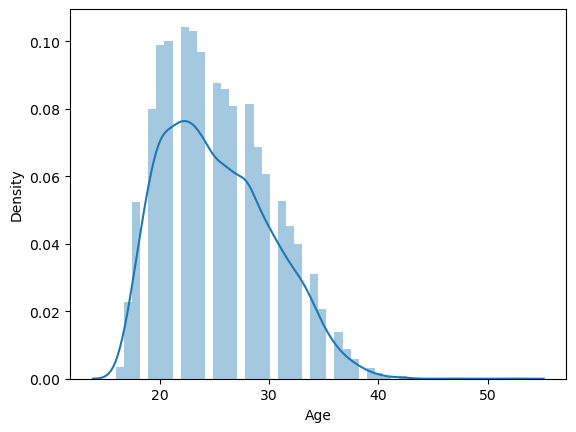

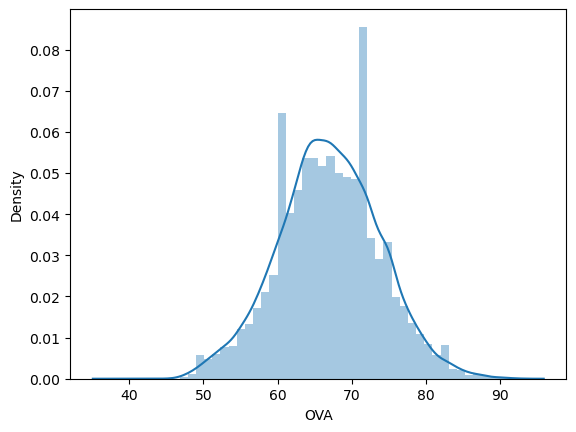

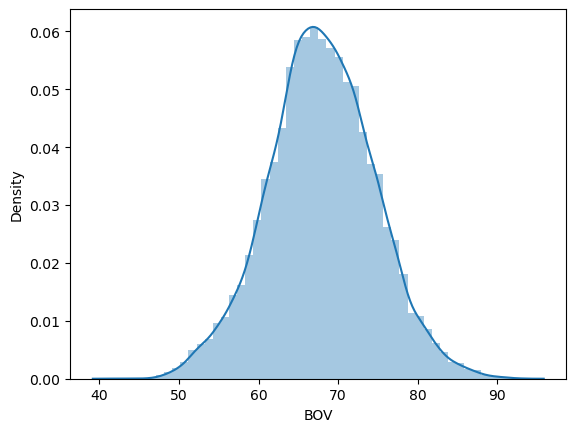

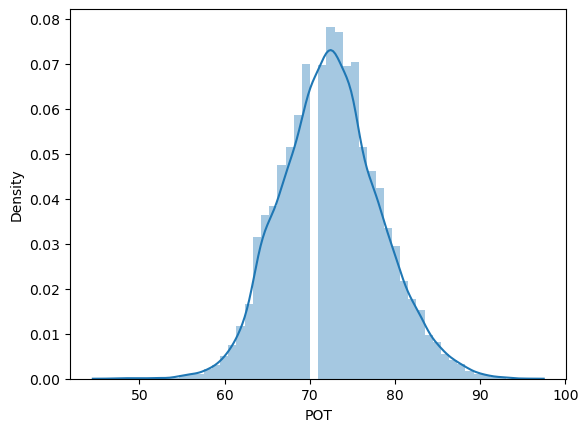

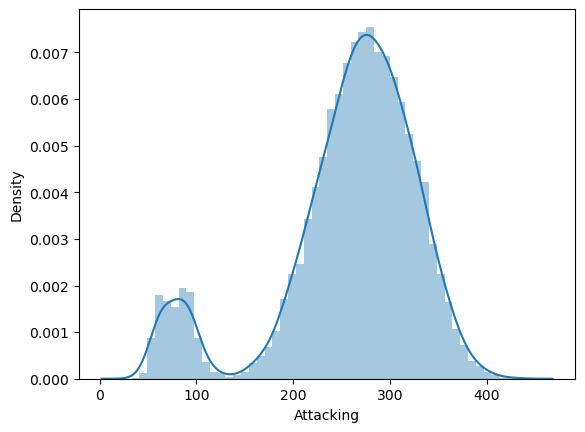

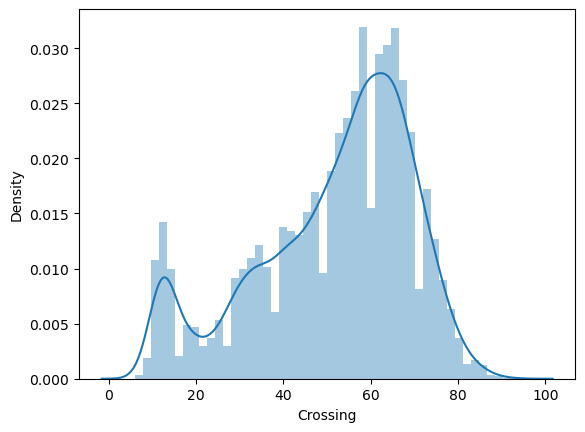

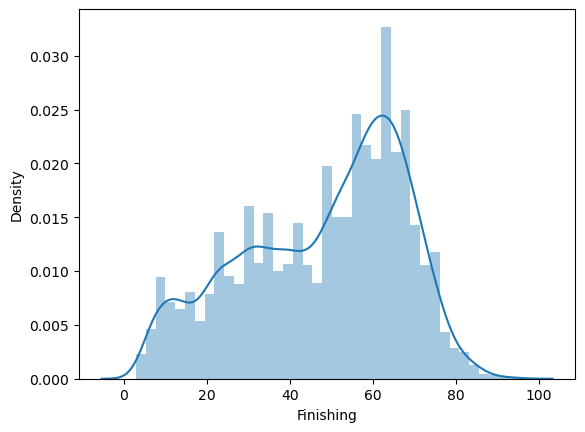

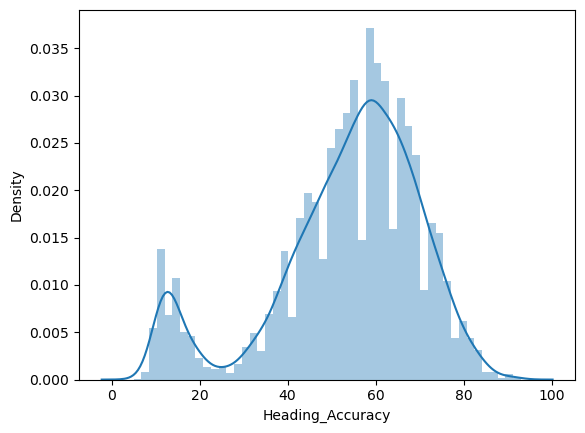

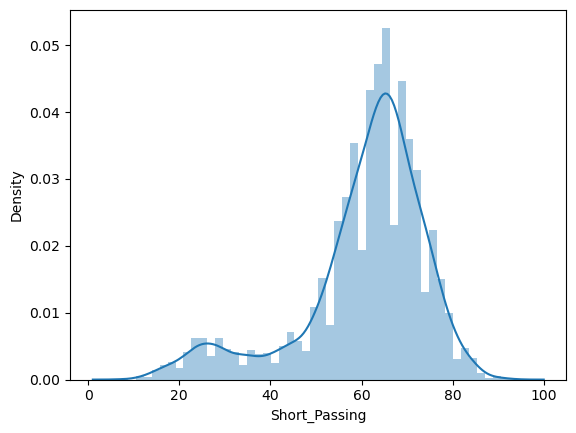

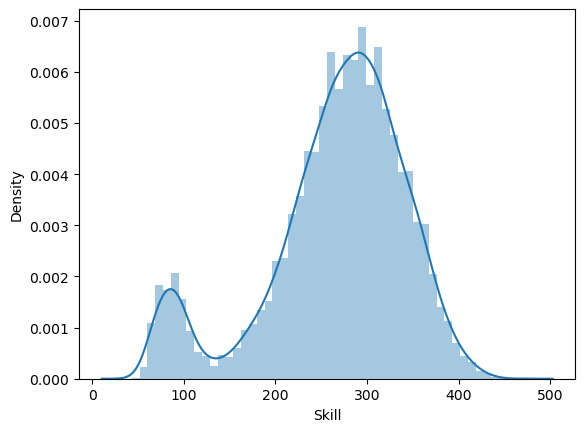

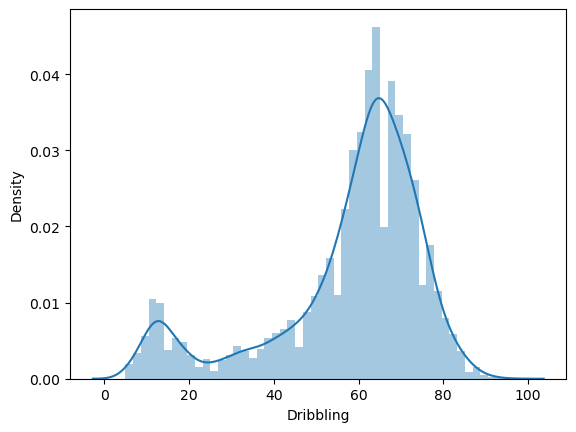

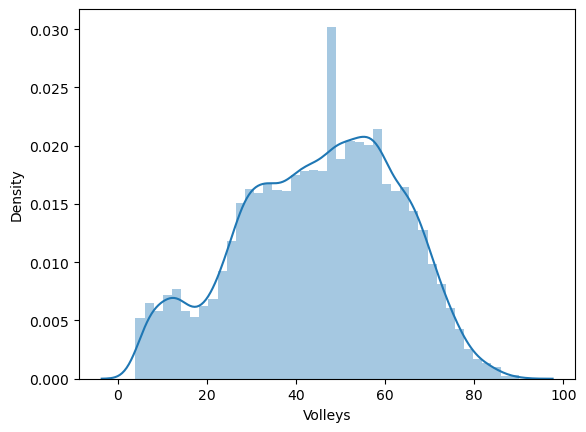

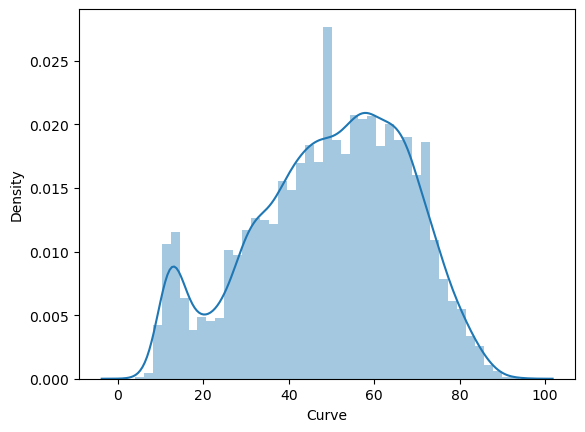

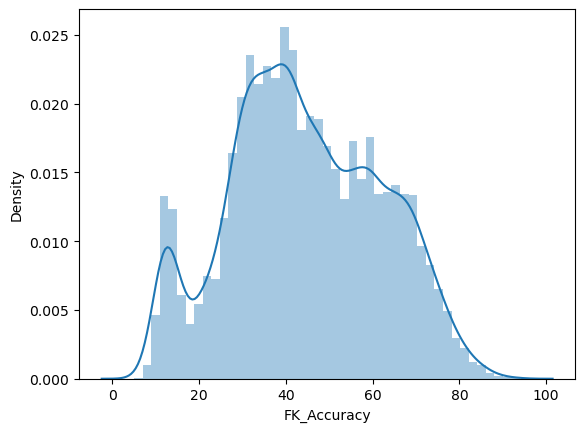

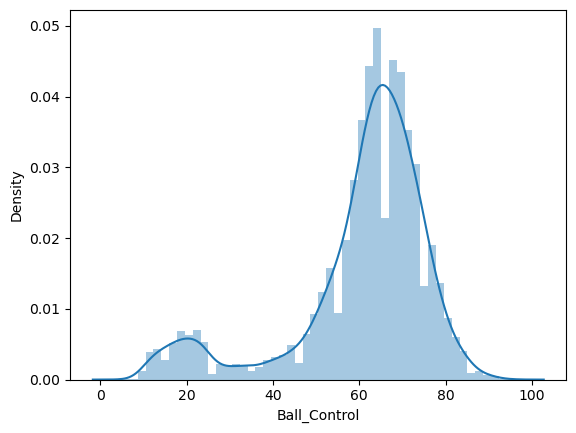

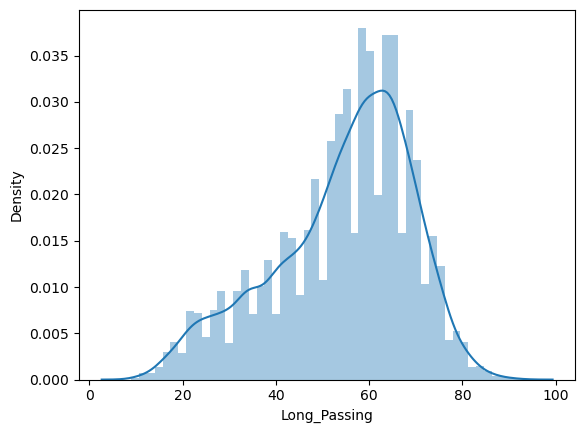

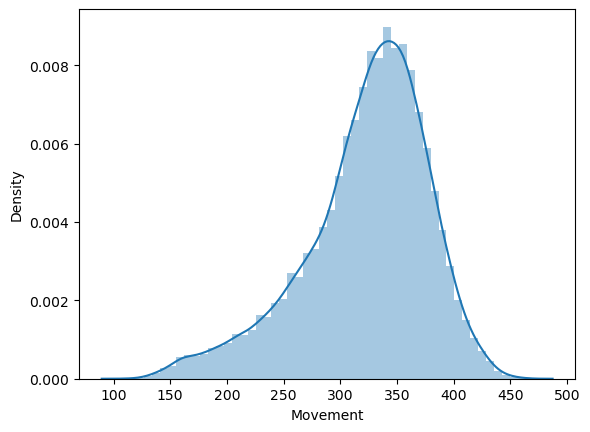

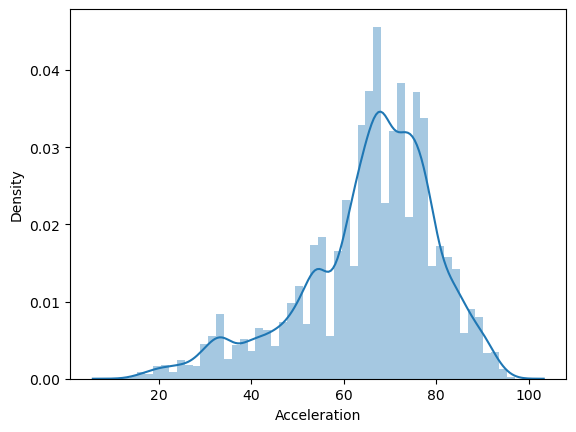

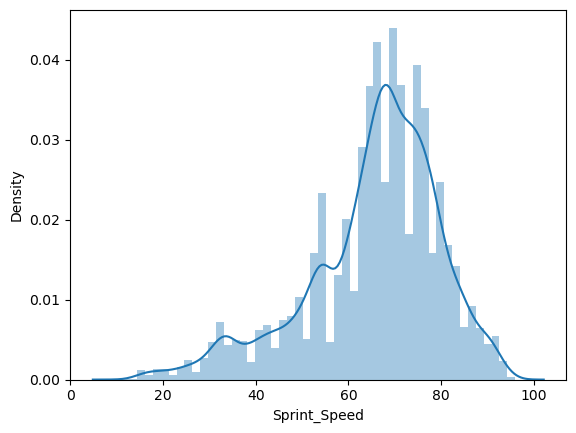

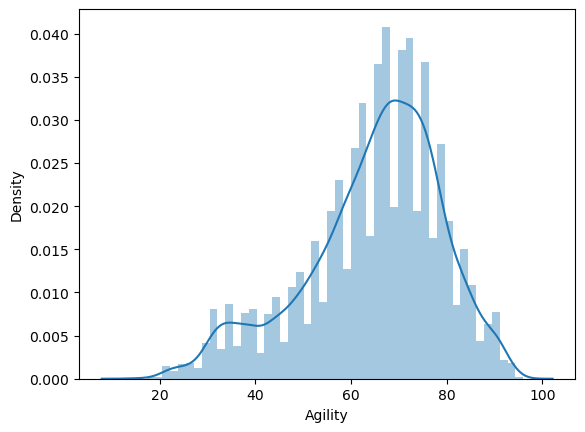

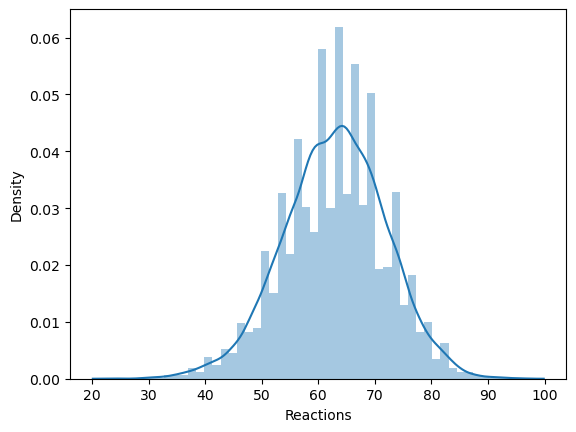

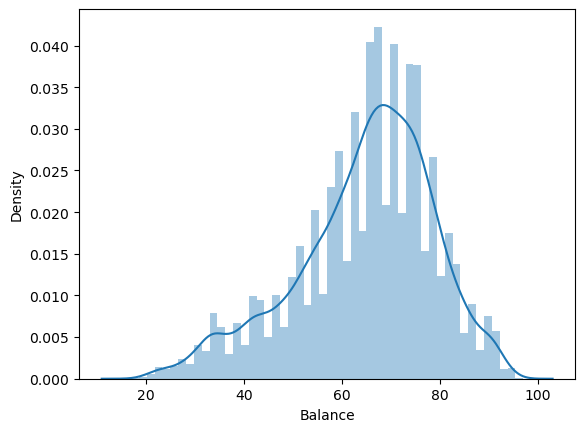

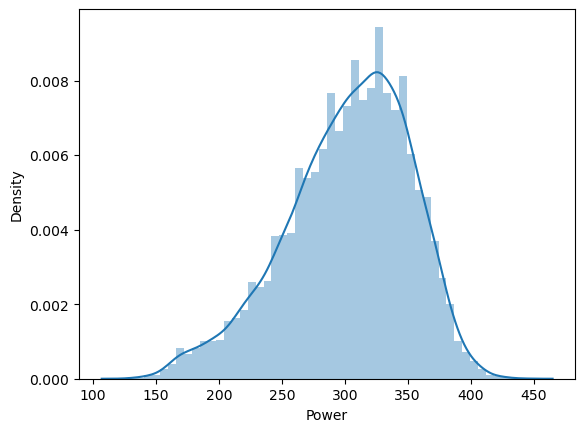

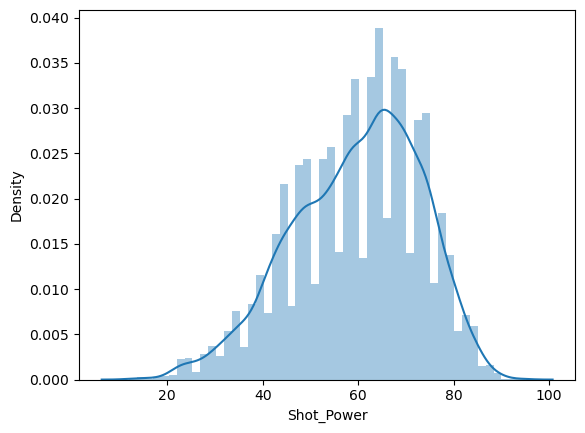

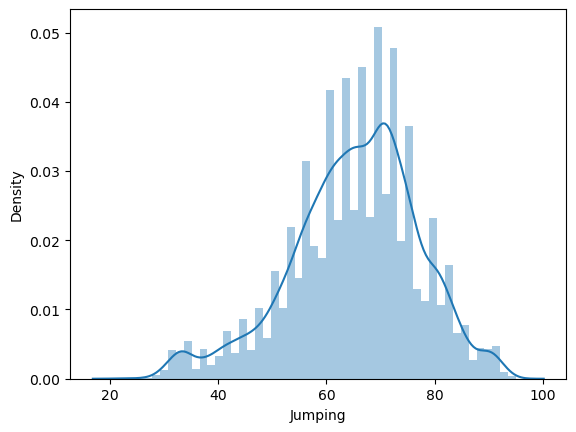

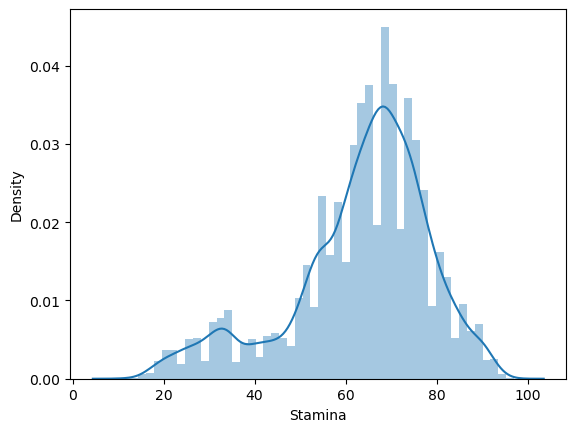

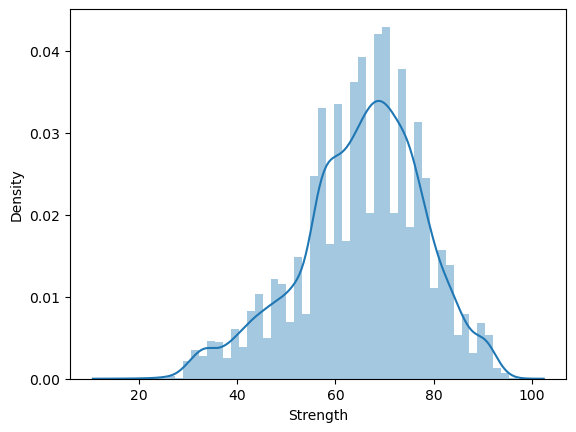

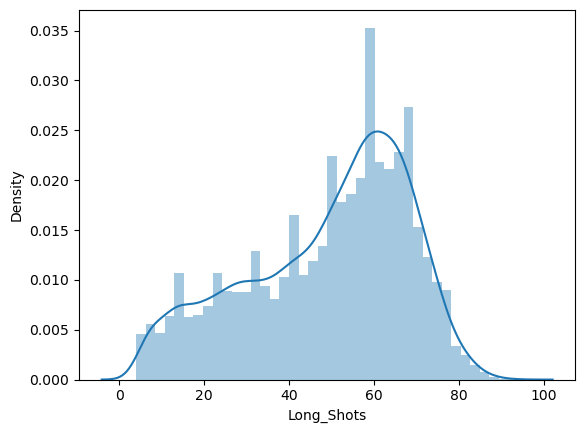

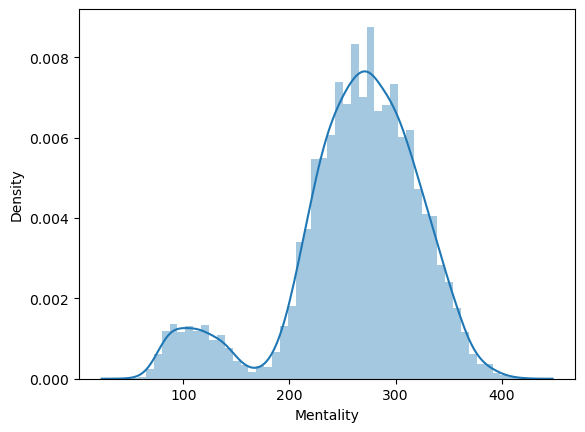

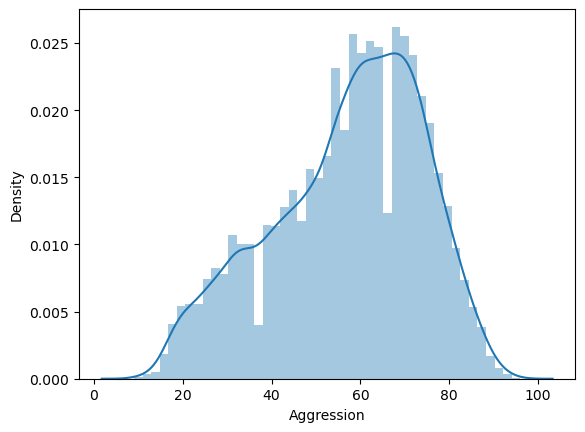

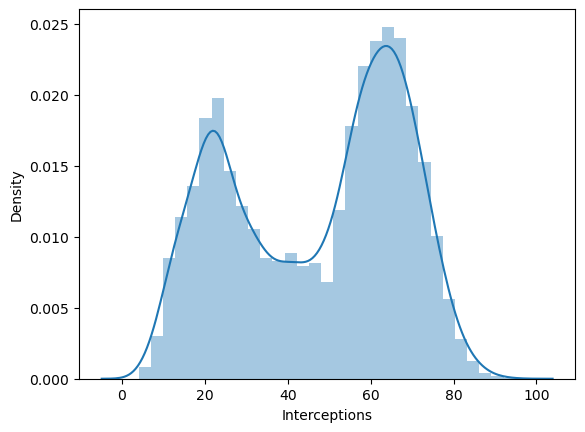

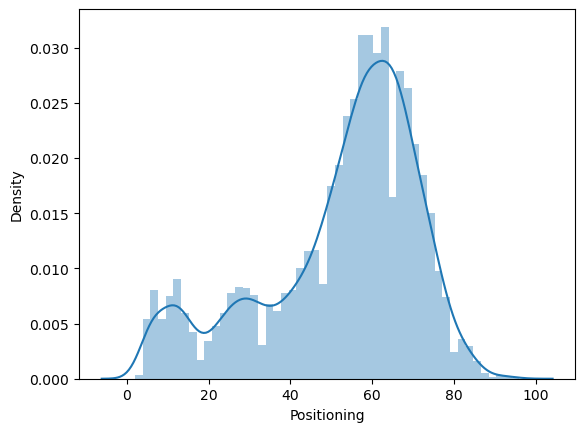

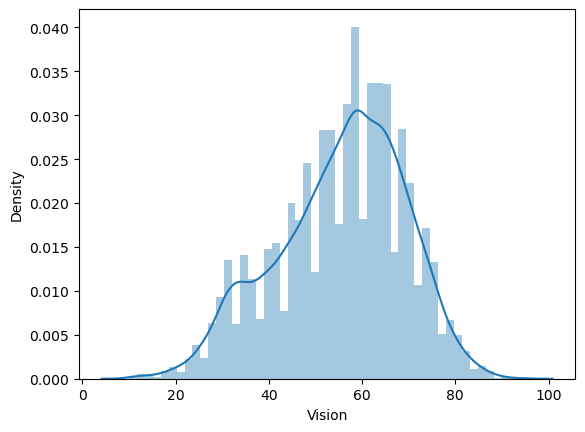

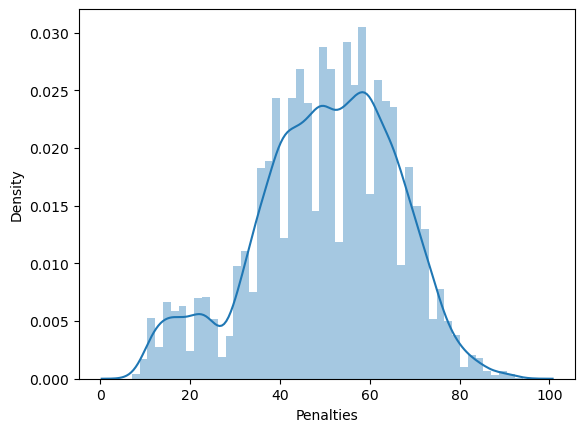

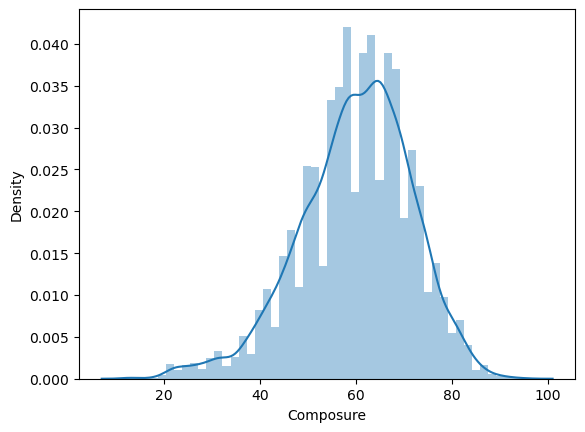

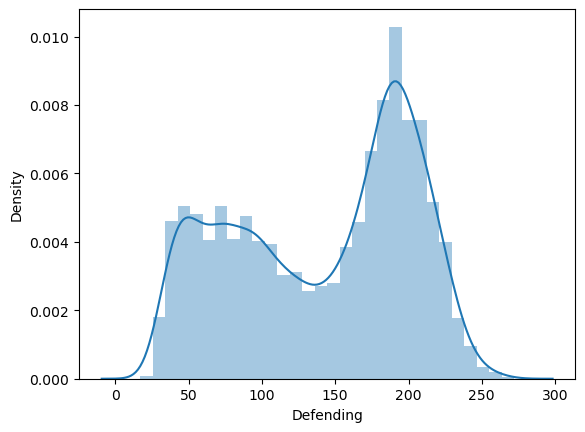

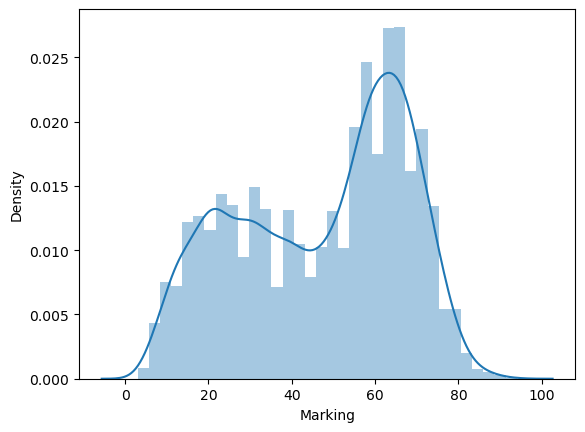

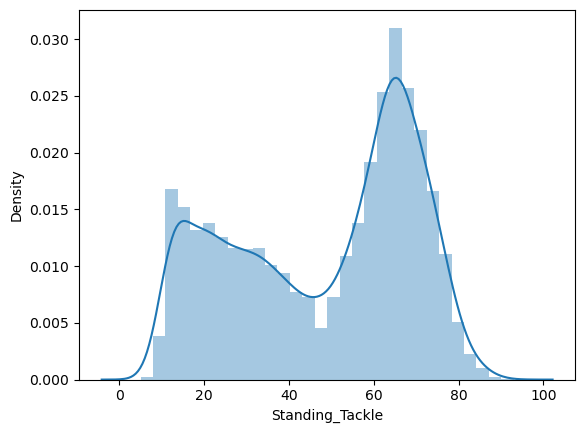

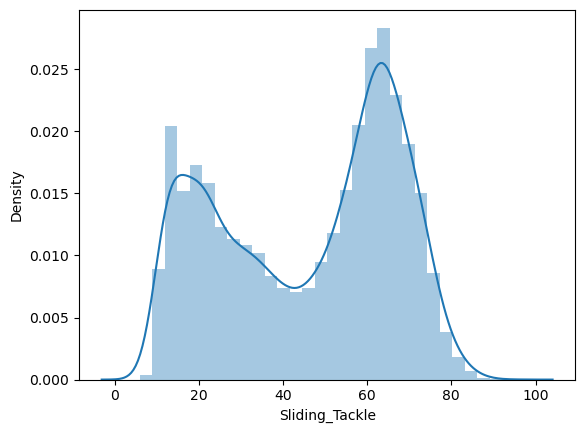

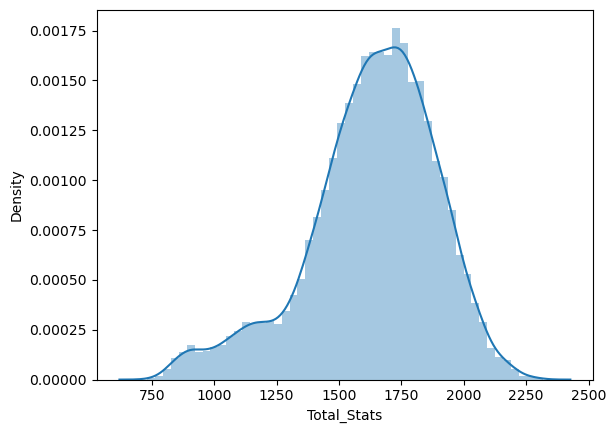

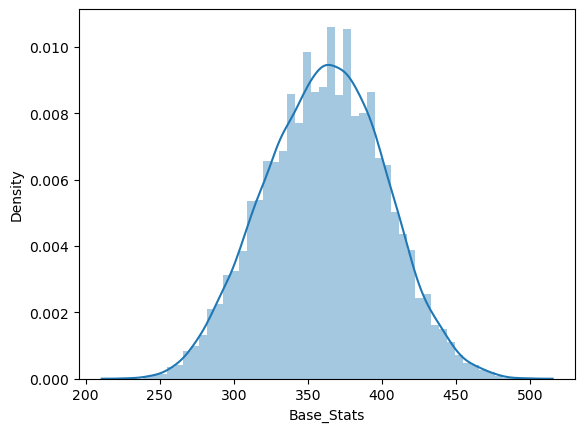

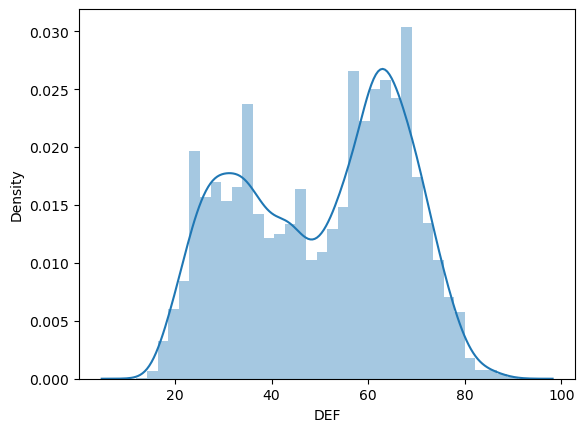

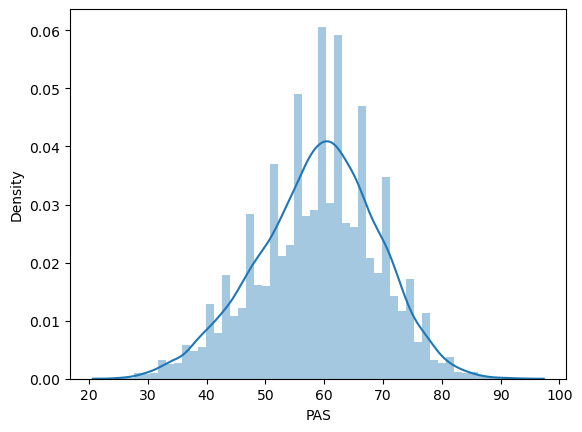

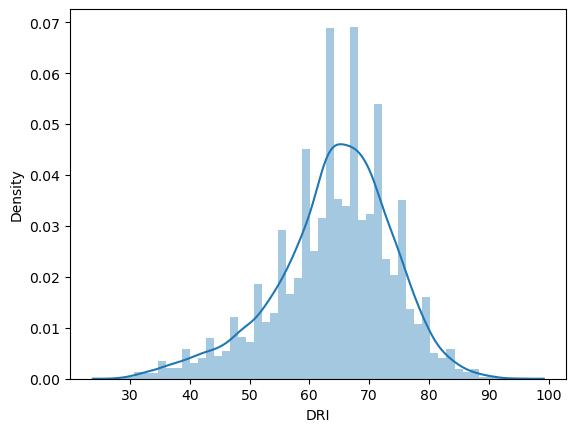

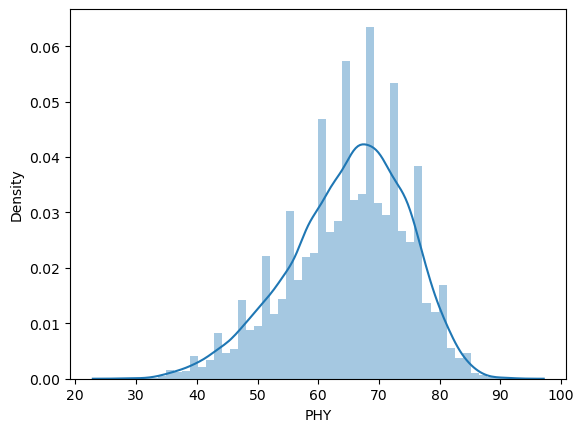

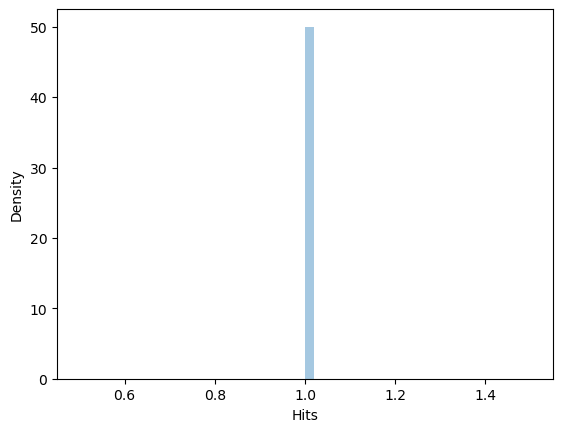

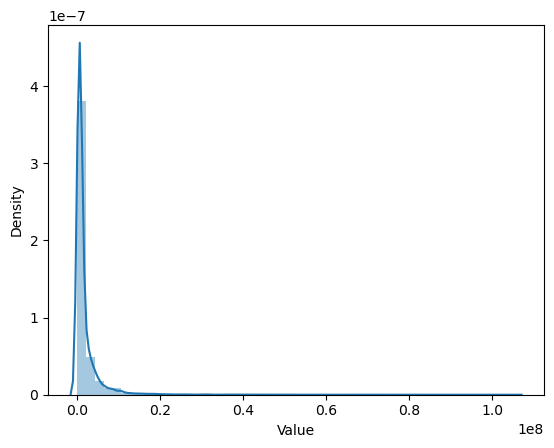

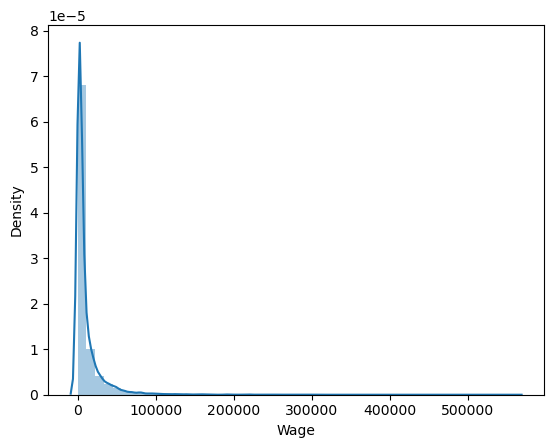

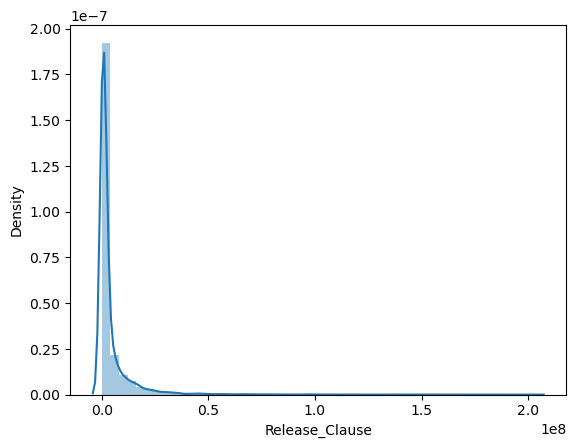

In [26]:
for column in fifa1_num.columns:
    sns.distplot(fifa1_num[column])
    plt.show()


## Checking histograms

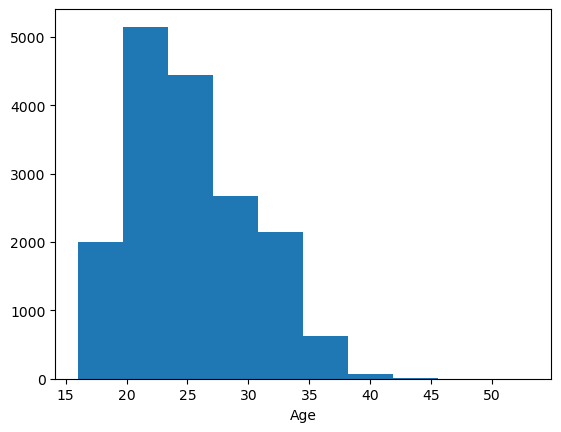

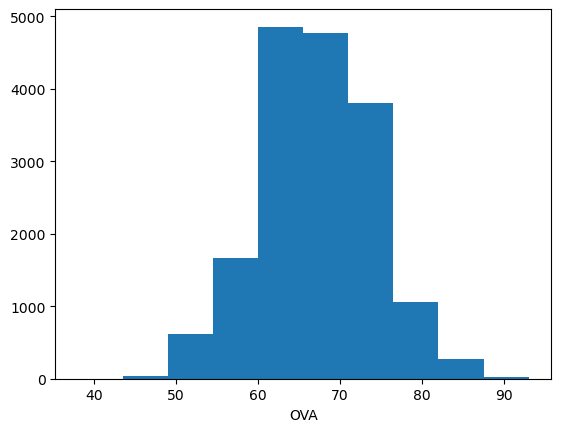

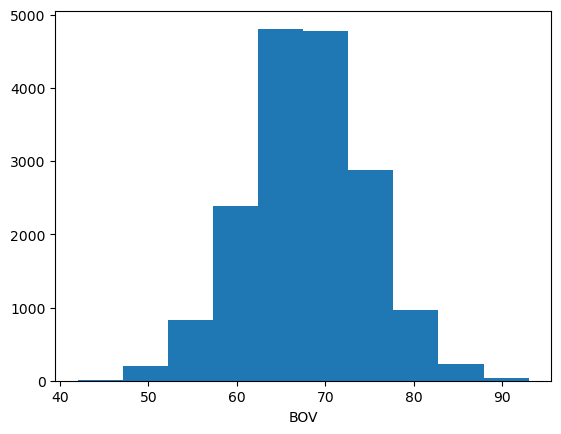

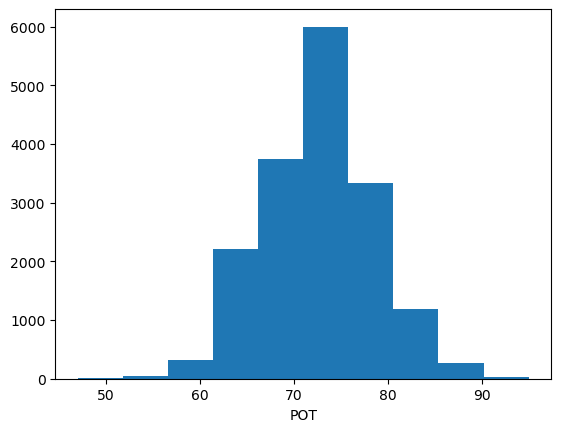

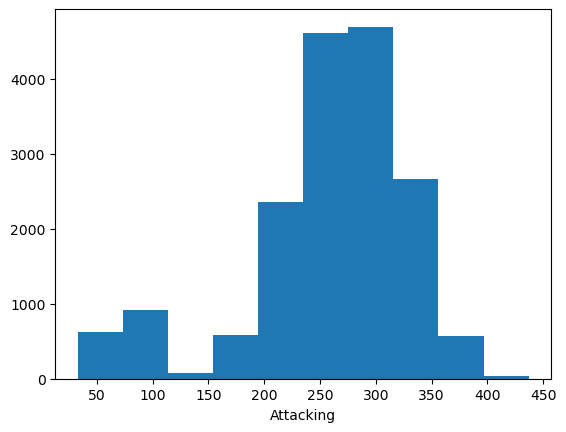

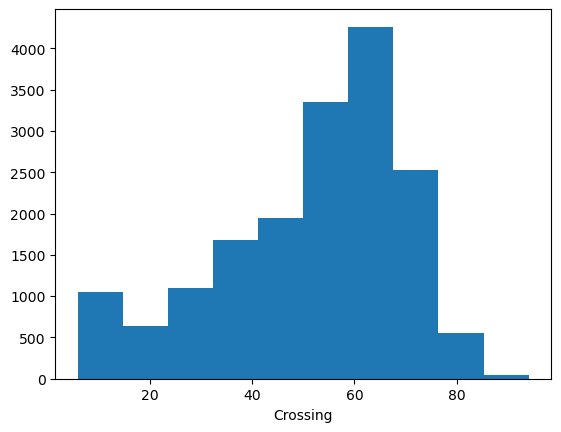

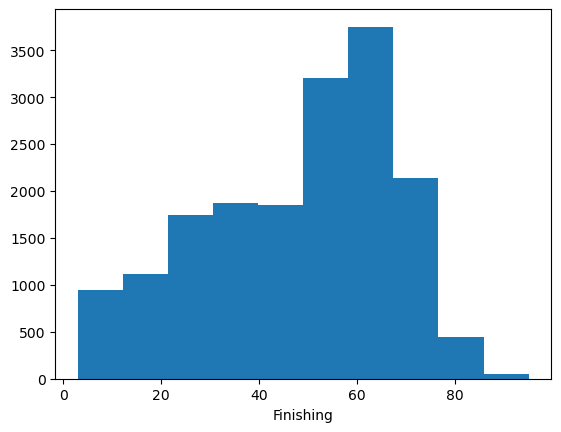

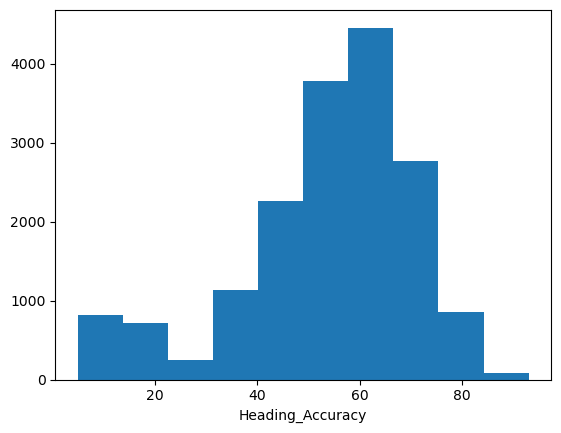

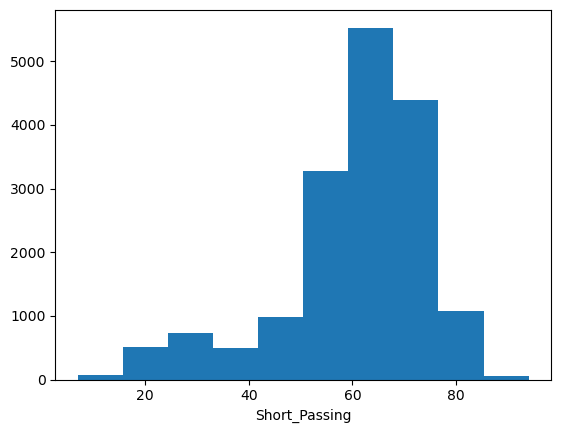

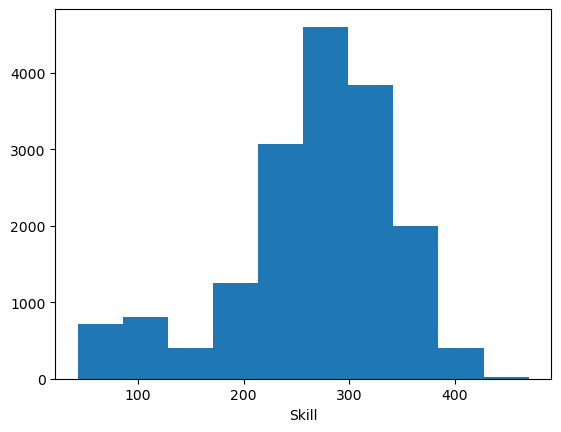

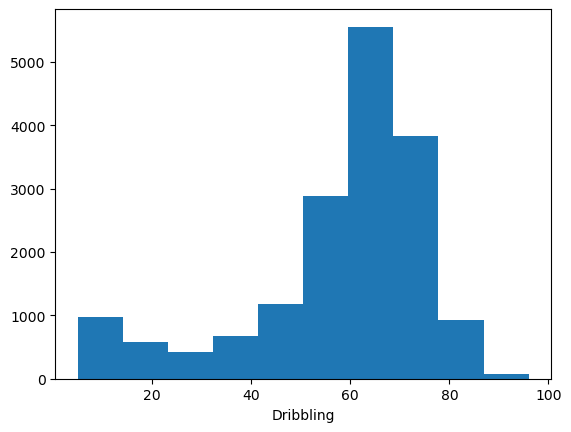

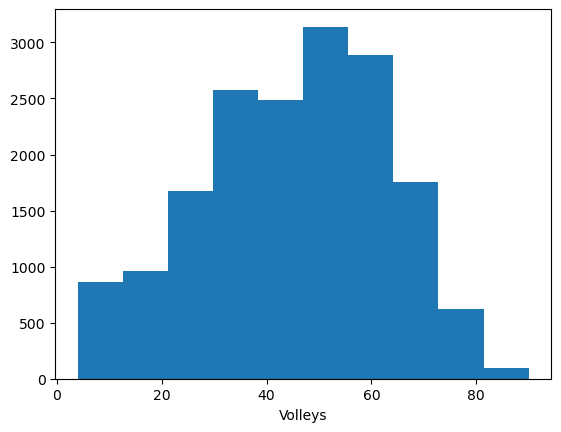

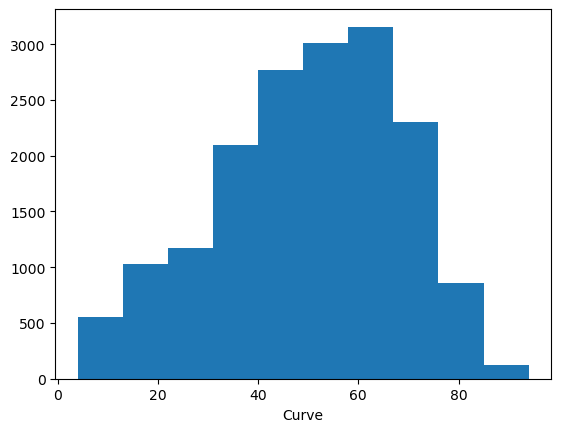

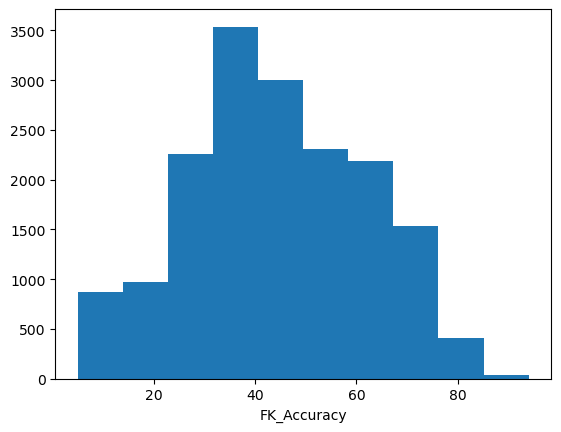

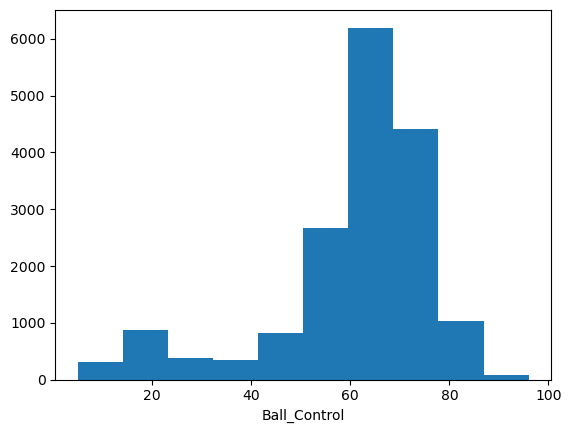

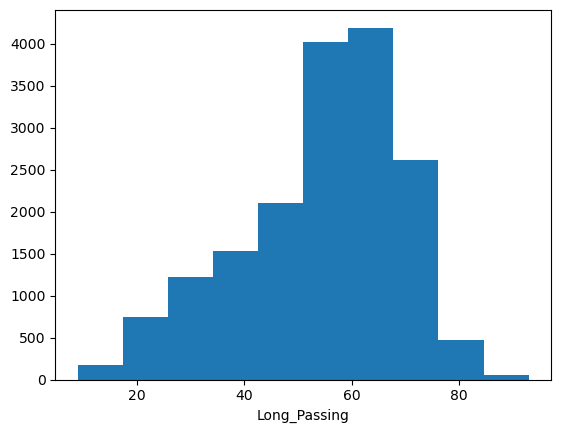

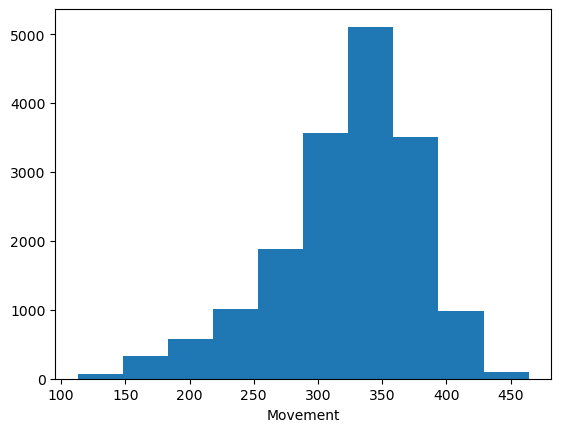

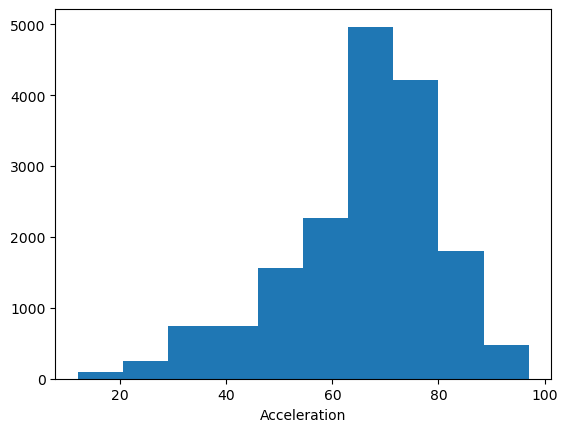

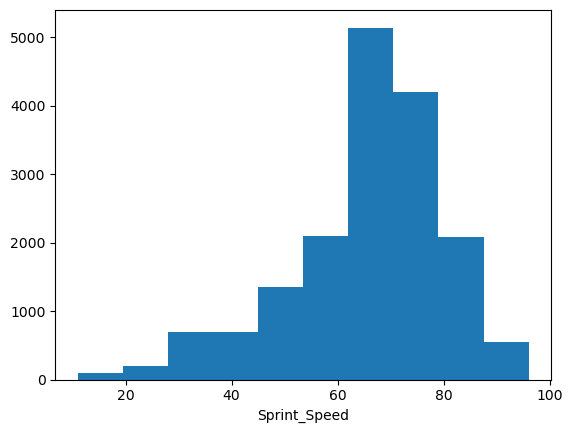

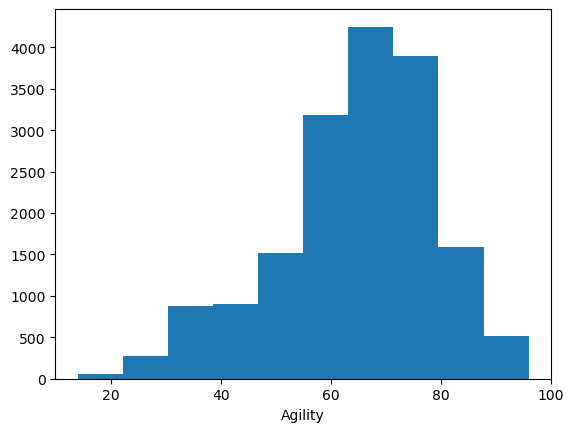

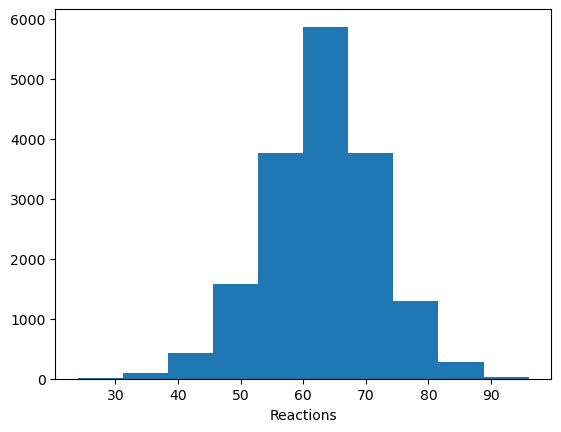

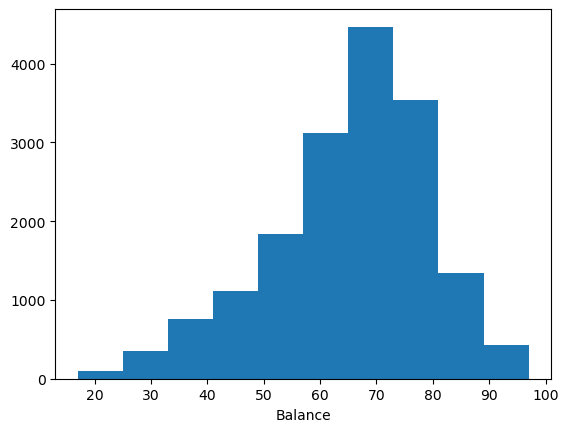

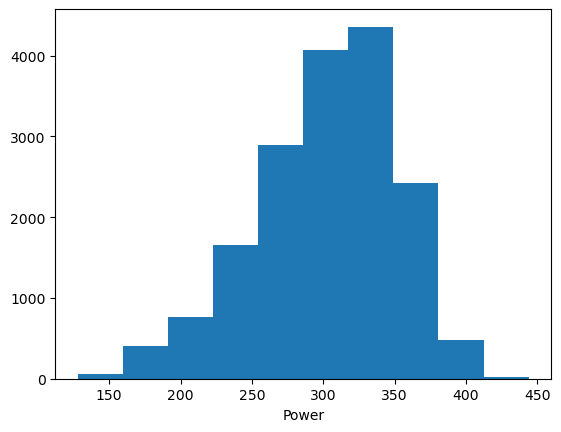

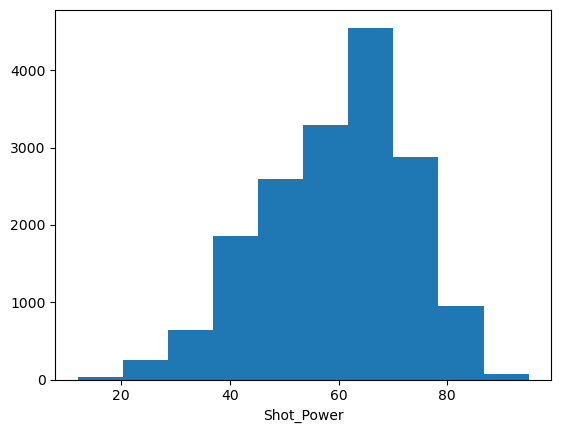

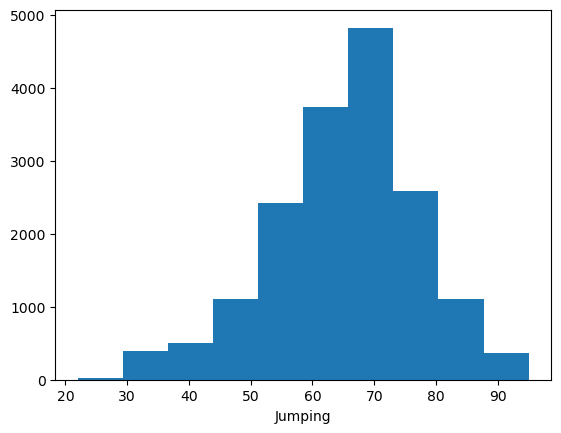

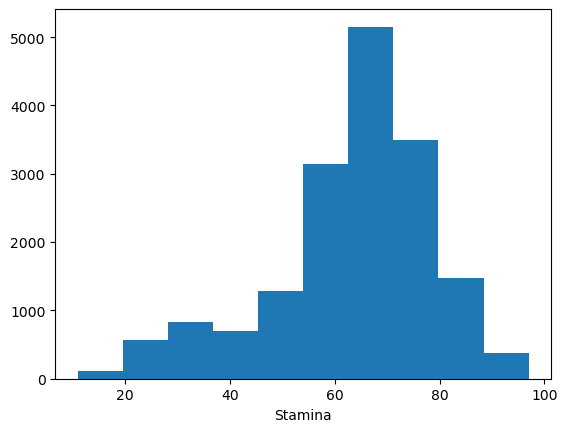

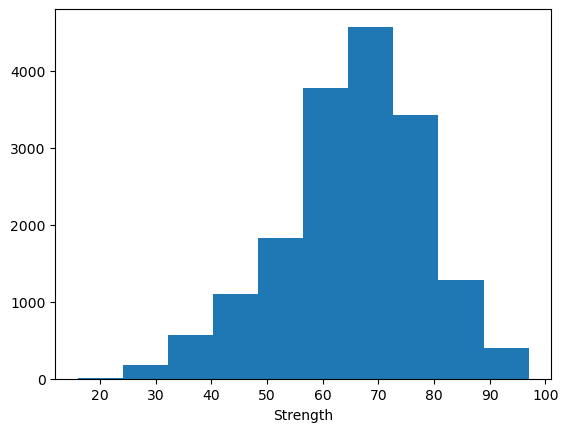

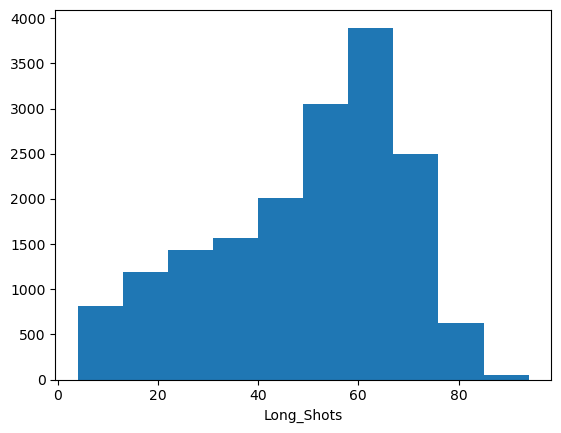

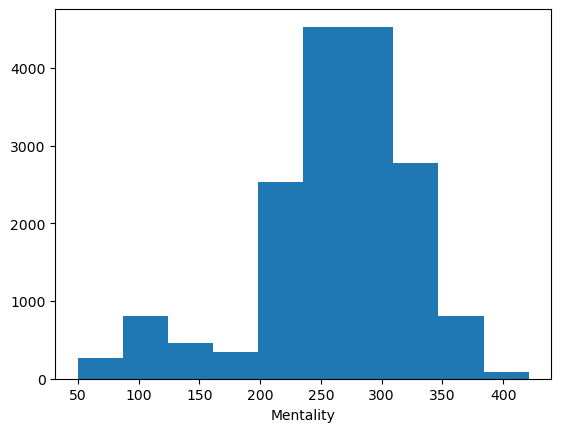

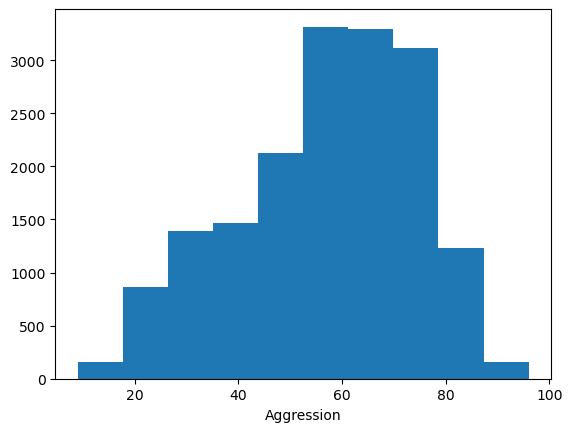

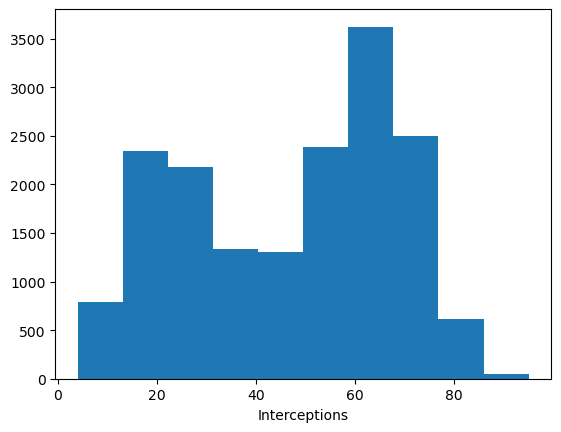

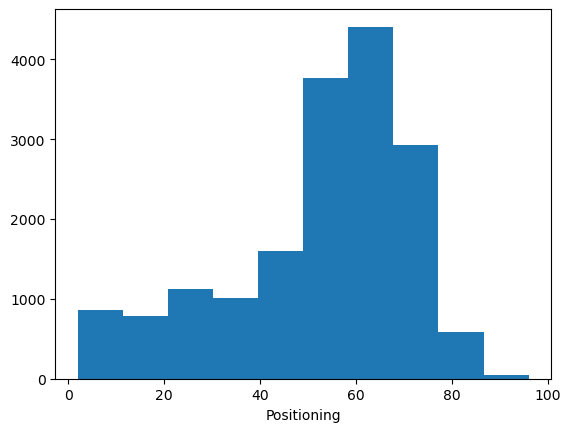

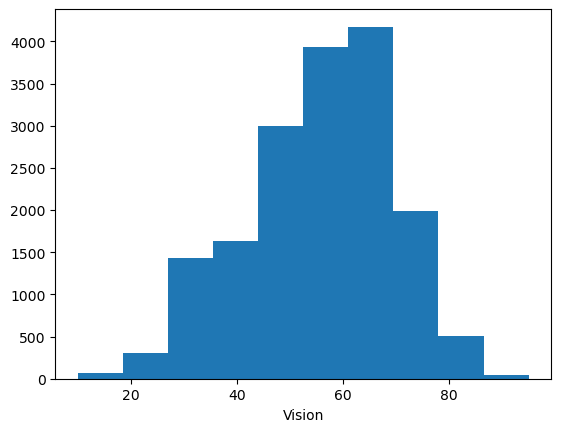

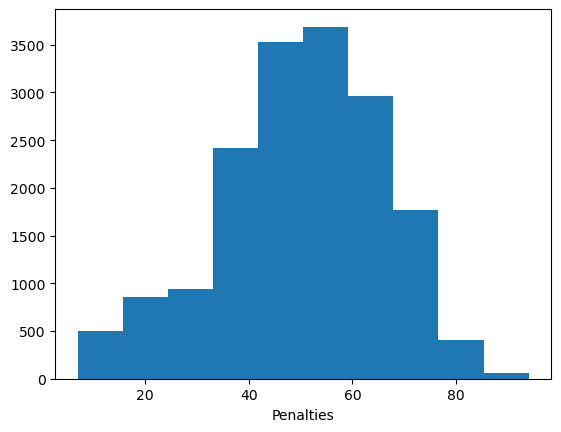

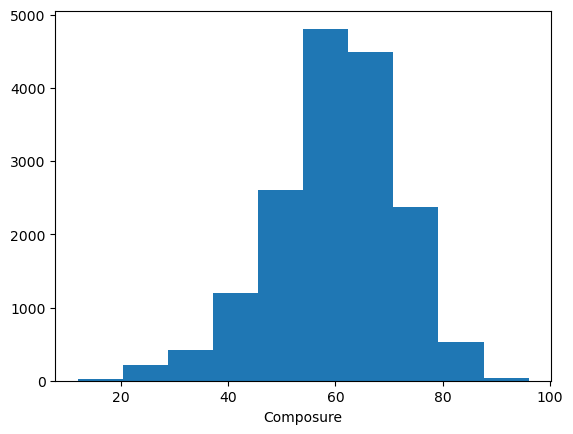

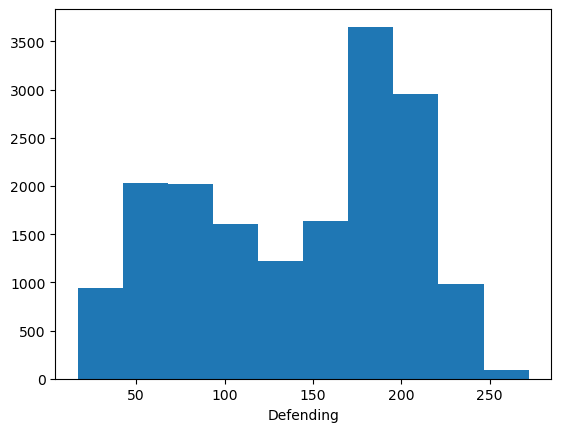

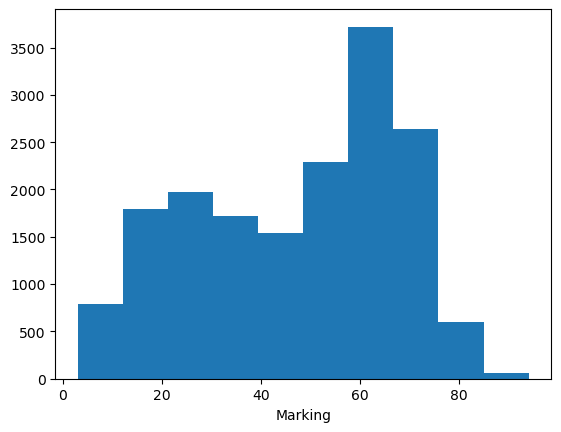

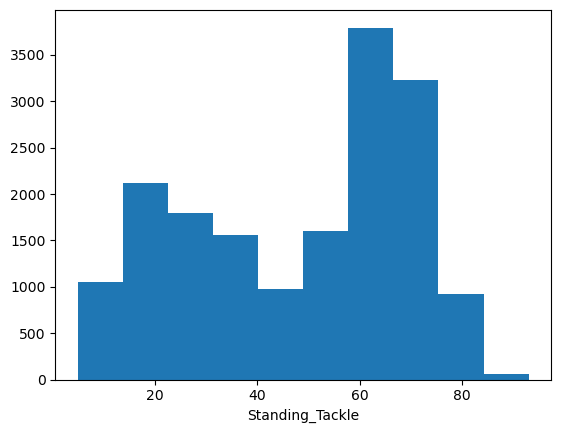

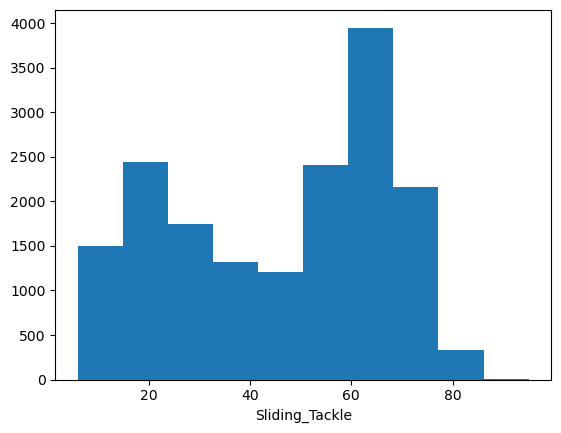

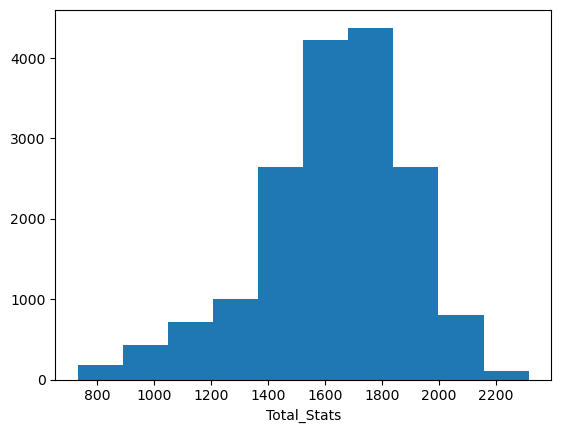

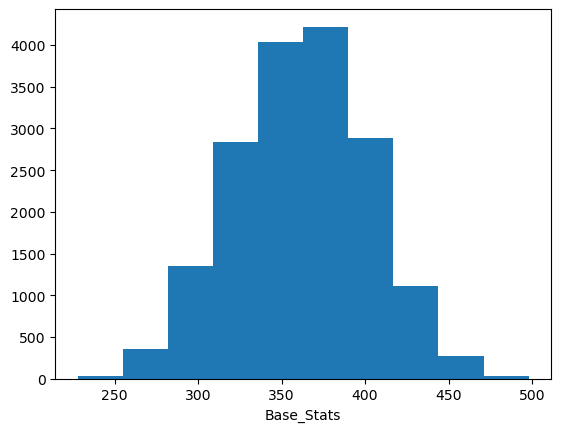

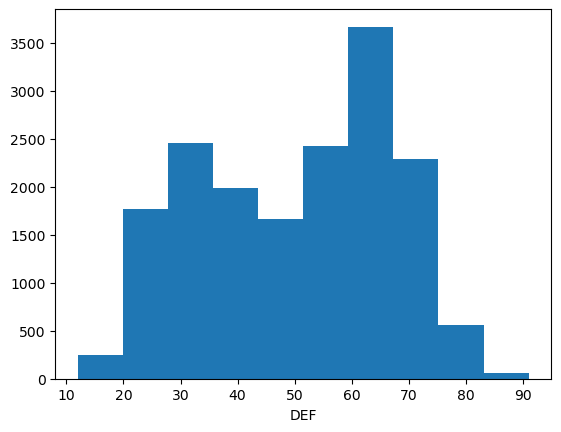

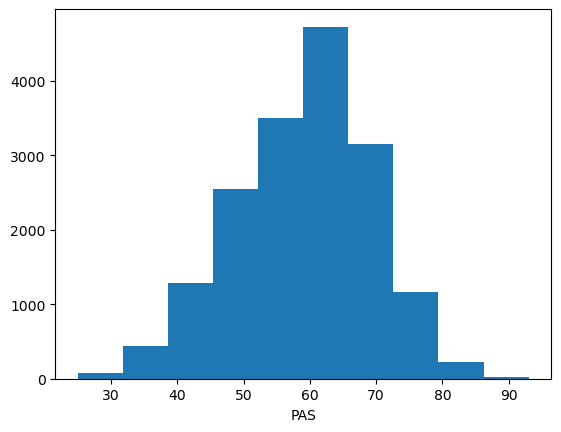

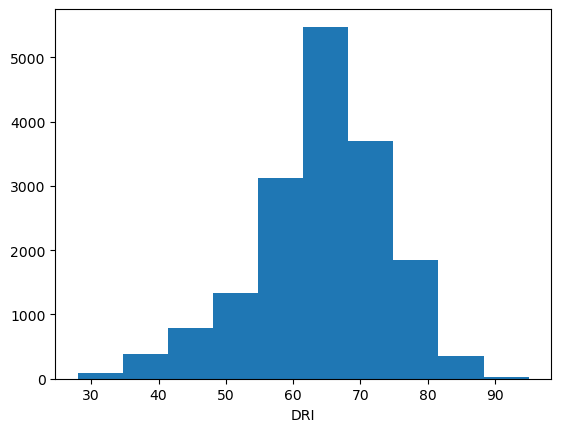

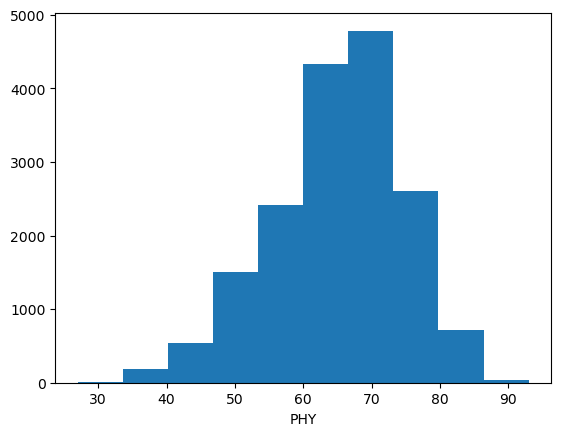

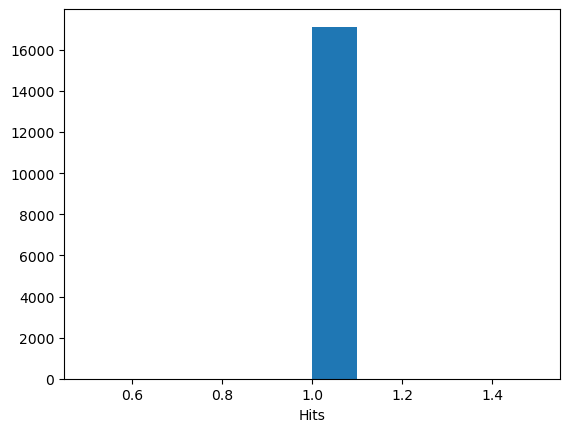

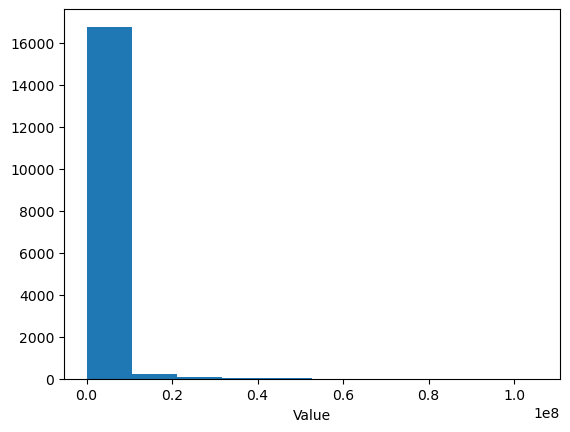

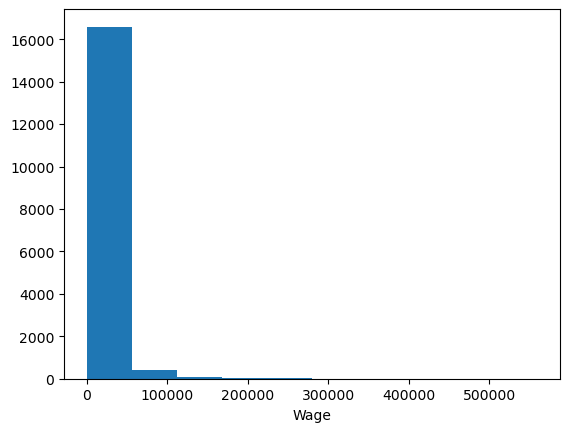

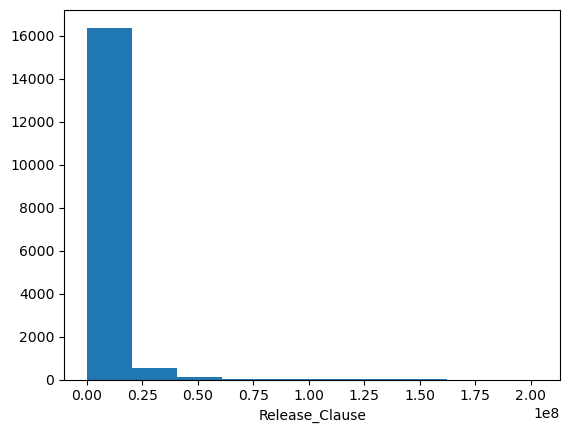

In [27]:
for column in fifa1_num.columns:
    plt.hist(fifa1_num[column])
    plt.xlabel(column)
    plt.show()

In [28]:
### Checking the pairplot

In [29]:
#sns.pairplot(fifa1_num)

### Check Outliers

In [30]:
fifa1_num.describe()

Age           OVA           BOV           POT     Attacking  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      25.272934     66.965022     67.900204     72.489810    258.537752   
std        4.942665      6.864329      6.637538      5.769949     72.255687   
min       16.000000     38.000000     42.000000     47.000000     33.000000   
25%       21.000000     62.000000     64.000000     69.000000    232.000000   
50%       25.000000     67.000000     68.000000     72.000000    271.000000   
75%       29.000000     72.000000     72.000000     76.000000    306.000000   
max       53.000000     93.000000     93.000000     95.000000    437.000000   

           Crossing     Finishing  Heading_Accuracy  Short_Passing  \
count  17125.000000  17125.000000      17125.000000   17125.000000   
mean      51.621314     47.956672         53.598832      60.507620   
std       17.875715     19.391547         16.947164      13.960635   
min        6.000000      3.000000          5.000000       7.000000   
25%       41.000000     33.000000         46.000000      56.000000   
50%       56.000000     52.000000         57.000000      63.000000   
75%       65.000000     64.000000         65.000000      69.000000   
max       94.000000     95.000000         93.000000      94.000000   

              Skill     Dribbling       Volleys         Curve   FK_Accuracy  \
count  17125.000000  17125.000000  17067.000000  17067.000000  17125.000000   
mean     266.607591     57.846423     45.005742     49.574676     44.387270   
std       76.809344     18.047250     17.729483     18.188344     17.504128   
min       43.000000      5.000000      4.000000      4.000000      5.000000   
25%      232.000000     53.000000     32.000000     37.000000     32.000000   
50%      279.000000     63.000000     46.000000     51.000000     43.000000   
75%      319.000000     70.000000     59.000000     64.000000     58.000000   
max      470.000000     96.000000     90.000000     94.000000     94.000000   

       Ball_Control  Long_Passing      Movement  Acceleration  Sprint_Speed  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      60.642803     54.324321    322.693664     65.445898     65.443036   
std       15.873647     14.856911     54.933593     14.657889     14.437377   
min        5.000000      9.000000    113.000000     12.000000     11.000000   
25%       57.000000     45.000000    294.000000     58.000000     59.000000   
50%       64.000000     57.000000    331.000000     68.000000     68.000000   
75%       70.000000     65.000000    360.000000     75.000000     75.000000   
max       96.000000     93.000000    464.000000     97.000000     96.000000   

            Agility     Reactions       Balance         Power    Shot_Power  \
count  17067.000000  17125.000000  17067.000000  17125.000000  17125.000000   
mean      64.602273     62.924847     64.715591    302.414774     59.711416   
std       14.372443      9.037279     14.031563     49.380576     13.417931   
min       14.000000     24.000000     17.000000    128.000000     12.000000   
25%       57.000000     57.000000     57.000000    272.000000     50.000000   
50%       67.000000     63.000000     67.000000    308.000000     61.000000   
75%       75.000000     69.000000     75.000000    339.000000     70.000000   
max       96.000000     96.000000     97.000000    444.000000     95.000000   

            Jumping       Stamina      Strength    Long_Shots     Mentality  \
count  17067.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      65.170212     63.309606     65.308555     49.135708    261.922803   
std       11.918063     15.313272     12.627212     19.044862     62.913935   
min       22.000000     11.000000     16.000000      4.000000     50.000000   
25%       58.000000     56.000000     58.000000     35.000000    235.000000   
50%       66.000000     66.000000     67.000000     53.000000  

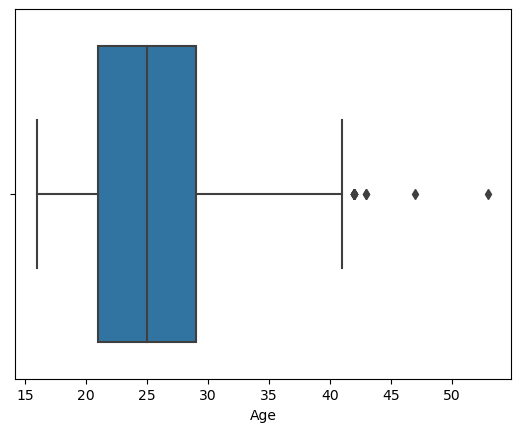

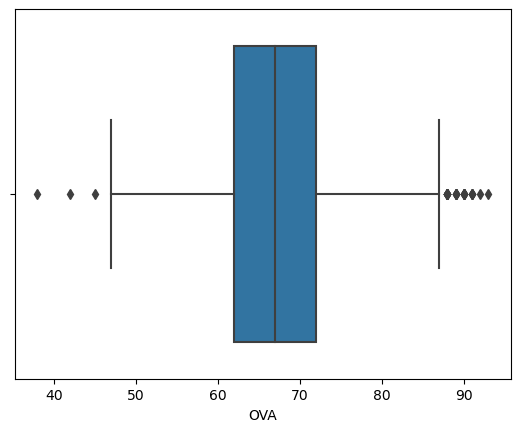

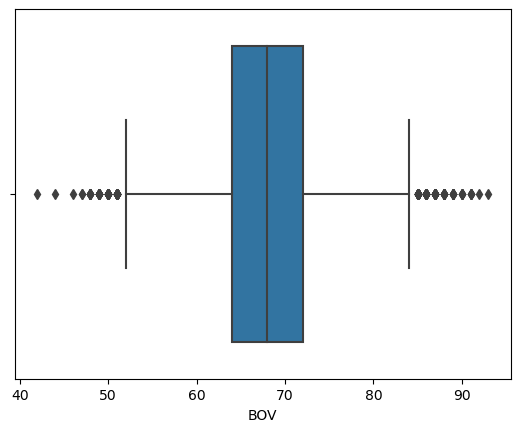

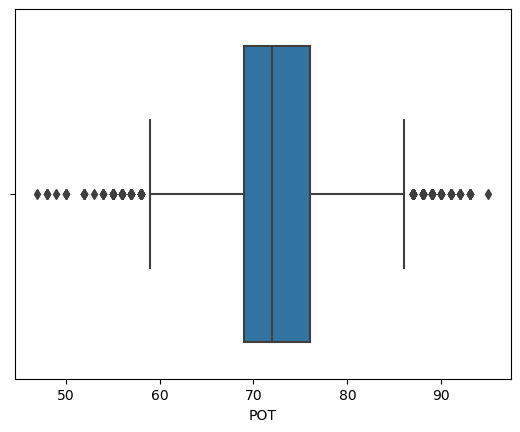

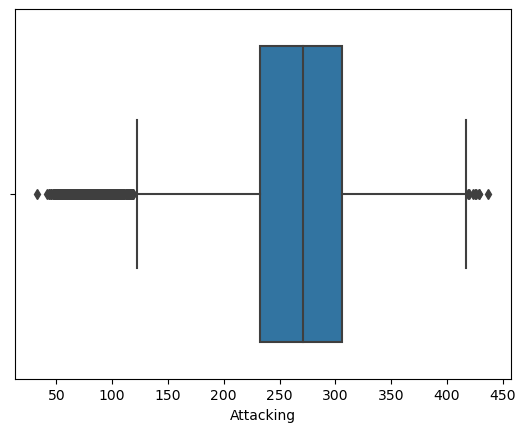

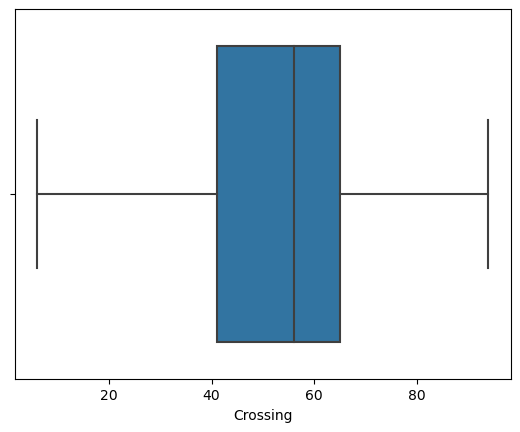

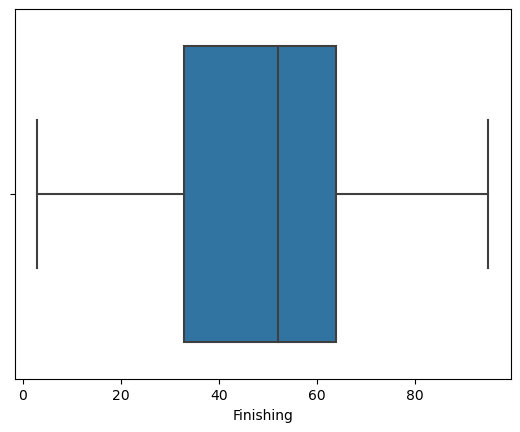

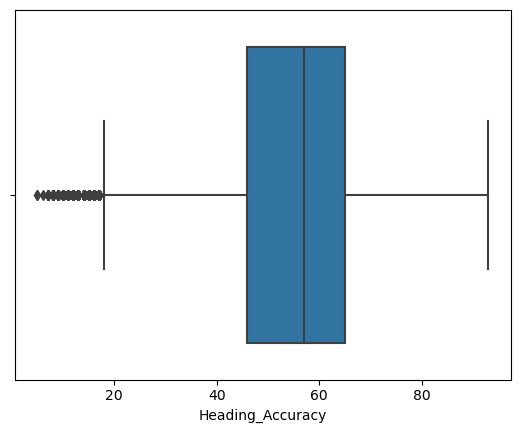

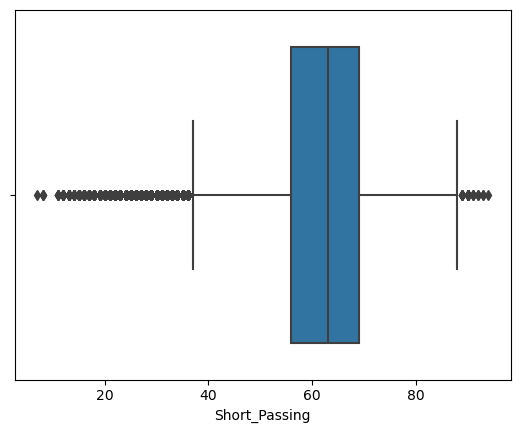

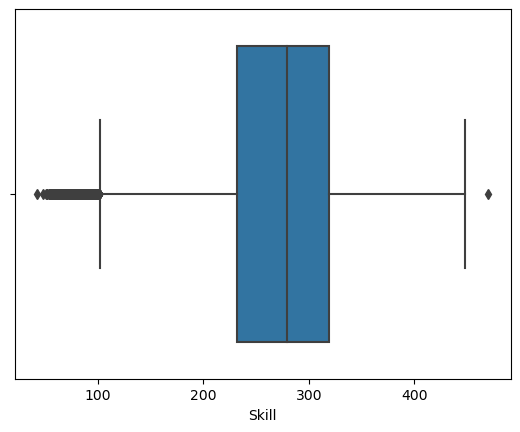

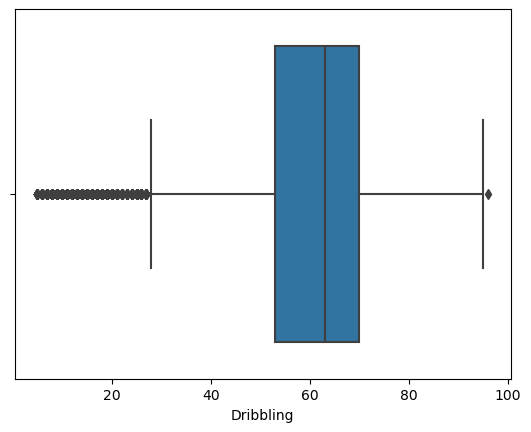

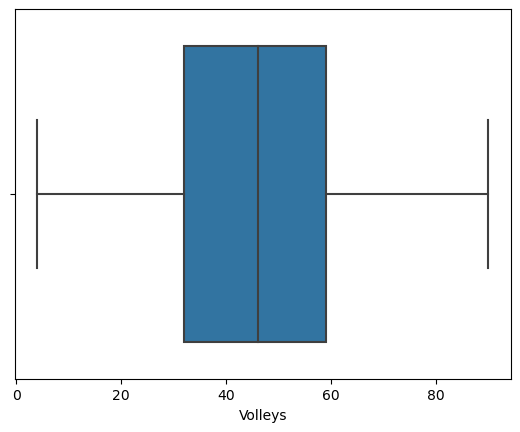

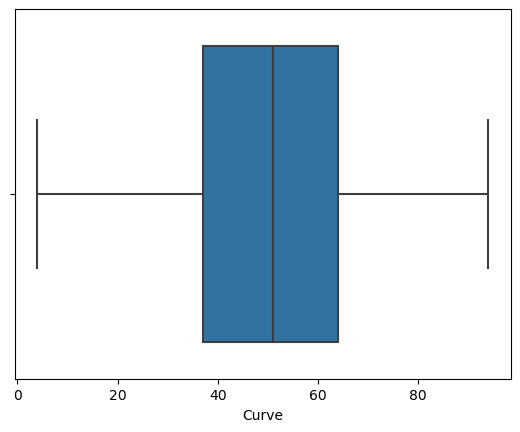

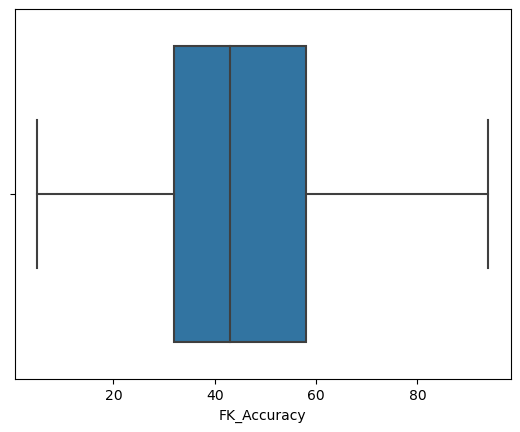

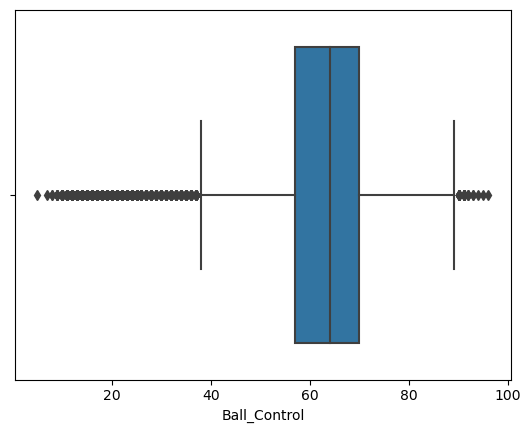

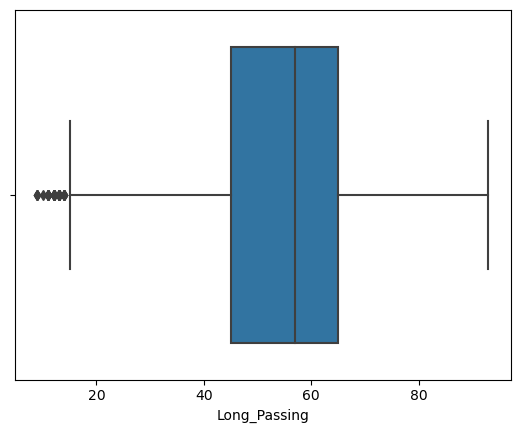

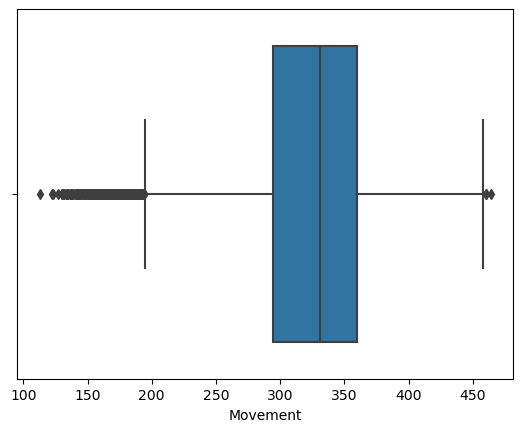

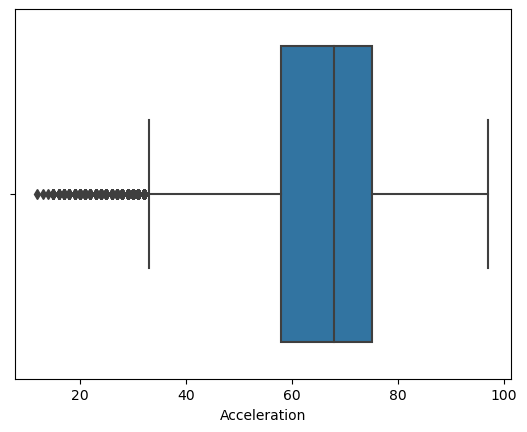

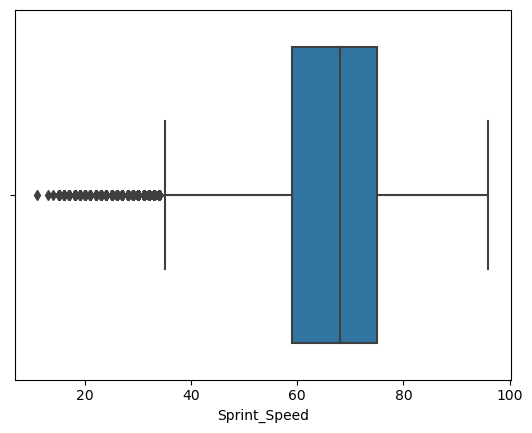

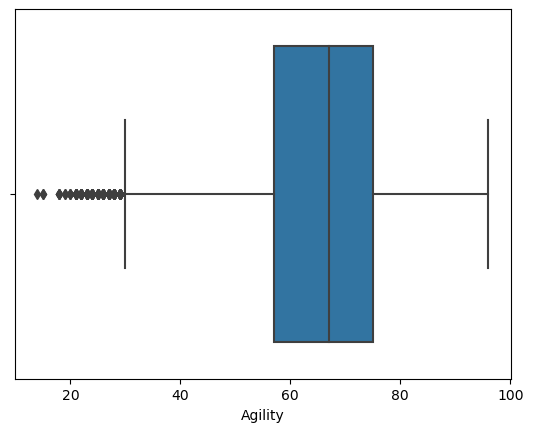

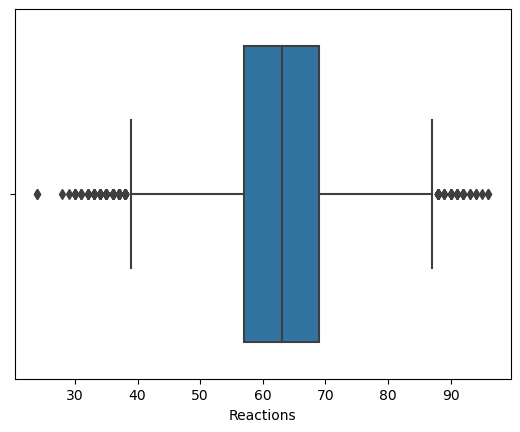

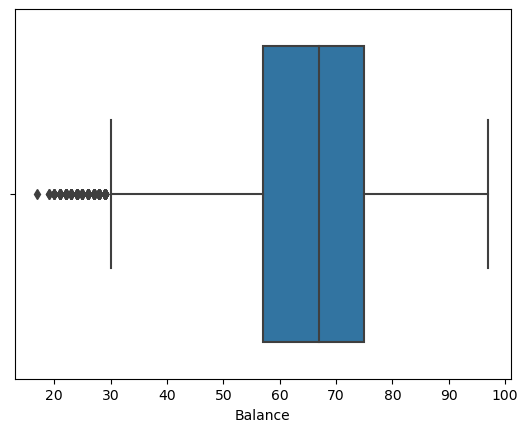

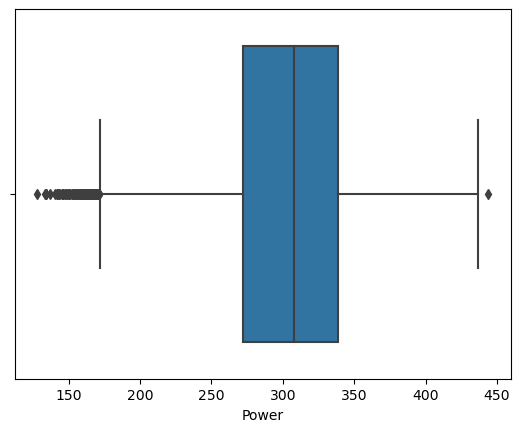

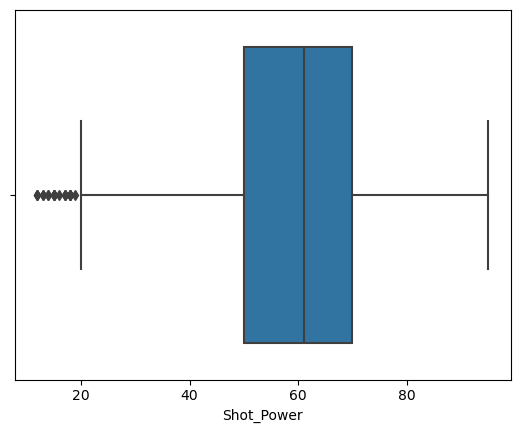

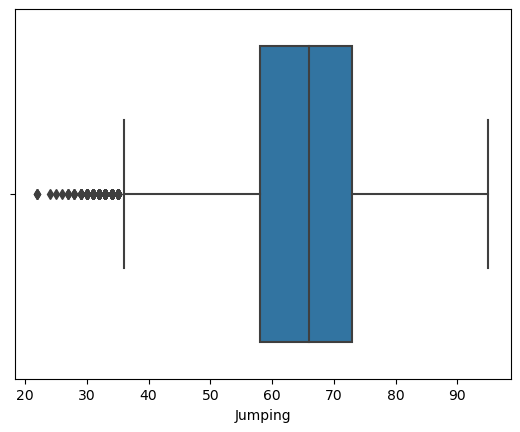

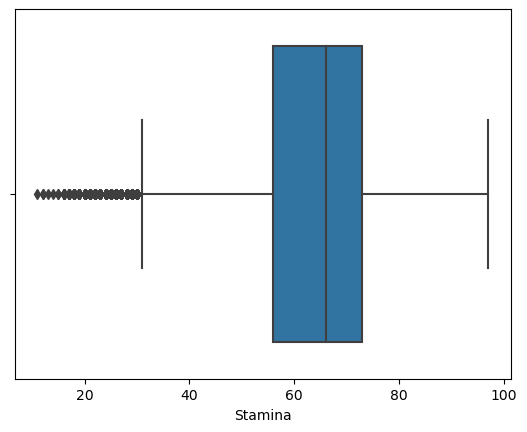

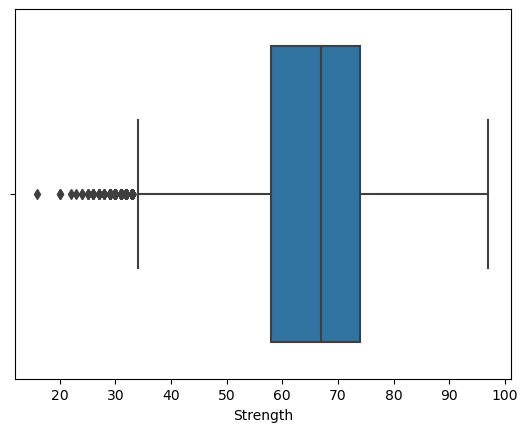

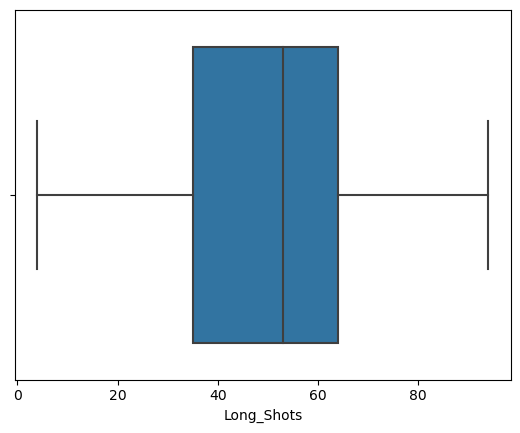

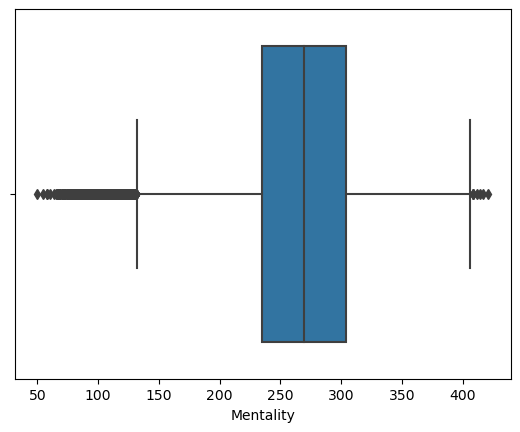

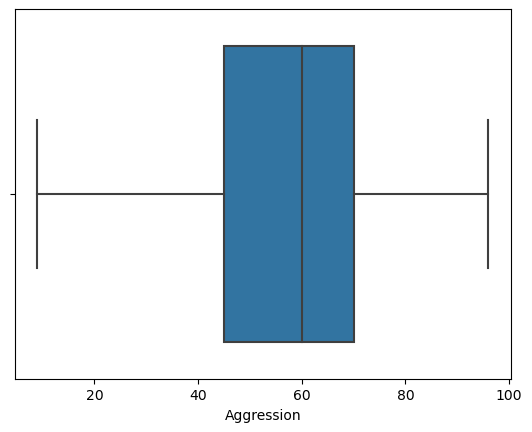

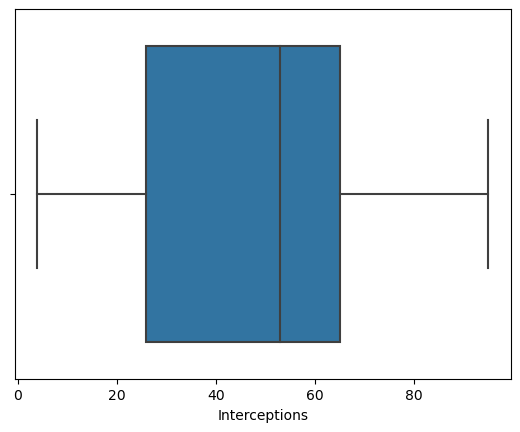

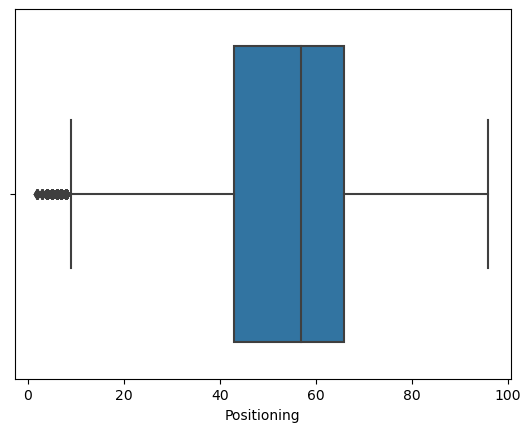

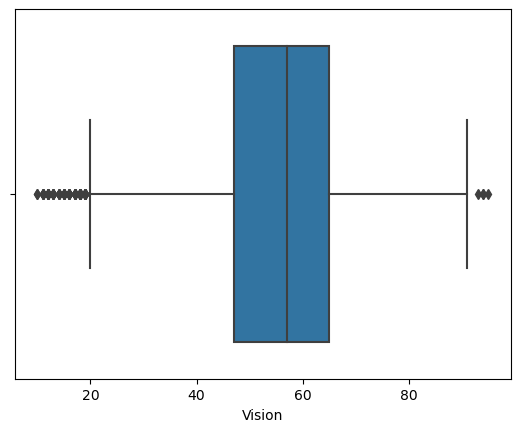

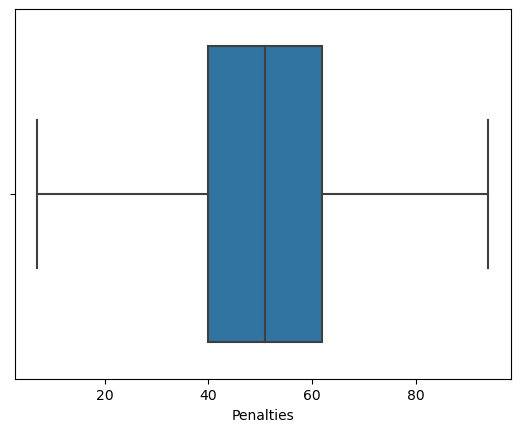

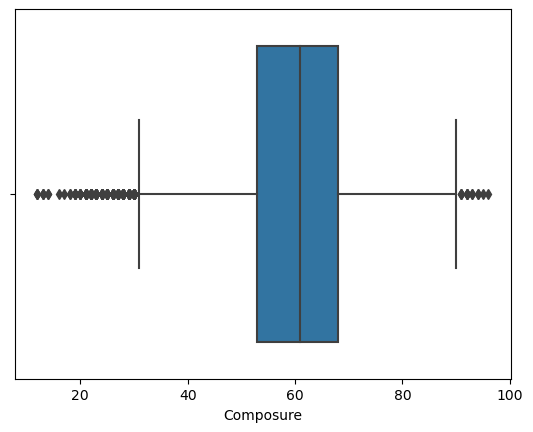

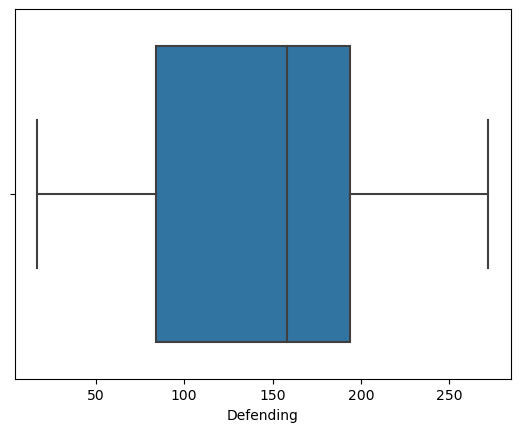

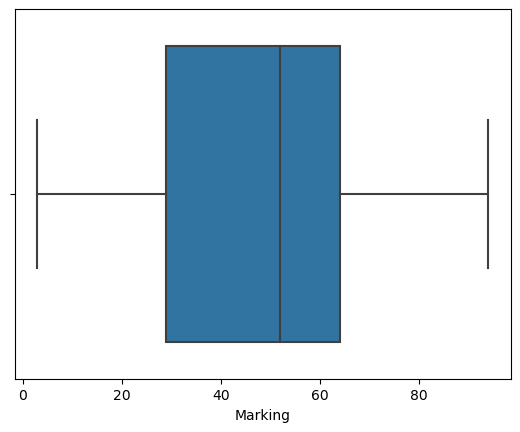

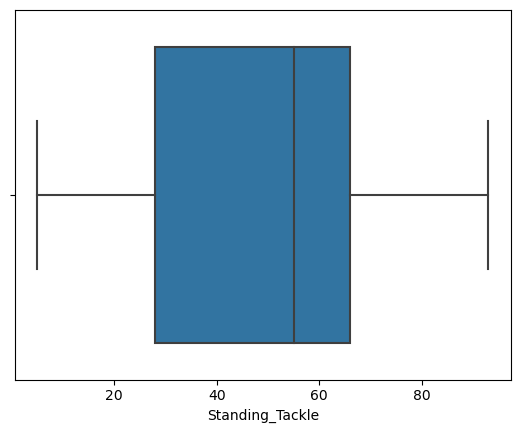

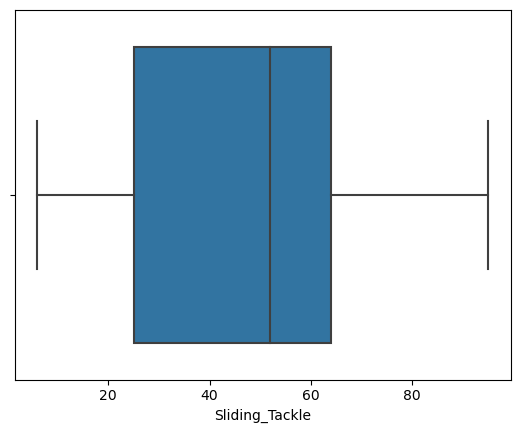

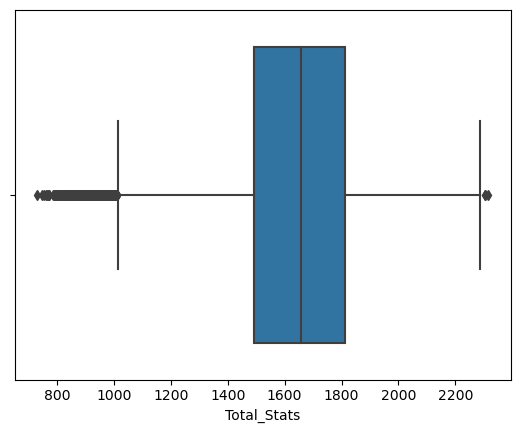

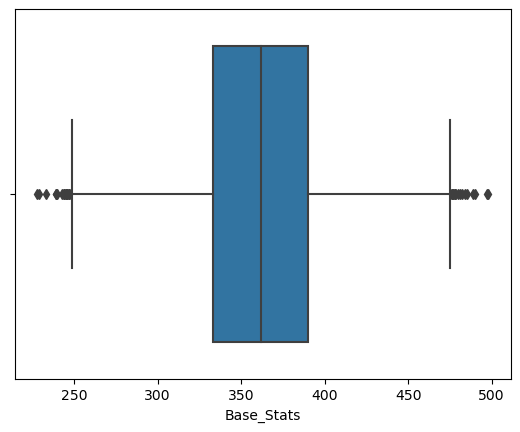

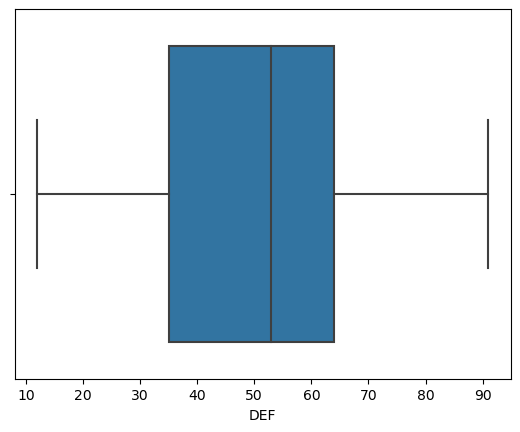

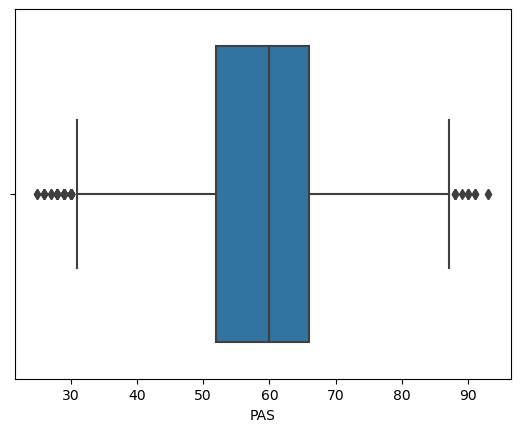

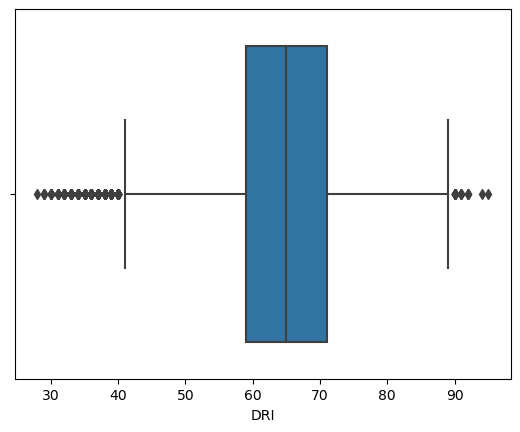

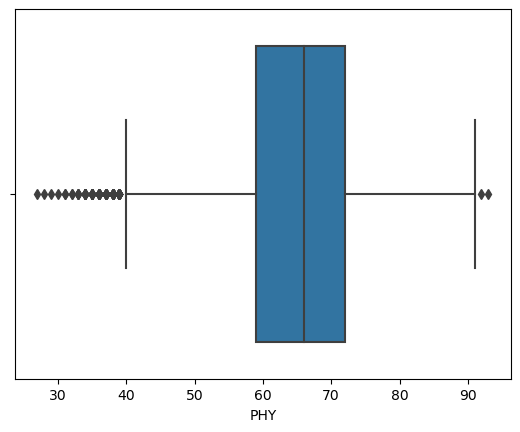

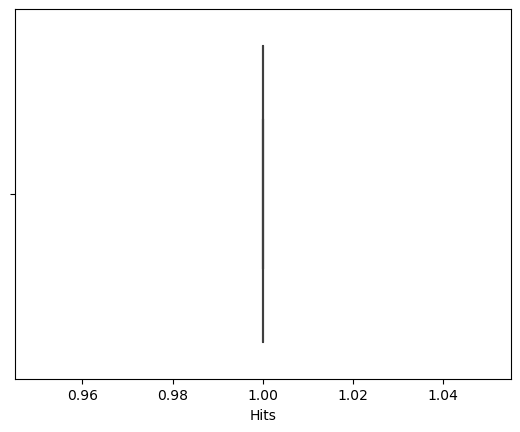

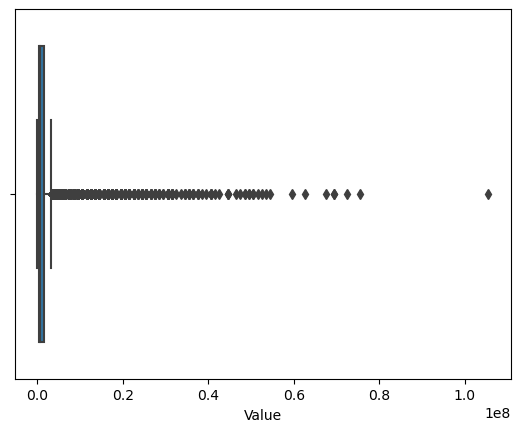

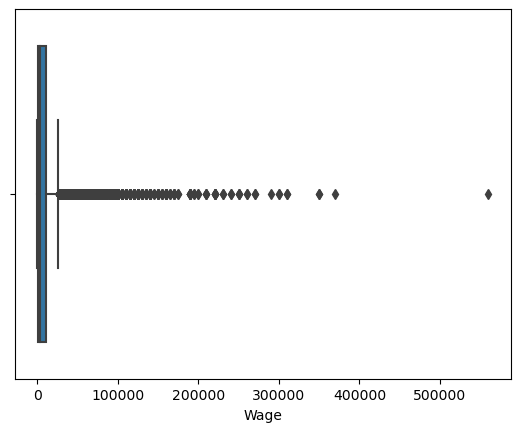

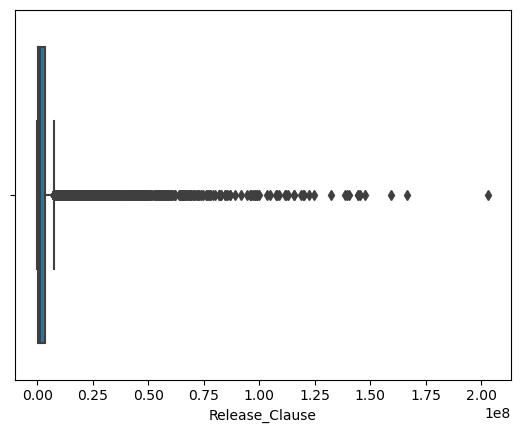

In [31]:
for column in fifa1_num.columns:
    sns.boxplot(fifa1_num[column])
    plt.show()

In [32]:
# Removing Rows(players) older than 30

#fifa1_num= fifa1_num[fifa1_num.Age<30]

In [33]:
fifa1_num.describe()

Age           OVA           BOV           POT     Attacking  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      25.272934     66.965022     67.900204     72.489810    258.537752   
std        4.942665      6.864329      6.637538      5.769949     72.255687   
min       16.000000     38.000000     42.000000     47.000000     33.000000   
25%       21.000000     62.000000     64.000000     69.000000    232.000000   
50%       25.000000     67.000000     68.000000     72.000000    271.000000   
75%       29.000000     72.000000     72.000000     76.000000    306.000000   
max       53.000000     93.000000     93.000000     95.000000    437.000000   

           Crossing     Finishing  Heading_Accuracy  Short_Passing  \
count  17125.000000  17125.000000      17125.000000   17125.000000   
mean      51.621314     47.956672         53.598832      60.507620   
std       17.875715     19.391547         16.947164      13.960635   
min        6.000000      3.000000          5.000000       7.000000   
25%       41.000000     33.000000         46.000000      56.000000   
50%       56.000000     52.000000         57.000000      63.000000   
75%       65.000000     64.000000         65.000000      69.000000   
max       94.000000     95.000000         93.000000      94.000000   

              Skill     Dribbling       Volleys         Curve   FK_Accuracy  \
count  17125.000000  17125.000000  17067.000000  17067.000000  17125.000000   
mean     266.607591     57.846423     45.005742     49.574676     44.387270   
std       76.809344     18.047250     17.729483     18.188344     17.504128   
min       43.000000      5.000000      4.000000      4.000000      5.000000   
25%      232.000000     53.000000     32.000000     37.000000     32.000000   
50%      279.000000     63.000000     46.000000     51.000000     43.000000   
75%      319.000000     70.000000     59.000000     64.000000     58.000000   
max      470.000000     96.000000     90.000000     94.000000     94.000000   

       Ball_Control  Long_Passing      Movement  Acceleration  Sprint_Speed  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      60.642803     54.324321    322.693664     65.445898     65.443036   
std       15.873647     14.856911     54.933593     14.657889     14.437377   
min        5.000000      9.000000    113.000000     12.000000     11.000000   
25%       57.000000     45.000000    294.000000     58.000000     59.000000   
50%       64.000000     57.000000    331.000000     68.000000     68.000000   
75%       70.000000     65.000000    360.000000     75.000000     75.000000   
max       96.000000     93.000000    464.000000     97.000000     96.000000   

            Agility     Reactions       Balance         Power    Shot_Power  \
count  17067.000000  17125.000000  17067.000000  17125.000000  17125.000000   
mean      64.602273     62.924847     64.715591    302.414774     59.711416   
std       14.372443      9.037279     14.031563     49.380576     13.417931   
min       14.000000     24.000000     17.000000    128.000000     12.000000   
25%       57.000000     57.000000     57.000000    272.000000     50.000000   
50%       67.000000     63.000000     67.000000    308.000000     61.000000   
75%       75.000000     69.000000     75.000000    339.000000     70.000000   
max       96.000000     96.000000     97.000000    444.000000     95.000000   

            Jumping       Stamina      Strength    Long_Shots     Mentality  \
count  17067.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      65.170212     63.309606     65.308555     49.135708    261.922803   
std       11.918063     15.313272     12.627212     19.044862     62.913935   
min       22.000000     11.000000     16.000000      4.000000     50.000000   
25%       58.000000     56.000000     58.000000     35.000000    235.000000   
50%       66.000000     66.000000     67.000000     53.000000  

In [34]:
fifa1_num.shape

(17125, 49)

In [35]:
#Droping Hits cuz it is just irrelevant
fifa1_num= fifa1_num.drop(['Hits'], axis=1)
fifa1_num.head()

Age  OVA  BOV  POT  Attacking  Crossing  Finishing  Heading_Accuracy  \
0   33   69   71   69        313        75         50                59   
1   37   71   70   71        337        68         64                61   
2   33   71   71   71        337        80         64                41   
3   36   68   70   82        264        54         70                60   
4   36   81   82   81        367        75         69                54   

   Short_Passing  Skill  Dribbling  Volleys  Curve  FK_Accuracy  Ball_Control  \
0             71    338         73     58.0   65.0           60            71   
1             76    369         69     68.0   79.0           79            71   
2             77    387         79     75.0   84.0           77            78   
3             80    255         68      NaN    NaN           46            77   
4             90    408         85     79.0   80.0           70            90   

   Long_Passing  Movement  Acceleration  Sprint_Speed  Agility  Reactions  \
0            69       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            69       295            48            42     71.0         59   
3            64       176            59            62      NaN         55   
4            83       346            61            56     79.0         75   

   Balance  Power  Shot_Power  Jumping  Stamina  Strength  Long_Shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        320          72           69.0         63.0    66.0         50   
1        362          71           71.0         72.0    73.0         75   
2        317          69           39.0         69.0    74.0         66   
3        271          59           70.0         72.0     NaN         70   
4        370          58           70.0         78.0    93.0         71   

   Composure  Defending  Marking  Standing_Tackle  Sliding_Tackle  \
0        NaN        208       70               69            69.0   
1       79.0        153       70               43            40.0   
2        NaN         99       35               34            30.0   
3        NaN         75       34               41             NaN   
4       89.0        181       68               57            56.0   

   Total_Stats  Base_Stats  DEF  PAS  DRI  PHY      Value     Wage  \
0         1929         408   68   70   71   69   625000.0   7000.0   
1         1906         385   58   73   69   63   600000.0   7000.0   
2         1770         354   36   76   77   52  1100000.0  15000.0   
3         1348         369   47   66   69   60        0.0      0.0   
4         2014         420   63   85   85   59  5500000.0  12000.0   

   Release_Clause  
0             0.0  
1       1100000.0  
2             0.0  
3             0.0  
4       7200000.0

In [36]:
#Removing players with OVA below the lower limit
#fifa1_num= fifa1_num[fifa1_num.OVA>61]

In [37]:
#Removing players with BOV below the lower limit
#fifa1_num= fifa1_num[fifa1_num.BOV>63]

### Checking POT outliers

In [38]:
#Defining iqr for POT
iqr = np.percentile(fifa1_num['POT'],75) - np.percentile(fifa1_num['POT'],25)
iqr

7.0

In [39]:
#Defining the Limits for POT
upper_limit = np.percentile(fifa1_num['POT'],75) + 1.5*iqr
lower_limit = np.percentile(fifa1_num['POT'],25) - 1.5*iqr
upper_limit, lower_limit

(86.5, 58.5)

In [40]:
#how many rows are the outliers in POT
len(fifa1_num[(fifa1_num['POT']<lower_limit) & (fifa1_num['POT']>upper_limit)])

0

## checking the multicollinearity between the features

In [41]:
# look at correlations between columns

fifa1_num_corr = fifa1_num.corr()
fifa1_num_corr = round(fifa1_num_corr,2)
fifa1_num_corr

Age   OVA   BOV   POT  Attacking  Crossing  Finishing  \
Age               1.00  0.52  0.46 -0.24       0.18      0.15       0.11   
OVA               0.52  1.00  0.99  0.59       0.43      0.39       0.30   
BOV               0.46  0.99  1.00  0.63       0.46      0.40       0.34   
POT              -0.24  0.59  0.63  1.00       0.23      0.21       0.17   
Attacking         0.18  0.43  0.46  0.23       1.00      0.84       0.88   
Crossing          0.15  0.39  0.40  0.21       0.84      1.00       0.65   
Finishing         0.11  0.30  0.34  0.17       0.88      0.65       1.00   
Heading_Accuracy  0.17  0.31  0.34  0.14       0.70      0.43       0.45   
Short_Passing     0.18  0.49  0.53  0.32       0.88      0.80       0.65   
Skill             0.17  0.44  0.47  0.27       0.93      0.88       0.79   
Dribbling         0.04  0.35  0.39  0.26       0.91      0.86       0.82   
Volleys           0.19  0.36  0.39  0.18       0.90      0.68       0.89   
Curve             0.18  0.40  0.42  0.22       0.85      0.83       0.76   
FK_Accuracy       0.22  0.37  0.39  0.17       0.78      0.75       0.70   
Ball_Control      0.12  0.43  0.47  0.29       0.93      0.83       0.78   
Long_Passing      0.22  0.48  0.52  0.28       0.73      0.74       0.49   
Movement         -0.06  0.30  0.34  0.26       0.69      0.72       0.64   
Acceleration     -0.19  0.14  0.18  0.20       0.59      0.63       0.57   
Sprint_Speed     -0.18  0.15  0.19  0.20       0.59      0.60       0.55   
Agility          -0.04  0.23  0.26  0.19       0.64      0.69       0.63   
Reactions         0.50  0.87  0.87  0.47       0.44      0.37       0.33   
Balance          -0.09  0.10  0.13  0.13       0.54      0.62       0.51   
Power             0.31  0.55  0.57  0.22       0.82      0.63       0.70   
Shot_Power        0.30  0.53  0.55  0.27       0.71      0.54       0.73   
Jumping           0.20  0.26  0.26  0.08       0.18      0.09       0.06   
Stamina           0.07  0.34  0.37  0.17       0.67      0.64       0.48   
Strength          0.35  0.34  0.34  0.03       0.13     -0.06      -0.01   
Long_Shots        0.19  0.39  0.42  0.19       0.89      0.74       0.88   
Mentality         0.27  0.50  0.52  0.24       0.89      0.80       0.67   
Aggression        0.28  0.38  0.40  0.14       0.53      0.45       0.23   
Interceptions     0.19  0.31  0.32  0.14       0.31      0.40      -0.07   
Positioning       0.12  0.34  0.37  0.19       0.91      0.78       0.90   
Vision            0.24  0.51  0.53  0.31       0.72      0.68       0.70   
Penalties         0.20  0.32  0.34  0.15       0.84      0.63       0.84   
Composure         0.42  0.71  0.72  0.37       0.71      0.60       0.56   
Defending         0.11  0.25  0.27  0.14       0.31      0.40      -0.07   
Marking           0.16  0.29  0.31  0.15       0.34      0.41      -0.03   
Standing_Tackle   0.11  0.24  0.26  0.14       0.31      0.40      -0.07   
Sliding_Tackle    0.09  0.21  0.23  0.13       0.27      0.38      -0.11   
Total_Stats       0.28  0.61  0.64  0.33       0.90      0.85       0.71   
Base_Stats        0.41  0.83  0.83  0.47       0.43      0.49       0.36   
DEF               0.22  0.34  0.35  0.17       0.11      0.22      -0.26   
PAS               0.40  0.70  0.69  0.40       0.37      0.51       0.33   
DRI               0.24  0.64  0.64  0.45       0.38      0.45       0.47   
PHY               0.44  0.54  0.54  0.16       0.10     -0.01      -0.07   
Value             0.08  0.51  0.51  0.44       0.23      0.20       0.18   
Wage              0.20  0.59  0.59  0.46       0.29      0.25       0.21   
Release_Clause    0.07  0.56  0.57  0.52       0.25      0.22       0.20   

                  Heading_Accuracy  Short_Passing  Skill  Dribbling  Volleys  \
Age                           0.17           0.18   0.17       0.04     0.19   
OVA                           0.31           0.49   0.44       0.35     0.36   
BOV                           0.34           0.53   0.

In [42]:
#Removing some irrelevant columns because of multicula
#'Dribbling','Volleys' and 'Curve'have multi with Skill
#Acceleration and  Sprint_Speed with agility
#"Defending has high multi with"Standing_Tackle and Sliding_Tackle
# VALue has high multi with Release_Clause
# Penalties has high multi with Positioning

fifa1_num= fifa1_num.drop(['Dribbling','Volleys', 'Curve', 'Marking','Acceleration', 'Sprint_Speed', 'Standing_Tackle', 'Sliding_Tackle', 'Release_Clause', 'Penalties'], axis=1)
fifa1_num.head()

Age  OVA  BOV  POT  Attacking  Crossing  Finishing  Heading_Accuracy  \
0   33   69   71   69        313        75         50                59   
1   37   71   70   71        337        68         64                61   
2   33   71   71   71        337        80         64                41   
3   36   68   70   82        264        54         70                60   
4   36   81   82   81        367        75         69                54   

   Short_Passing  Skill  FK_Accuracy  Ball_Control  Long_Passing  Movement  \
0             71    338           60            71            69       347   
1             76    369           79            71            71       305   
2             77    387           77            78            69       295   
3             80    255           46            77            64       176   
4             90    408           70            90            83       346   

   Agility  Reactions  Balance  Power  Shot_Power  Jumping  Stamina  Strength  \
0     68.0         69     68.0    347          74     68.0       69        68   
1     62.0         65     72.0    324          75     54.0       64        60   
2     71.0         59     75.0    284          72     58.0       29        56   
3      NaN         55      NaN    239          63      NaN       51        66   
4     79.0         75     75.0    297          67     40.0       58        62   

   Long_Shots  Mentality  Aggression  Interceptions  Positioning  Vision  \
0          68        320          72           69.0         63.0    66.0   
1          71        362          71           71.0         72.0    73.0   
2          69        317          69           39.0         69.0    74.0   
3          59        271          59           70.0         72.0     NaN   
4          70        370          58           70.0         78.0    93.0   

   Composure  Defending  Total_Stats  Base_Stats  DEF  PAS  DRI  PHY  \
0        NaN        208         1929         408   68   70   71   69   
1       79.0        153         1906         385   58   73   69   63   
2        NaN         99         1770         354   36   76   77   52   
3        NaN         75         1348         369   47   66   69   60   
4       89.0        181         2014         420   63   85   85   59   

       Value     Wage  
0   625000.0   7000.0  
1   600000.0   7000.0  
2  1100000.0  15000.0  
3        0.0      0.0  
4  5500000.0  12000.0

In [43]:
fifa1_num_corr = fifa1_num.corr()
fifa1_num_corr = round(fifa1_num_corr,2)
fifa1_num_corr

Age   OVA   BOV   POT  Attacking  Crossing  Finishing  \
Age               1.00  0.52  0.46 -0.24       0.18      0.15       0.11   
OVA               0.52  1.00  0.99  0.59       0.43      0.39       0.30   
BOV               0.46  0.99  1.00  0.63       0.46      0.40       0.34   
POT              -0.24  0.59  0.63  1.00       0.23      0.21       0.17   
Attacking         0.18  0.43  0.46  0.23       1.00      0.84       0.88   
Crossing          0.15  0.39  0.40  0.21       0.84      1.00       0.65   
Finishing         0.11  0.30  0.34  0.17       0.88      0.65       1.00   
Heading_Accuracy  0.17  0.31  0.34  0.14       0.70      0.43       0.45   
Short_Passing     0.18  0.49  0.53  0.32       0.88      0.80       0.65   
Skill             0.17  0.44  0.47  0.27       0.93      0.88       0.79   
FK_Accuracy       0.22  0.37  0.39  0.17       0.78      0.75       0.70   
Ball_Control      0.12  0.43  0.47  0.29       0.93      0.83       0.78   
Long_Passing      0.22  0.48  0.52  0.28       0.73      0.74       0.49   
Movement         -0.06  0.30  0.34  0.26       0.69      0.72       0.64   
Agility          -0.04  0.23  0.26  0.19       0.64      0.69       0.63   
Reactions         0.50  0.87  0.87  0.47       0.44      0.37       0.33   
Balance          -0.09  0.10  0.13  0.13       0.54      0.62       0.51   
Power             0.31  0.55  0.57  0.22       0.82      0.63       0.70   
Shot_Power        0.30  0.53  0.55  0.27       0.71      0.54       0.73   
Jumping           0.20  0.26  0.26  0.08       0.18      0.09       0.06   
Stamina           0.07  0.34  0.37  0.17       0.67      0.64       0.48   
Strength          0.35  0.34  0.34  0.03       0.13     -0.06      -0.01   
Long_Shots        0.19  0.39  0.42  0.19       0.89      0.74       0.88   
Mentality         0.27  0.50  0.52  0.24       0.89      0.80       0.67   
Aggression        0.28  0.38  0.40  0.14       0.53      0.45       0.23   
Interceptions     0.19  0.31  0.32  0.14       0.31      0.40      -0.07   
Positioning       0.12  0.34  0.37  0.19       0.91      0.78       0.90   
Vision            0.24  0.51  0.53  0.31       0.72      0.68       0.70   
Composure         0.42  0.71  0.72  0.37       0.71      0.60       0.56   
Defending         0.11  0.25  0.27  0.14       0.31      0.40      -0.07   
Total_Stats       0.28  0.61  0.64  0.33       0.90      0.85       0.71   
Base_Stats        0.41  0.83  0.83  0.47       0.43      0.49       0.36   
DEF               0.22  0.34  0.35  0.17       0.11      0.22      -0.26   
PAS               0.40  0.70  0.69  0.40       0.37      0.51       0.33   
DRI               0.24  0.64  0.64  0.45       0.38      0.45       0.47   
PHY               0.44  0.54  0.54  0.16       0.10     -0.01      -0.07   
Value             0.08  0.51  0.51  0.44       0.23      0.20       0.18   
Wage              0.20  0.59  0.59  0.46       0.29      0.25       0.21   

                  Heading_Accuracy  Short_Passing  Skill  FK_Accuracy  \
Age                           0.17           0.18   0.17         0.22   
OVA                           0.31           0.49   0.44         0.37   
BOV                           0.34           0.53   0.47         0.39   
POT                           0.14           0.32   0.27         0.17   
Attacking                     0.70           0.88   0.93         0.78   
Crossing                      0.43           0.80   0.88         0.75   
Finishing                     0.45           0.65   0.79         0.70   
Heading_Accuracy              1.00           0.63   0.53         0.36   
Short_Passing                 0.63           1.00   0.90         0.72   
Skill                         0.53           0.90   1.00         0.89   
FK_Accuracy                   0.36           0.72   0.89         1.00   
Ball_Control                  0.64           0.92   0.94         0.75   
Long_Passing                  0.48           0.88   0.84         0.69   
Movement                      0.

In [44]:
fifa1_num= fifa1_num.drop(['Crossing','Finishing', 'FK_Accuracy', 'Long_Passing', 'Shot_Power', 'Jumping', 'Stamina', 'Vision', 'Ball_Control', 'Agility', 'Short_Passing', 'Composure'], axis=1)
fifa1_num.head()

Age  OVA  BOV  POT  Attacking  Heading_Accuracy  Skill  Movement  \
0   33   69   71   69        313                59    338       347   
1   37   71   70   71        337                61    369       305   
2   33   71   71   71        337                41    387       295   
3   36   68   70   82        264                60    255       176   
4   36   81   82   81        367                54    408       346   

   Reactions  Balance  Power  Strength  Long_Shots  Mentality  Aggression  \
0         69     68.0    347        68          68        320          72   
1         65     72.0    324        60          71        362          71   
2         59     75.0    284        56          69        317          69   
3         55      NaN    239        66          59        271          59   
4         75     75.0    297        62          70        370          58   

   Interceptions  Positioning  Defending  Total_Stats  Base_Stats  DEF  PAS  \
0           69.0         63.0        208         1929         408   68   70   
1           71.0         72.0        153         1906         385   58   73   
2           39.0         69.0         99         1770         354   36   76   
3           70.0         72.0         75         1348         369   47   66   
4           70.0         78.0        181         2014         420   63   85   

   DRI  PHY      Value     Wage  
0   71   69   625000.0   7000.0  
1   69   63   600000.0   7000.0  
2   77   52  1100000.0  15000.0  
3   69   60        0.0      0.0  
4   85   59  5500000.0  12000.0

In [45]:
#fifa1_num= fifa1_num.drop(['Marking','Volleys'], axis=1)
#fifa1_num.head()

In [46]:
#sns_plot = sns.heatmap(fifa_clean_num_corr, annot=True)
#figure = sns_plot.get_figure()    
#figure.savefig('svm_conf.png', dpi=400)
#plt.show()

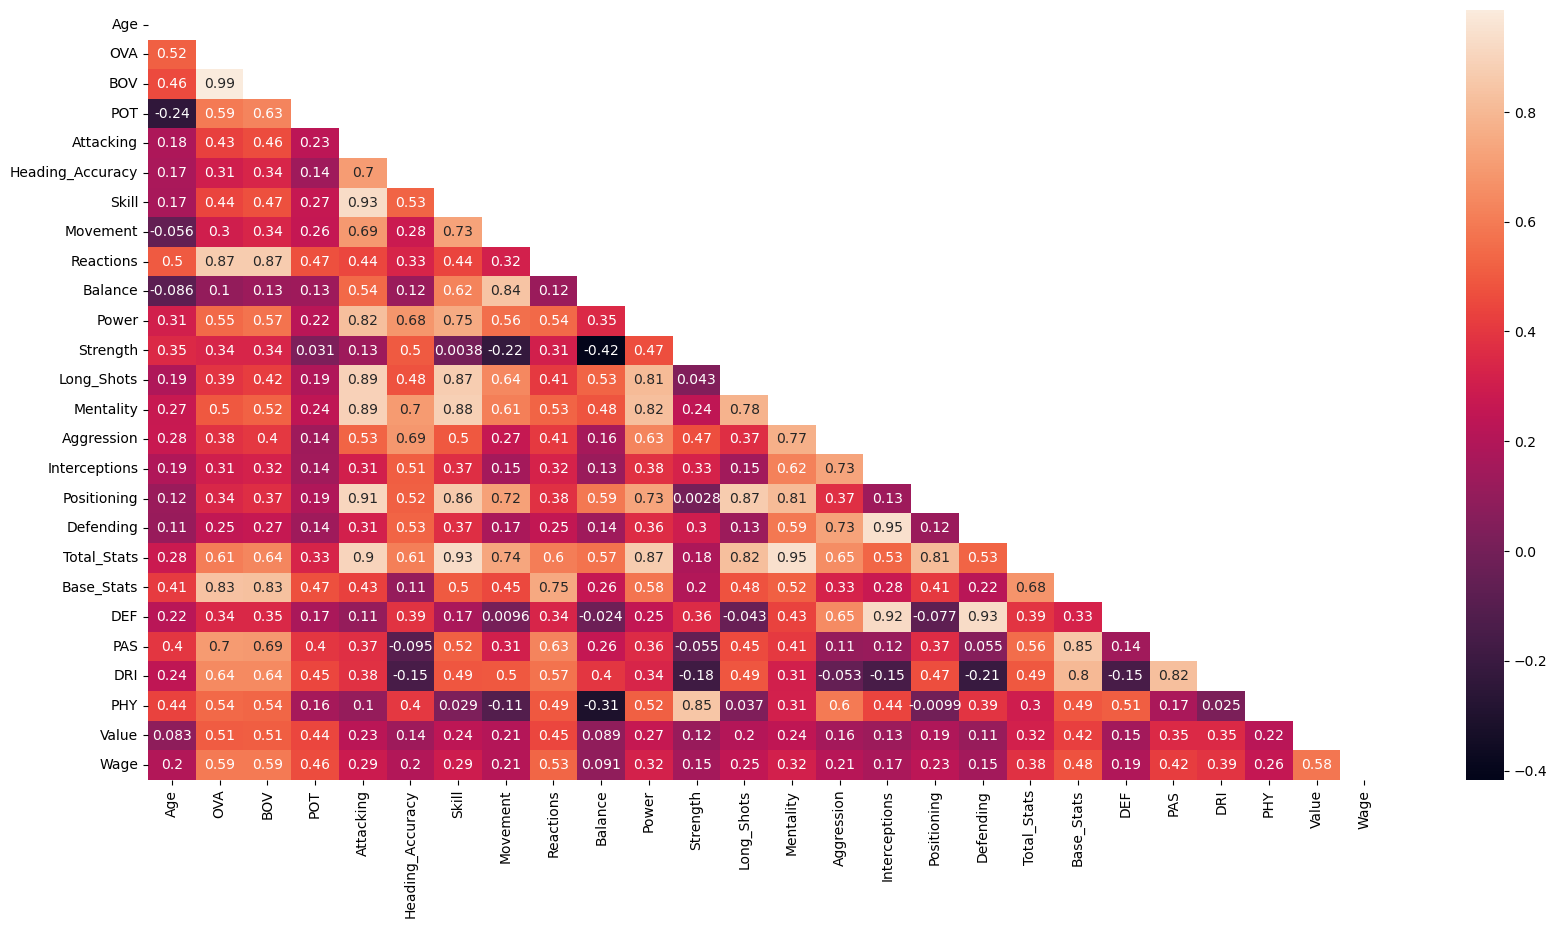

In [47]:
mask = np.zeros_like(fifa1_num.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(fifa1_num.corr(), mask=mask, annot=True)
plt.show()

In [92]:
#sns.pairplot(fifa1_num)

### Splitting data (X-y Split)

In [49]:
y = fifa1_num['OVA']
X = fifa1_num.drop(['OVA'], axis=1)
X.head()

Age  BOV  POT  Attacking  Heading_Accuracy  Skill  Movement  Reactions  \
0   33   71   69        313                59    338       347         69   
1   37   70   71        337                61    369       305         65   
2   33   71   71        337                41    387       295         59   
3   36   70   82        264                60    255       176         55   
4   36   82   81        367                54    408       346         75   

   Balance  Power  Strength  Long_Shots  Mentality  Aggression  Interceptions  \
0     68.0    347        68          68        320          72           69.0   
1     72.0    324        60          71        362          71           71.0   
2     75.0    284        56          69        317          69           39.0   
3      NaN    239        66          59        271          59           70.0   
4     75.0    297        62          70        370          58           70.0   

   Positioning  Defending  Total_Stats  Base_Stats  DEF  PAS  DRI  PHY  \
0         63.0        208         1929         408   68   70   71   69   
1         72.0        153         1906         385   58   73   69   63   
2         69.0         99         1770         354   36   76   77   52   
3         72.0         75         1348         369   47   66   69   60   
4         78.0        181         2014         420   63   85   85   59   

       Value     Wage  
0   625000.0   7000.0  
1   600000.0   7000.0  
2  1100000.0  15000.0  
3        0.0      0.0  
4  5500000.0  12000.0

In [50]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num

Age  BOV  POT  Attacking  Heading_Accuracy  Skill  Movement  Reactions  \
0       33   71   69        313                59    338       347         69   
1       37   70   71        337                61    369       305         65   
2       33   71   71        337                41    387       295         59   
3       36   70   82        264                60    255       176         55   
4       36   82   81        367                54    408       346         75   
...    ...  ...  ...        ...               ...    ...       ...        ...   
17120   22   66   69        197                66    193       243         48   
17121   18   58   66        248                50    264       298         54   
17122   18   56   67        218                53    212       308         59   
17123   20   62   73        223                52    258       349         56   
17124   18   61   74        254                59    235       317         53   

       Balance  Power  Strength  Long_Shots  Mentality  Aggression  \
0         68.0    347        68          68        320          72   
1         72.0    324        60          71        362          71   
2         75.0    284        56          69        317          69   
3          NaN    239        66          59        271          59   
4         75.0    297        62          70        370          58   
...        ...    ...       ...         ...        ...         ...   
17120     42.0    279        74          28        218          69   
17121     68.0    271        57          48        259          51   
17122     68.0    233        54          37        256          58   
17123     77.0    261        48          33        257          61   
17124     65.0    288        52          61        224          32   

       Interceptions  Positioning  Defending  Total_Stats  Base_Stats  DEF  \
0               69.0         63.0        208         1929         408   68   
1               71.0         72.0        153         1906         385   58   
2               39.0         69.0         99         1770         354   36   
3               70.0         72.0         75         1348         369   47   
4               70.0         78.0        181         2014         420   63   
...              ...          ...        ...          ...         ...  ...   
17120           58.0         23.0        198         1367         302   64   
17121           50.0         55.0        132         1529         319   43   
17122           55.0         49.0        163         1430         303   54   
17123           58.0         46.0        180         1579         335   59   
17124           11.0         64.0         35         1401         295   16   

       PAS  DRI  PHY      Value     Wage  
0       70   71   69   625000.0   7000.0  
1       73   69   63   600000.0   7000.0  
2       76   77   52  1100000.0  15000.0  
3       66   69   60        0.0      0.0  
4       85   85   59  5500000.0  12000.0  
...    ...  ...  ...        ...      ...  
17120   37   48   69   550000.0   2000.0  
17121   57   56   55   130000.0   3000.0  
17122   44   52   55   130000.0   2000.0  
17123   58   59   54   475000.0   3000.0  
17124   41   57   49   325000.0   2000.0  

[17125 rows x 25 columns]

### Normalized data (MinMax)

In [51]:
transformer = MinMaxScaler().fit(X_num) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(X_num) #This is a an array of arrays
print(x_minmax.shape)

(17125, 25)


In [52]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head() 

Age       BOV       POT  Attacking  Heading_Accuracy     Skill  \
0  0.459459  0.568627  0.458333   0.693069          0.613636  0.690867   
1  0.567568  0.549020  0.500000   0.752475          0.636364  0.763466   
2  0.459459  0.568627  0.500000   0.752475          0.409091  0.805621   
3  0.540541  0.549020  0.729167   0.571782          0.625000  0.496487   
4  0.540541  0.784314  0.708333   0.826733          0.556818  0.854801   

   Movement  Reactions  Balance     Power  Strength  Long_Shots  Mentality  \
0  0.666667   0.625000   0.6375  0.693038  0.641975    0.711111   0.727763   
1  0.547009   0.569444   0.6875  0.620253  0.543210    0.744444   0.840970   
2  0.518519   0.486111   0.7250  0.493671  0.493827    0.722222   0.719677   
3  0.179487   0.430556      NaN  0.351266  0.617284    0.611111   0.595687   
4  0.663818   0.708333   0.7250  0.534810  0.567901    0.733333   0.862534   

   Aggression  Interceptions  Positioning  Defending  Total_Stats  Base_Stats  \
0    0.724138       0.714286     0.648936   0.749020     0.755836    0.666667   
1    0.712644       0.736264     0.744681   0.533333     0.741325    0.581481   
2    0.689655       0.384615     0.712766   0.321569     0.655521    0.466667   
3    0.574713       0.725275     0.744681   0.227451     0.389274    0.522222   
4    0.563218       0.725275     0.808511   0.643137     0.809464    0.711111   

        DEF       PAS       DRI       PHY     Value      Wage  
0  0.708861  0.661765  0.641791  0.636364  0.005924  0.012500  
1  0.582278  0.705882  0.611940  0.545455  0.005687  0.012500  
2  0.303797  0.750000  0.731343  0.378788  0.010427  0.026786  
3  0.443038  0.602941  0.611940  0.500000  0.000000  0.000000  
4  0.645570  0.882353  0.850746  0.484848  0.052133  0.021429

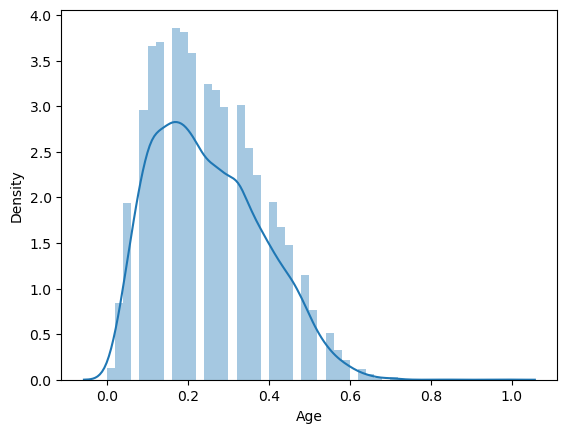

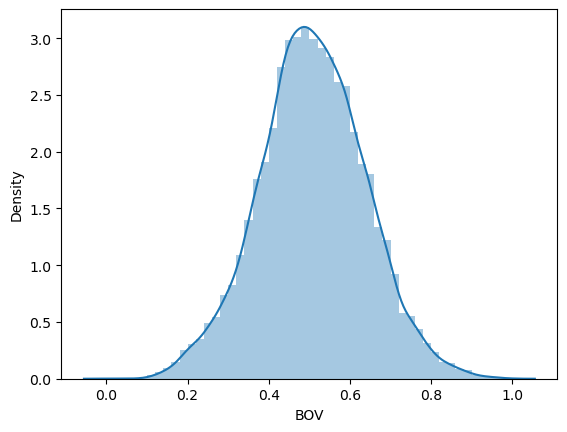

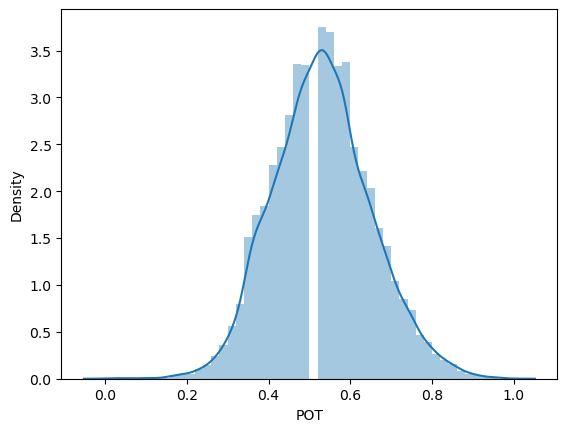

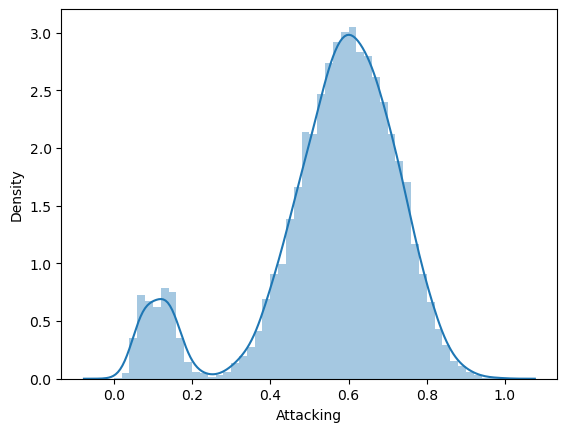

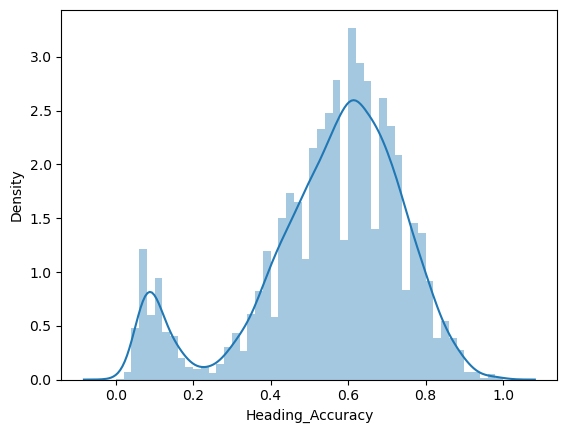

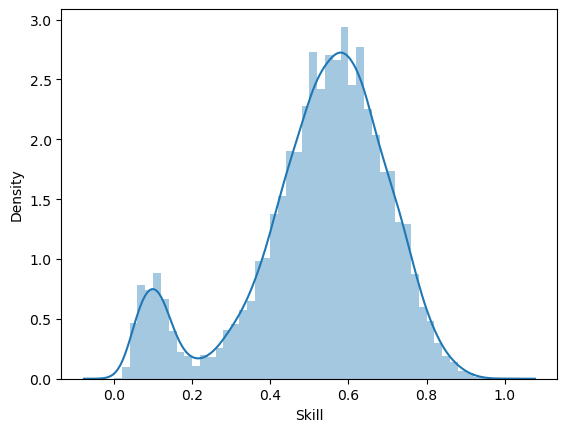

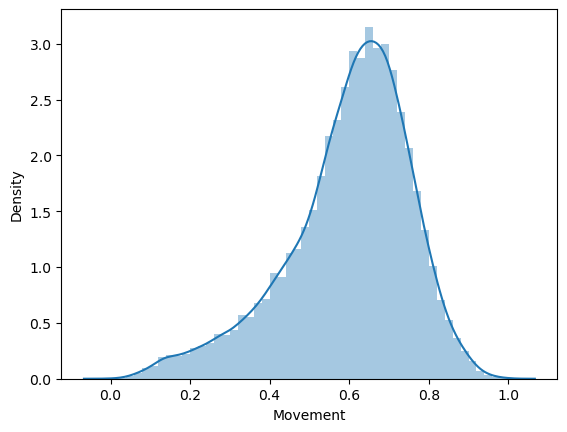

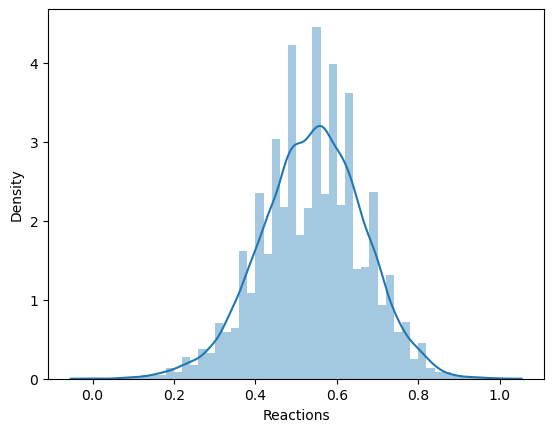

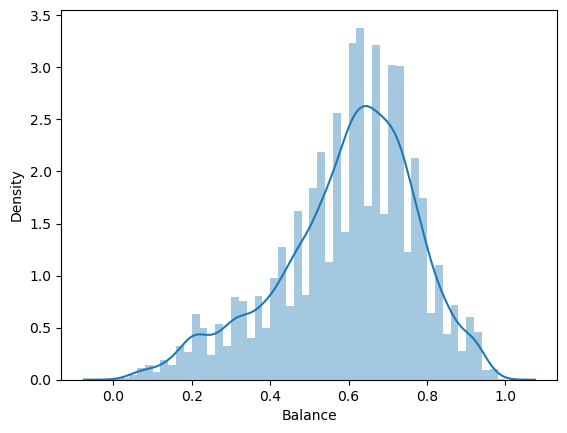

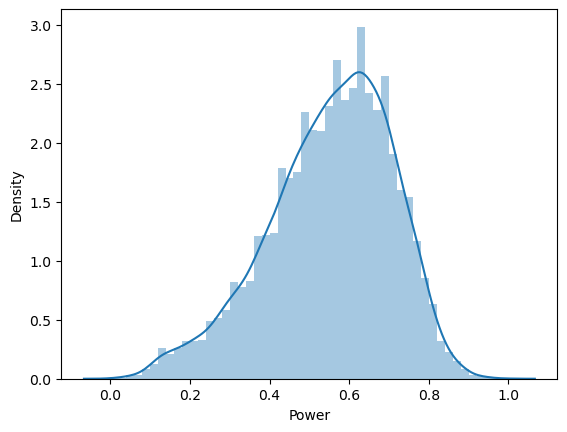

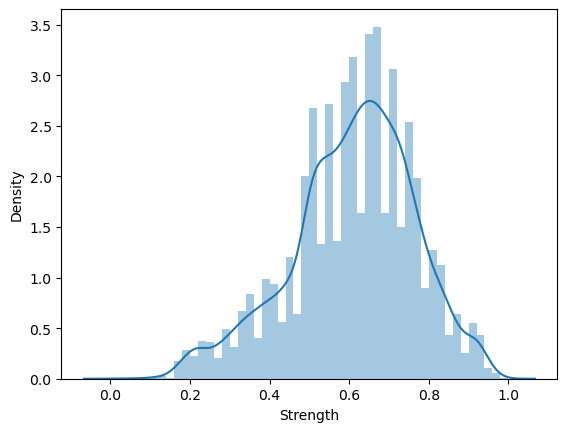

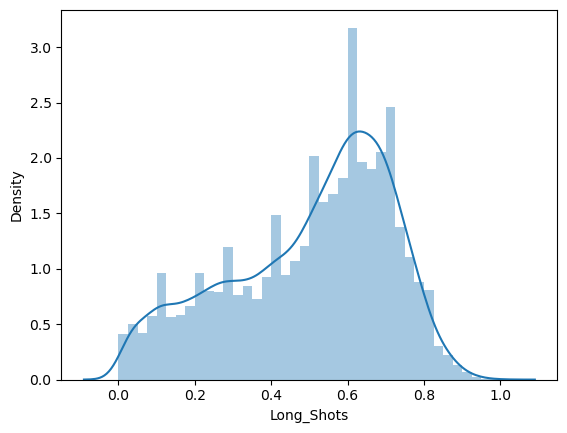

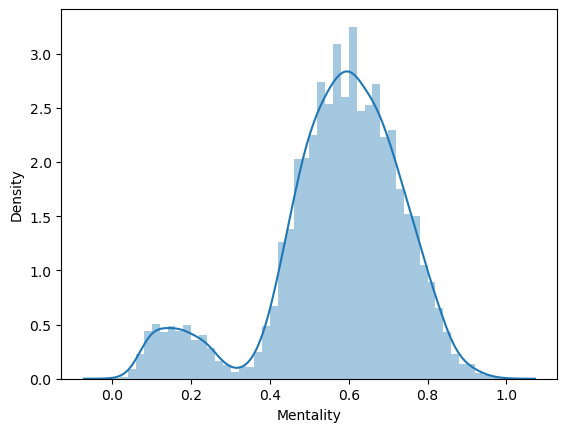

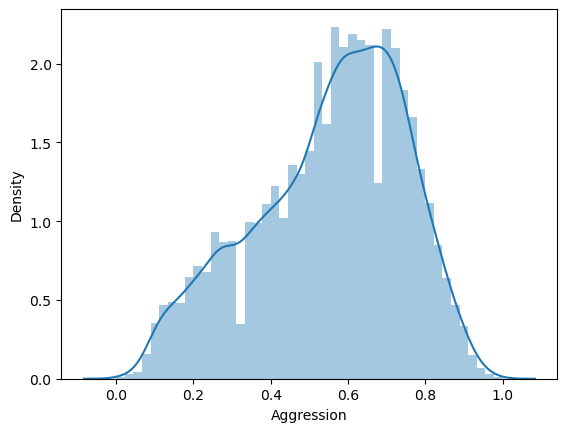

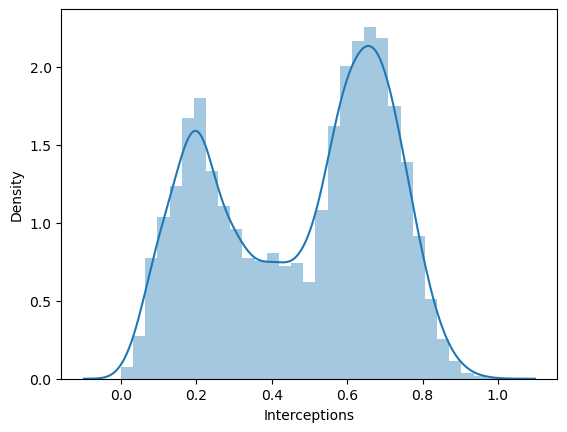

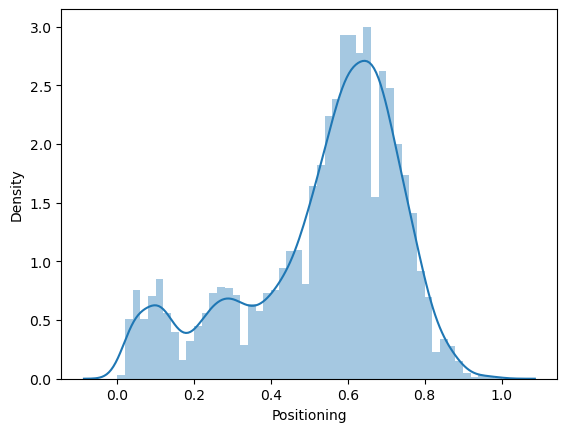

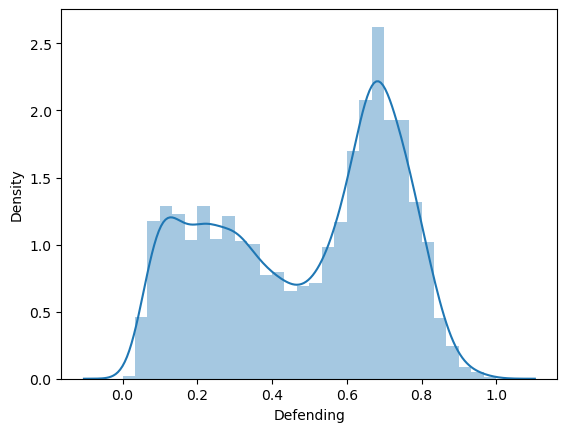

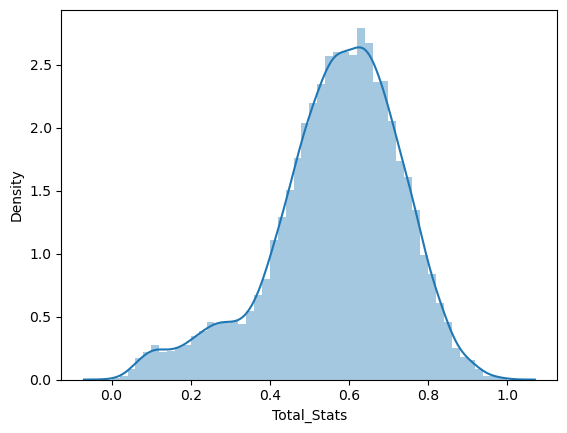

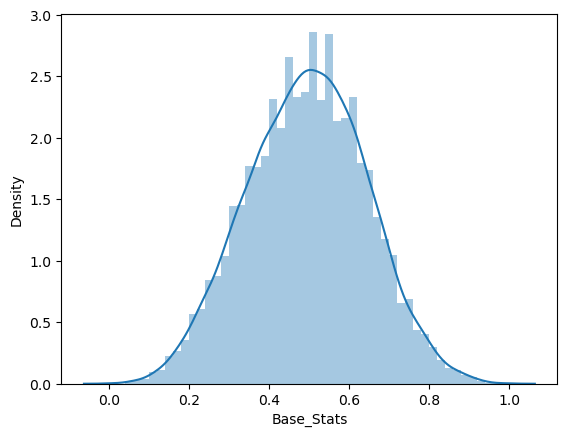

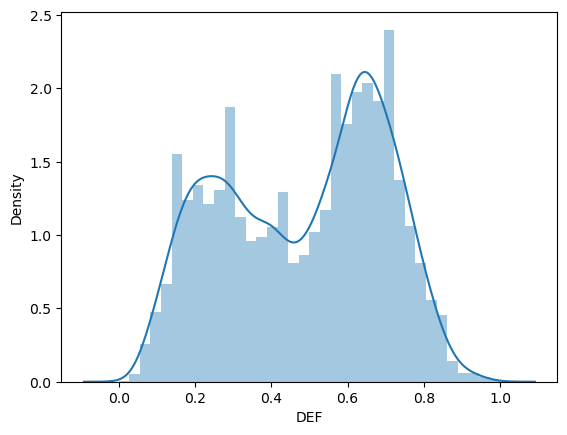

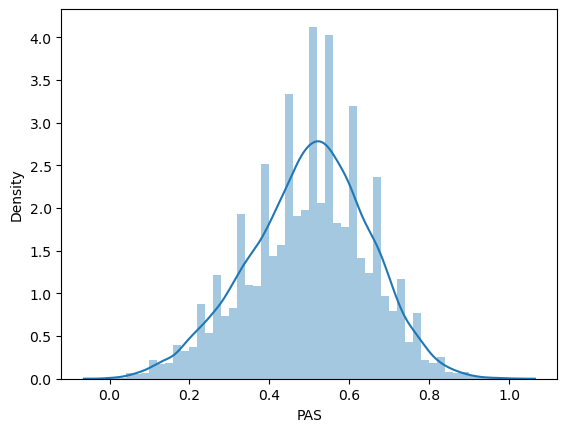

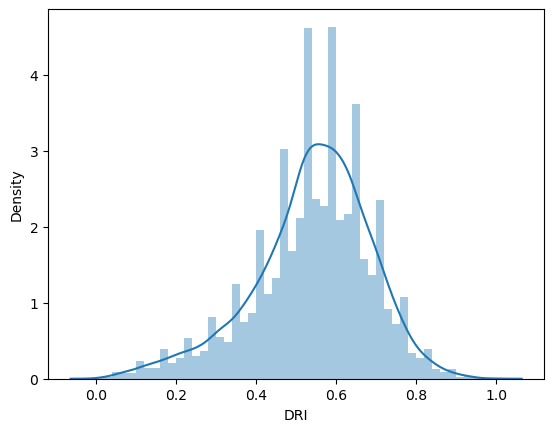

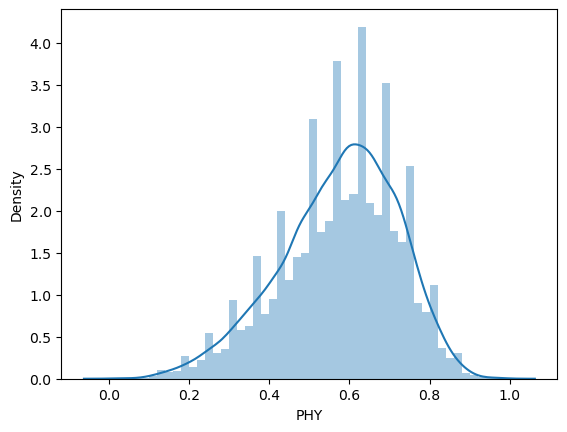

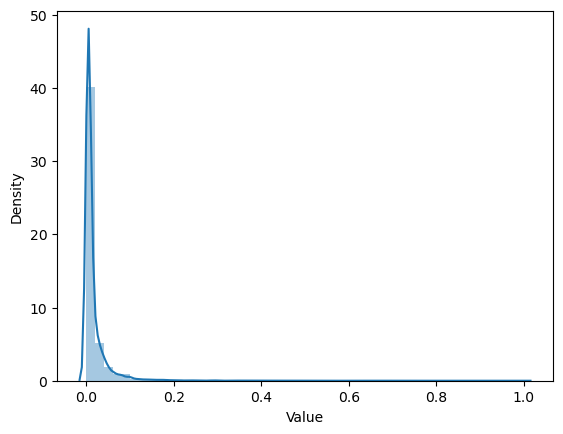

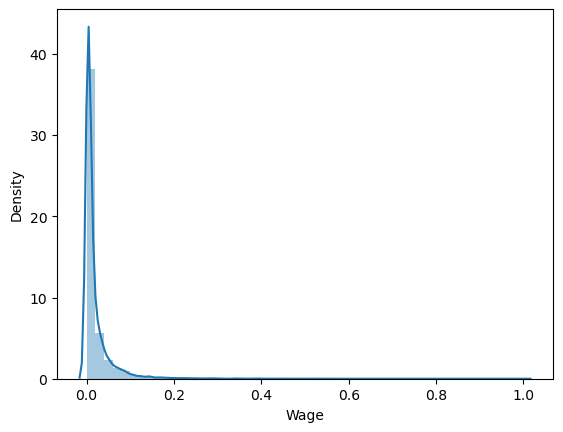

In [93]:
for column in X_num_norm.columns:
    sns.distplot(X_num_norm[column])
    plt.show()

### Stardardized data

In [54]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

In [55]:
X_num_stand = pd.DataFrame(x_standardized, columns=X_num.columns)
X_num_stand.head()

Age       BOV       POT  Attacking  Heading_Accuracy     Skill  \
0  1.563385  0.467024 -0.604843   0.753765          0.318716  0.929503   
1  2.372689  0.316361 -0.258209   1.085929          0.436733  1.333111   
2  1.563385  0.467024 -0.258209   1.085929         -0.743440  1.567465   
3  2.170363  0.316361  1.648276   0.075598          0.377724 -0.151127   
4  2.170363  2.124313  1.474959   1.501133          0.023672  1.840877   

   Movement  Reactions  Balance     Power  Strength  Long_Shots  Mentality  \
0  0.442481   0.672252  0.23408  0.902916  0.213153    0.990548   0.923148   
1 -0.322101   0.229628  0.51916  0.437133 -0.420418    1.148075   1.590746   
2 -0.504145  -0.434308  0.73297 -0.372926 -0.737204    1.043057   0.875463   
3 -2.670460  -0.876932      NaN -1.284242  0.054760    0.517965   0.144284   
4  0.424276   1.336188  0.73297 -0.109657 -0.262025    1.095566   1.717908   

   Aggression  Interceptions  Positioning  Defending  Total_Stats  Base_Stats  \
0    0.881385       1.051248     0.556578   1.080150     1.143632    1.158424   
1    0.822634       1.147189     1.027934   0.187197     1.055289    0.587011   
2    0.705133      -0.387870     0.870815  -0.689520     0.532914   -0.183154   
3    0.117628       1.099219     1.027934  -1.079173    -1.087985    0.189507   
4    0.058877       1.099219     1.342171   0.641791     1.470116    1.456552   

        DEF       PAS       DRI       PHY     Value      Wage  
0  1.052250  1.087080  0.690584  0.423322 -0.294640 -0.167083  
1  0.458895  1.381589  0.487176 -0.197797 -0.301227 -0.167083  
2 -0.846487  1.676098  1.300809 -1.336516 -0.169487  0.211261  
3 -0.193796  0.694400  0.487176 -0.508357 -0.459315 -0.498134  
4  0.755573  2.559627  2.114441 -0.611877  0.989822  0.069382

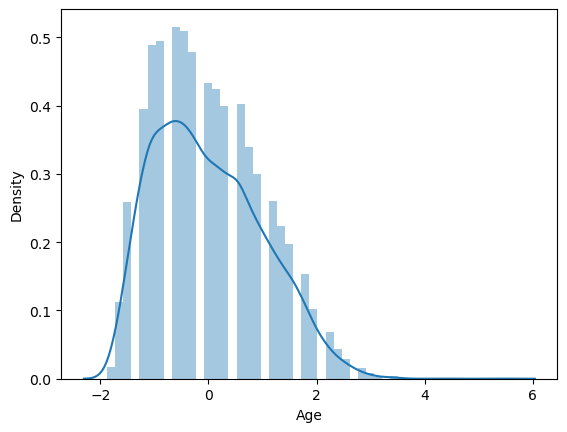

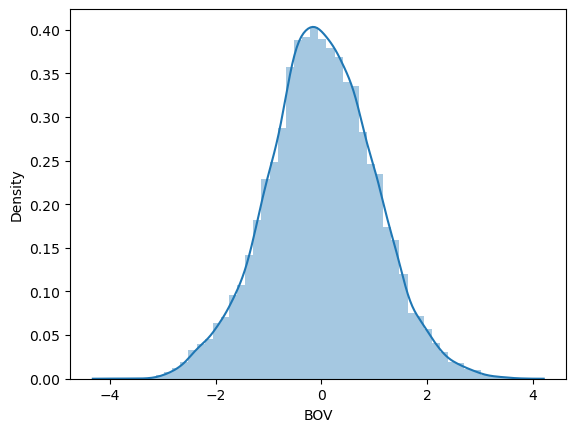

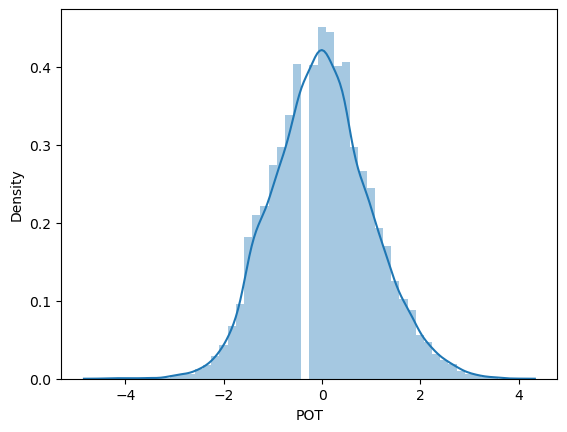

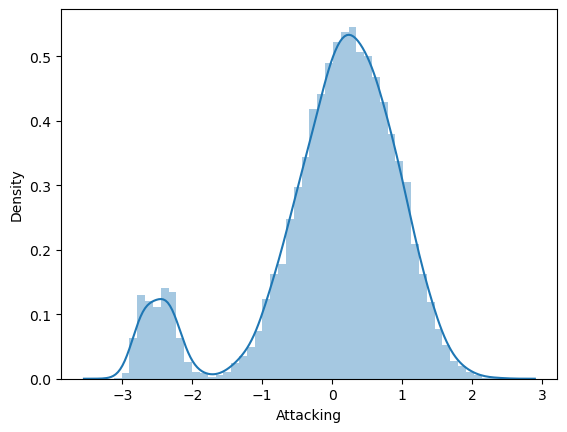

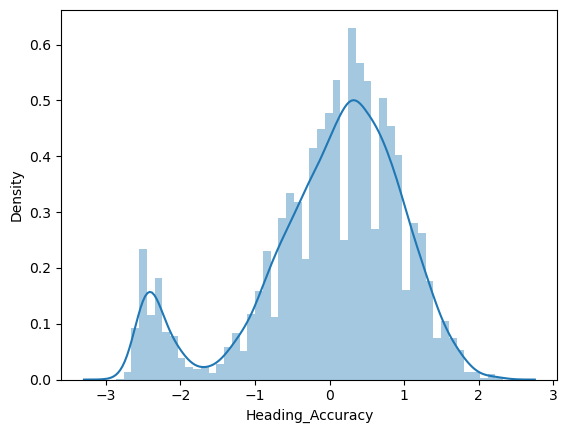

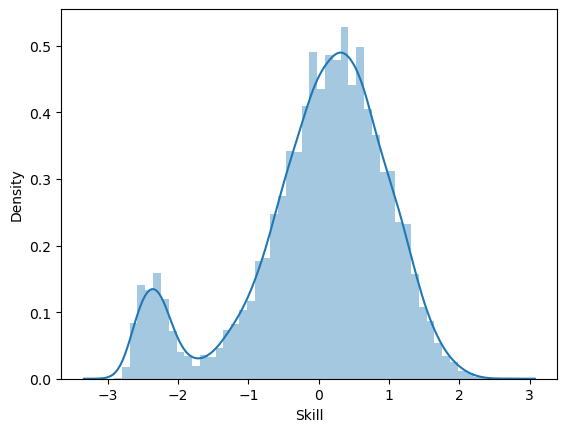

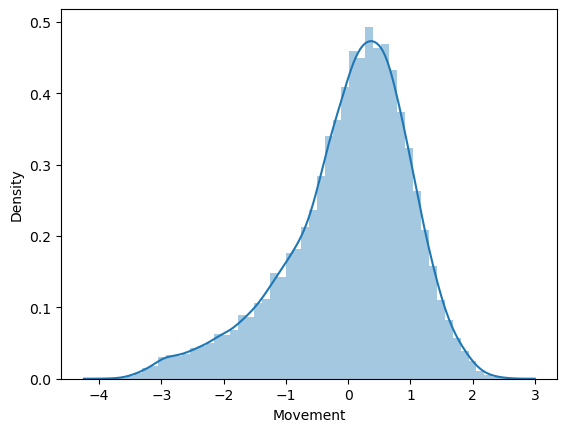

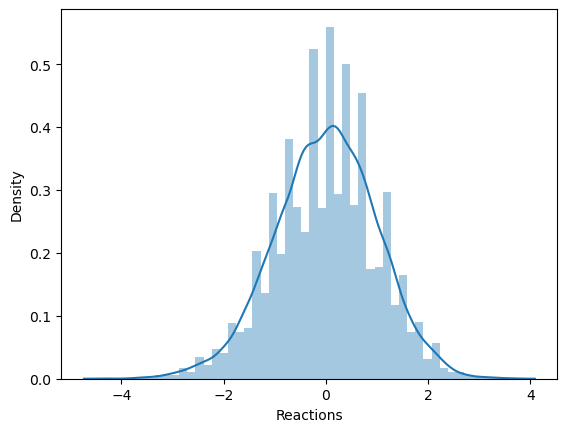

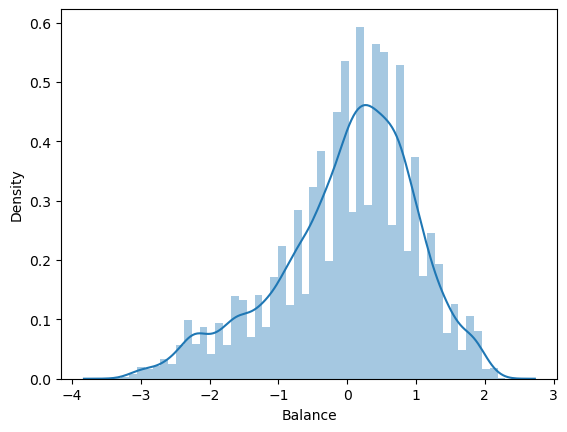

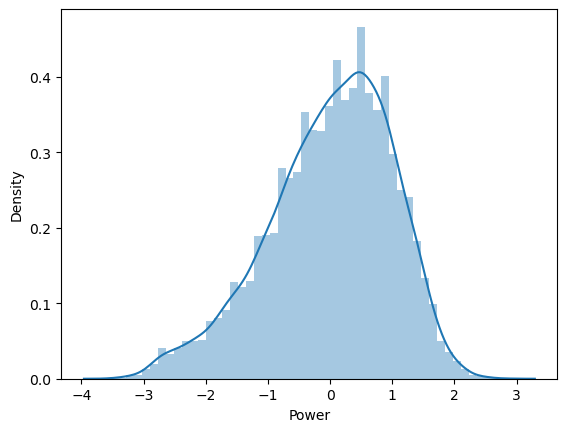

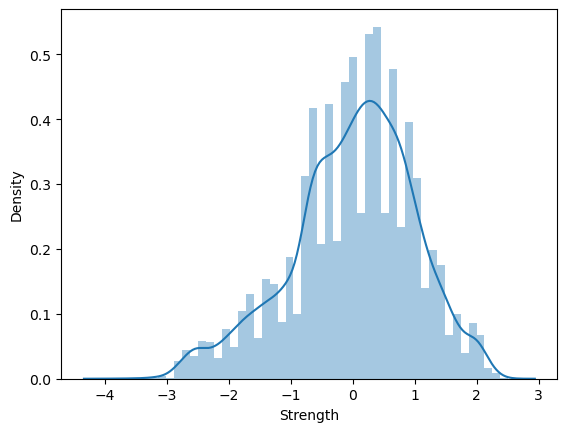

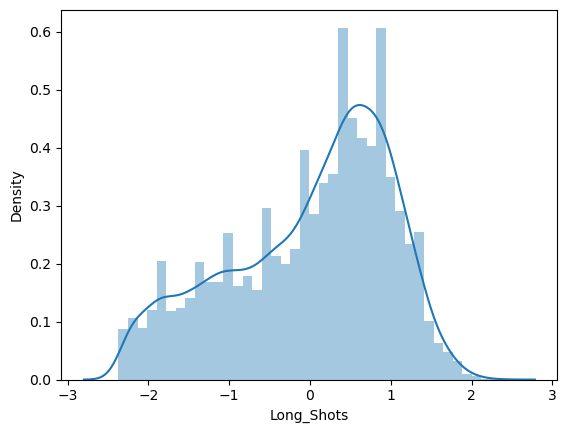

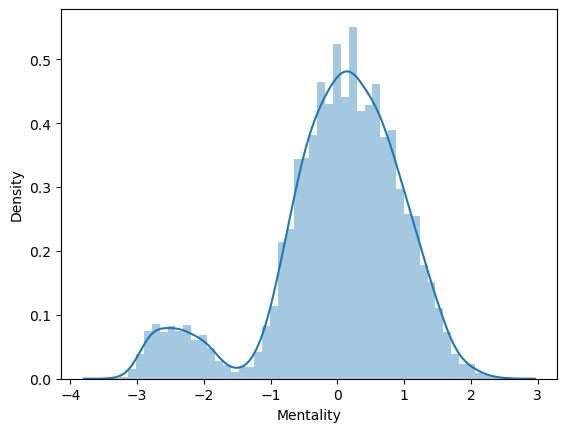

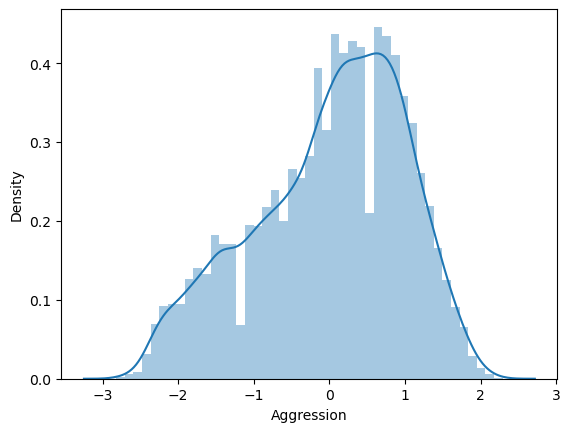

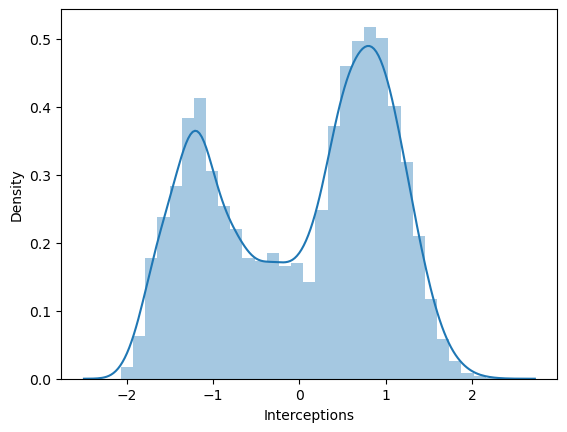

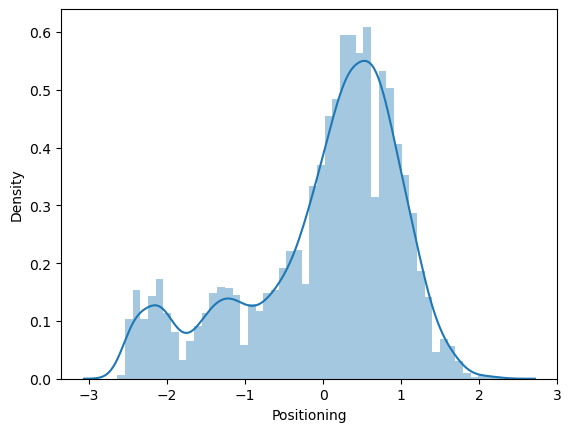

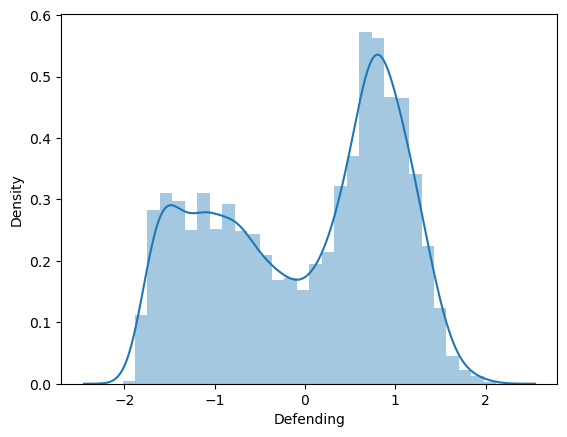

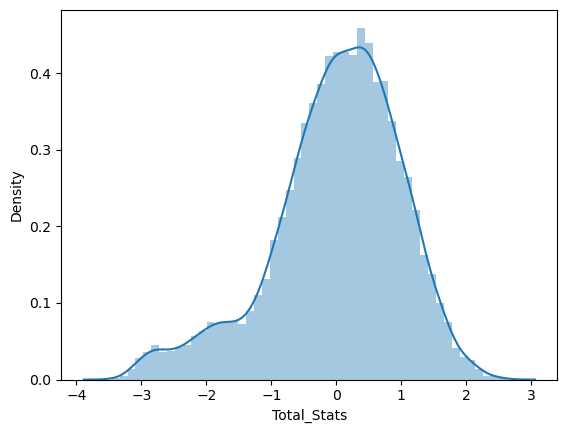

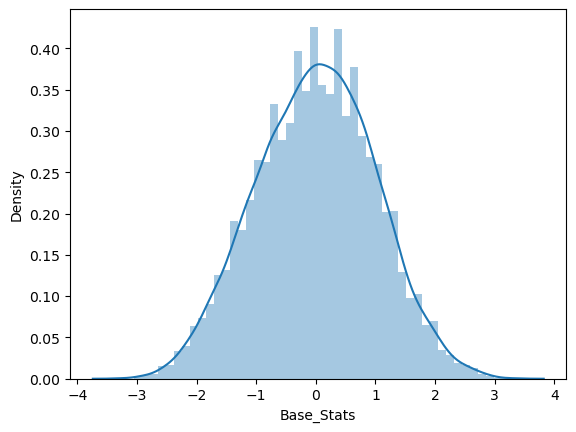

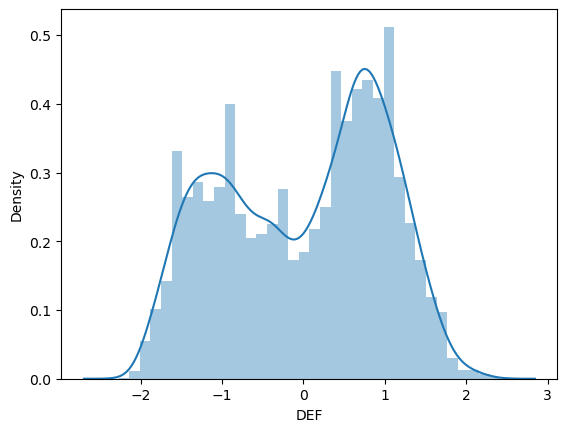

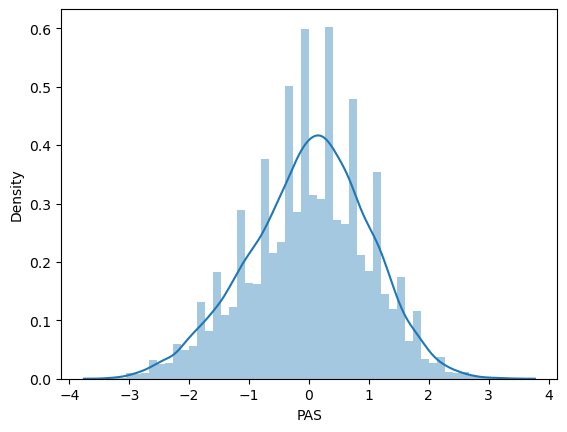

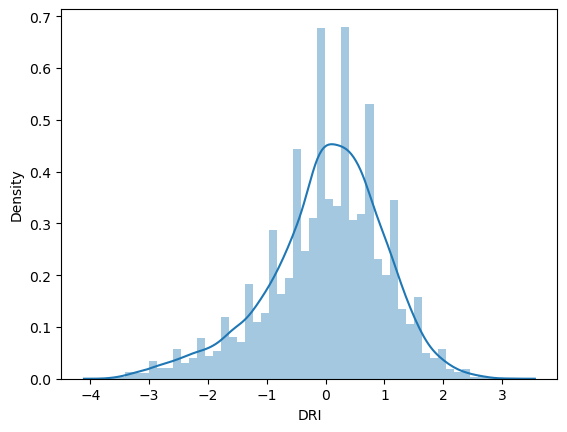

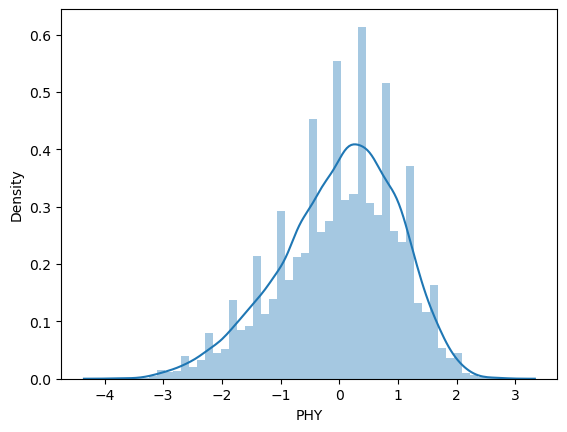

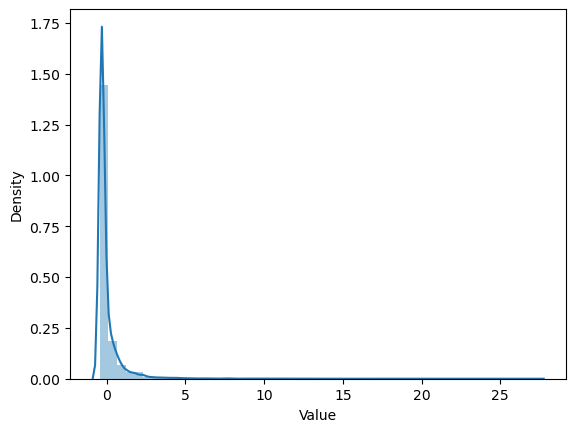

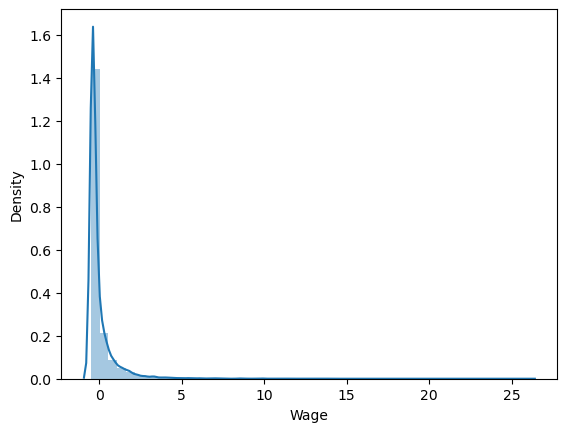

In [94]:
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

### Checking Categorical dataset and transforming it to numbers

In [57]:
fifa1_cat.head()

Name            Nationality           Club   BP
0  G. Pasquale                  Italy        Udinese  LWB
1  Luis García                  Spain      KAS Eupen   CM
2      J. Cole                England  Coventry City  CAM
3     D. Yorke  Trinidad &amp; Tobago     Sunderland   ST
4      Iniesta                  Spain    Vissel Kobe  CAM

In [58]:
fifa1_cat1= fifa1_cat.drop(['Name','Nationality', 'Club'], axis=1)
fifa1_cat1.head()

BP
0  LWB
1   CM
2  CAM
3   ST
4  CAM

In [59]:
fifa1_cat1_dumm = pd.get_dummies(fifa1_cat1, drop_first=True) 
fifa1_cat1_dumm

BP_CB  BP_CDM  BP_CF  BP_CM  BP_GK  BP_LB  BP_LM  BP_LW  BP_LWB  BP_RB  \
0          0       0      0      0      0      0      0      0       1      0   
1          0       0      0      1      0      0      0      0       0      0   
2          0       0      0      0      0      0      0      0       0      0   
3          0       0      0      0      0      0      0      0       0      0   
4          0       0      0      0      0      0      0      0       0      0   
...      ...     ...    ...    ...    ...    ...    ...    ...     ...    ...   
17120      1       0      0      0      0      0      0      0       0      0   
17121      0       0      0      0      0      0      0      0       0      0   
17122      0       0      0      0      0      0      0      0       0      1   
17123      0       0      0      0      0      0      0      0       0      1   
17124      0       0      0      0      0      0      0      0       0      0   

       BP_RM  BP_RW  BP_RWB  BP_ST  
0          0      0       0      0  
1          0      0       0      0  
2          0      0       0      0  
3          0      0       0      1  
4          0      0       0      0  
...      ...    ...     ...    ...  
17120      0      0       0      0  
17121      0      0       0      0  
17122      0      0       0      0  
17123      0      0       0      0  
17124      0      0       0      1  

[17125 rows x 14 columns]

### Should  I concat X_num_stand with the encoded df or X_num_norm with encoded df?

In [60]:
fifa_num_cat = pd.concat([X_num_norm, fifa1_cat1_dumm], axis=1)
fifa_num_cat.head()

Age       BOV       POT  Attacking  Heading_Accuracy     Skill  \
0  0.459459  0.568627  0.458333   0.693069          0.613636  0.690867   
1  0.567568  0.549020  0.500000   0.752475          0.636364  0.763466   
2  0.459459  0.568627  0.500000   0.752475          0.409091  0.805621   
3  0.540541  0.549020  0.729167   0.571782          0.625000  0.496487   
4  0.540541  0.784314  0.708333   0.826733          0.556818  0.854801   

   Movement  Reactions  Balance     Power  Strength  Long_Shots  Mentality  \
0  0.666667   0.625000   0.6375  0.693038  0.641975    0.711111   0.727763   
1  0.547009   0.569444   0.6875  0.620253  0.543210    0.744444   0.840970   
2  0.518519   0.486111   0.7250  0.493671  0.493827    0.722222   0.719677   
3  0.179487   0.430556      NaN  0.351266  0.617284    0.611111   0.595687   
4  0.663818   0.708333   0.7250  0.534810  0.567901    0.733333   0.862534   

   Aggression  Interceptions  Positioning  Defending  Total_Stats  Base_Stats  \
0    0.724138       0.714286     0.648936   0.749020     0.755836    0.666667   
1    0.712644       0.736264     0.744681   0.533333     0.741325    0.581481   
2    0.689655       0.384615     0.712766   0.321569     0.655521    0.466667   
3    0.574713       0.725275     0.744681   0.227451     0.389274    0.522222   
4    0.563218       0.725275     0.808511   0.643137     0.809464    0.711111   

        DEF       PAS       DRI       PHY     Value      Wage  BP_CB  BP_CDM  \
0  0.708861  0.661765  0.641791  0.636364  0.005924  0.012500      0       0   
1  0.582278  0.705882  0.611940  0.545455  0.005687  0.012500      0       0   
2  0.303797  0.750000  0.731343  0.378788  0.010427  0.026786      0       0   
3  0.443038  0.602941  0.611940  0.500000  0.000000  0.000000      0       0   
4  0.645570  0.882353  0.850746  0.484848  0.052133  0.021429      0       0   

   BP_CF  BP_CM  BP_GK  BP_LB  BP_LM  BP_LW  BP_LWB  BP_RB  BP_RM  BP_RW  \
0      0      0      0      0      0      0       1      0      0      0   
1      0      1      0      0      0      0       0      0      0      0   
2      0      0      0      0      0      0       0      0      0      0   
3      0      0      0      0      0      0       0      0      0      0   
4      0      0      0      0      0      0       0      0      0      0   

   BP_RWB  BP_ST  
0       0      0  
1       0      0  
2       0      0  
3       0      1  
4       0      0

In [61]:
fifa_num_cat.shape

(17125, 39)

In [62]:
X_num_norm.shape

(17125, 25)

In [63]:
fifa1_cat1_dumm.shape

(17125, 14)

In [64]:
y.shape

(17125,)

### Train-test split

In [65]:
fifa_num_cat_train, fifa_num_cat_test, y_train, y_test = train_test_split(fifa_num_cat, y, test_size=0.3, random_state=42)

### Checking NaNs

In [66]:
fifa_num_cat['Balance'].isna().value_counts()

False    17067
True        58
Name: Balance, dtype: int64

In [67]:
fifa_num_cat['Interceptions'].isna().value_counts()

False    17118
True         7
Name: Interceptions, dtype: int64

In [68]:
fifa_num_cat['Positioning'].isna().value_counts()

False    17118
True         7
Name: Positioning, dtype: int64

In [69]:
#fifa_num_cat = fifa_num_cat.dropna(subset=['Interceptions', 'Positioning'], how='all')
mean_Interceptions= fifa_num_cat['Interceptions'].mean()
fifa_num_cat['Interceptions'].fillna(value=mean_Interceptions, inplace=True)


In [70]:
mean_Balance = fifa_num_cat['Balance'].mean()
fifa_num_cat['Balance'].fillna(value=mean_Balance, inplace=True)

In [71]:
mean_Positioning = fifa_num_cat['Positioning'].mean()
fifa_num_cat['Positioning'].fillna(value=mean_Positioning, inplace=True)

In [73]:
#fifa_num_cat['Positioning'].isna().value_counts()

In [78]:
fifa_num_cat.describe()

Age           BOV           POT     Attacking  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       0.250620      0.507847      0.531038      0.558262   
std        0.133586      0.130148      0.120207      0.178851   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.135135      0.431373      0.458333      0.492574   
50%        0.243243      0.509804      0.520833      0.589109   
75%        0.351351      0.588235      0.604167      0.675743   
max        1.000000      1.000000      1.000000      1.000000   

       Heading_Accuracy         Skill      Movement     Reactions  \
count      17125.000000  17125.000000  17125.000000  17125.000000   
mean           0.552259      0.523671      0.597418      0.540623   
std            0.192581      0.179881      0.156506      0.125518   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.465909      0.442623      0.515670      0.458333   
50%            0.590909      0.552693      0.621083      0.541667   
75%            0.681818      0.646370      0.703704      0.625000   
max            1.000000      1.000000      1.000000      1.000000   

            Balance         Power      Strength    Long_Shots     Mentality  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean       0.596445      0.551945      0.608748      0.501508      0.571220   
std        0.175097      0.156268      0.155892      0.211610      0.169579   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.500000      0.455696      0.518519      0.344444      0.498652   
50%        0.625000      0.569620      0.629630      0.544444      0.590296   
75%        0.725000      0.667722      0.716049      0.666667      0.684636   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Aggression  Interceptions   Positioning     Defending   Total_Stats  \
count  17125.000000   17125.000000  17125.000000  17125.000000  17125.000000   
mean       0.551699       0.473468      0.535880      0.488117      0.567985   
std        0.195651       0.229038      0.203091      0.241550      0.164263   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.413793       0.241758      0.436170      0.262745      0.480126   
50%        0.586207       0.538462      0.585106      0.552941      0.585489   
75%        0.701149       0.670330      0.680851      0.694118      0.682019   
max        1.000000       1.000000      1.000000      1.000000      1.000000   

         Base_Stats           DEF           PAS           DRI           PHY  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean       0.493971      0.484381      0.498920      0.540446      0.574405   
std        0.149083      0.213339      0.149805      0.146757      0.146368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.388889      0.291139      0.397059      0.462687      0.484848   
50%        0.496296      0.518987      0.514706      0.552239      0.590909   
75%        0.600000      0.658228      0.602941      0.641791      0.681818   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              Value          Wage         BP_CB        BP_CDM         BP_CF  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean       0.016524      0.018809      0.189898      0.072759      0.005197   
std        0.035976      0.037760      0.392232      0.259748      0.071905   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.003081      0.001786      0.000000      0.000000      0.000000   
50%        0.006398      0.005357      0.000000      0.000000      0.000000   
75%        0.014218      0.019643      0.000000      0.000000      0.000000   
max        1.000000      1.0000

In [79]:
model = LinearRegression()
model.fit(fifa_num_cat_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Check NaN and infinity

In [82]:
fifa_num_cat.isnull().values.any()

False

In [83]:
np.any(np.isnan(fifa_num_cat))

False

In [84]:
np.all(np.isfinite(fifa_num_cat))

True

In [85]:
count = np.isinf(fifa_num_cat).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [86]:
print(fifa_num_cat.isnull().values.any())    

False
